##Introduction

Diabetes, scientifically called Diabetes mellitus is a long-lasting health condition that causes a rise in blood sugar levels. Higher blood sugar levels lead to severe health conditions over time which can damage the heart, kidney, eyesight, and skin. Diabetes is generally categorized into type 1, type 2, and gestational diabetes.

According to a recent study more than 463 million people around the world are living with diabetes. These numbers are expected to increase to 578 million by 2030 and 700 million by 2045. It is the 7th leading cause of death. Hence it is important to develop improved diabetes management strategies which aim to prevent the risk of developing Diabetes.

There are various factors associated with diabetes. If one of our family members is diabetic there is a chance of getting diagnosed with diabetes. Obesity, Insulin resistance, and Gestational diabetes are key factors that lead to diabetes. A sedentary lifestyle and age also play a key role in the onset of diabetes.

This project aims to find 
1.	The key insights into what factors are associated with the onset of diabetes.
2.	Visualize the insights for the diabetic and nondiabetic populations with the help of univariate, bivariate, and multivariate analysis.
3.	Perform feature extraction to find the principal component.

## Understanding the dataset
PIMA Indian Diabetes dataset was originally released by the National Institute of Diabetes and Digestive and Kidney Diseases. In this project, we analyze the dataset to predict the onset of diabetes based on different diagnostic measures.

### Attributes Description:

1.	**Pregnancies**:  Diabetes in pregnant women is called Gestational diabetes. This condition generally goes off after the delivery. But if it doesn’t go, can develop type 2 diabetes over time. Pregnancies attribute gives the number of pregnancies a woman had.

2.	**Glucose**: The glucose tolerance test measures our body’s response to glucose. The glucose attribute shows the plasma glucose concentration for 2 hours in an oral glucose tolerance test.

3.	**Blood Pressure**: Normal blood pressure is as good as normal sugar levels. The blood Pressure attribute gives the measure of diastolic blood pressure in mm Hg.

4.	**Skin Thickness**: Diabetes can make our skin dry and thin. Skin Thickness attribute is the measure of triceps skin fold thickness in mm.

5.	**Insulin**: A blood test tells the amount of insulin present in our blood. The insulin attribute gives the measure of 2-hour serum insulin in mu U/ml.

6.	**BMI**: Being obese increases the risk of developing type 2 diabetes. BMI attribute gives weight in kg/ (height in m) ^2.

7.	**Diabetes Pedigree Function**: It is a function that gives the score of the likelihood of developing diabetes based on family history.

8.	**Age**: One can be affected by Type1 diabetes at a young age. Type 2 diabetes usually develops after 45 years of age. Age attribute gives age in years.

9.	**Outcome**: The outcome attribute tells if a person is diabetic or not. In this dataset, 0 is referred to as non-diabetic and 1 as diabetic.

###Datatypes of the attributes:

1. **Pregnancies**- Number of times pregnant is **discrete** datatype as it has count and has no intermediate values

2. **Glucose**- Glucose concentration is usually **continuous** datatype as it has count and intermediate values

3. **Blood Pressure**-Diastolic blood pressure is **continuous** datatype as it has count and has intermediate values.

4. **Skin thickness**- Skin thickness is usually **continuous** datatype as it is a measurable quantity and has intermediate values.

5. **Insulin**- Insulin is generally  **continuous** datatype because it is measurable and has intermediate values.

6. **BMI**- Bmi is **continuous** datatype as it has intermediate values and count.

7. **Diabetes pedigree function**- Diabetes pedigree function is **continuous** datatype as it has count and intermediate values.

8. **Age**- Age is **continuous** datatype. It has count and intermediate values.

9. **Outcome**-Outcome is **nominal** datatype as it has no order and magnitude.

In [1]:
import numpy as np # Imports numpy, numerical python
import pandas as pd # Imports pandas, data wrangling and manipulation package
import matplotlib.pyplot as plt # Imports matplotlib, data visualization and graphical plotting library
import seaborn as sns # Imports seaborn, for data visualization and exploratory data analysis

In [2]:
var = pd.read_excel('Variables_diabetes_EDA.xlsx') #Reads Variables_diabetes_EDA excel file and is saved in var
df = pd.read_excel('diabetes_mandatory_EDA.xlsx',names=var["Variables used"]) #Reads the excel file along with 'Variables used' col from var

### Basic Exploration of data

In [3]:
df.head() #Displays first 5 rows of dataset

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


Helped to check the first 5 records of dataset, different columns and values.

In [4]:
df.tail() #Displays last 5 rows of dataset

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
762,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
763,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
765,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
766,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


Helped to check the last 5 records of dataset, different columns and the values.

In [5]:
df.shape # returns number of rows and columns

(767, 9)

This dataset has 767 rows and 9 columns

In [6]:
df.isna().sum() #Sum of missing values

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

Above output shows that there are no missing values.

In [7]:
df.describe(include='all') # gives a summary of all the columns

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above output we can find the summary of  all columns.

In [8]:
cols=list(df.columns) #Gives number of columns as a list which is stored as cols
cols #Displays the columns

['Pregnancies',
 'Glucose',
 'Blood Pressure',
 'Skin Thickness',
 'Insulin',
 'BMI',
 'Diabetes Pedigree Function',
 'Age',
 'Outcome']

From above output we can find that few columns are not according to the naming convention

In [9]:
#df.rename renames the columns which have been provided here in the form of dictionary
df=df.rename(columns={'Blood Pressure':'Blood_Pressure','Skin Thickness':'Skin_Thickness','Diabetes Pedigree Function':'Diabetes_Pedigree_Function'})

In [10]:
df.head(2) #Displays first 2 rows of dataset

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


From above output it is clear that few columns have been renamed.

In [11]:
df.dtypes # Returns a Series with the data type of each column

Pregnancies                   float64
Glucose                       float64
Blood_Pressure                float64
Skin_Thickness                float64
Insulin                       float64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                           float64
Outcome                       float64
dtype: object

From above output we can see that all 9 columns are of float datatype.

In [12]:
df.Outcome=df.Outcome.astype('category') #Type casts the datatype of Outcome to category

In [13]:
df.dtypes # Returns a Series with the data type of each column

Pregnancies                    float64
Glucose                        float64
Blood_Pressure                 float64
Skin_Thickness                 float64
Insulin                        float64
BMI                            float64
Diabetes_Pedigree_Function     float64
Age                            float64
Outcome                       category
dtype: object

In [14]:
Outcome_type={0.0:'non-diabetic',1.0:'diabetic'} #Dictionary for outcome type

In [15]:
df['Outcome']=df['Outcome'].map(Outcome_type) #Maps Outcome type

In [16]:
df.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,non-diabetic
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,diabetic
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,non-diabetic
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,diabetic
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,non-diabetic


From above output it is clear that Outcome datatype is changed to category.

In [17]:
df.nunique() #returns the number of unique values for each column

Pregnancies                    17
Glucose                       136
Blood_Pressure                 47
Skin_Thickness                 51
Insulin                       186
BMI                           248
Diabetes_Pedigree_Function    516
Age                            52
Outcome                         2
dtype: int64

From above output we can see the unique values in each column.

In [18]:
df.drop_duplicates() # removes duplicates from df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,non-diabetic
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,diabetic
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,non-diabetic
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,diabetic
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,non-diabetic
...,...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,non-diabetic
763,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,non-diabetic
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,non-diabetic
765,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,diabetic


In [19]:
df.info() #Gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Pregnancies                 767 non-null    float64 
 1   Glucose                     767 non-null    float64 
 2   Blood_Pressure              767 non-null    float64 
 3   Skin_Thickness              767 non-null    float64 
 4   Insulin                     767 non-null    float64 
 5   BMI                         767 non-null    float64 
 6   Diabetes_Pedigree_Function  767 non-null    float64 
 7   Age                         767 non-null    float64 
 8   Outcome                     767 non-null    category
dtypes: category(1), float64(8)
memory usage: 48.9 KB


From above output datatypes of all columns, number of rows and columns are found.

In [20]:
df.describe(include='all') # gives a summary of all the columns

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-diabetic
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,NaN
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,NaN
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,NaN


From above output we can see that minimum value for Glucose, Blood_Pressure, Skin_Thickness, Insulin and BMI are 0. This means the data is missing.

### Diabetic and Non-Diabetic Dataframe

In [21]:
df_diabetic=df[df['Outcome'] =='diabetic'] #Dataframe with diabetic population

In [22]:
df_non_diabetic=df[df['Outcome'] =='non-diabetic'] #Dataframe with non-diabetic population

### Handling Missing Values for df_diabetic

In [23]:
df_diabetic.head(3)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,diabetic
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,diabetic
5,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,diabetic


In [24]:
Glucose_unique=df_diabetic.Glucose.unique() #Returns all unique values in Glucose column and value is assigned to Glucose_unique
Glucose_unique

array([183., 137.,  78., 197., 125., 168., 189., 166., 100., 118., 107.,
       115., 196., 119., 143., 147., 158., 102.,  90., 111., 171., 180.,
       103., 176., 187., 133., 114., 109., 126., 131., 136., 134., 122.,
       163.,  95., 155., 160., 146., 124., 162., 113.,  88., 117., 105.,
       173., 170., 108., 156., 188., 152., 104., 179., 129., 130., 194.,
       181., 128., 139., 159., 135., 148., 184., 140., 112., 151.,  85.,
       177., 142., 164.,  92., 141., 123., 138., 101., 106., 161., 167.,
       144., 182., 178.,   0., 165., 116., 193., 172., 175., 120., 145.,
       195.,  84., 132., 186., 198., 121., 150., 174.,  97.,  80., 199.,
       169.,  93., 149., 154., 190.])

From above output we can find the unique values.

In [25]:
(df_diabetic['Glucose'] == 0.0).sum() #Find number of zeros in Glucose column

2

From above output we can see there are 2 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [26]:
#replaces 0 with nan value in Glucose column
df_diabetic['Glucose'] = df_diabetic['Glucose'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
(df_diabetic['Glucose'] == 0.0).sum() #Find number of zeros in Glucose column

0

In [28]:
Blood_Pressure_unique=df_diabetic.Blood_Pressure.unique() #Returns all unique values in Blood_Pressure column and value is assigned to Blood_Pressure_unique
Blood_Pressure_unique

array([ 64.,  40.,  50.,  70.,  96.,  74.,  60.,  72.,   0.,  84.,  90.,
        80.,  94.,  76.,  68., 110.,  66.,  88., 108.,  85.,  62.,  54.,
        92.,  30.,  56.,  86.,  78.,  82.,  98., 104.,  65.,  52.,  48.,
        58., 102.,  75., 100., 106., 114.])

From above output we can find the unique values.

In [29]:
(df_diabetic['Blood_Pressure'] == 0.0).sum() #Find number of zeros in Blood_Pressure column

16

From above output we can see there are 16 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [30]:
#replaces 0 with nan value in Glucose column
df_diabetic['Blood_Pressure'] = df_diabetic['Blood_Pressure'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
(df_diabetic['Blood_Pressure'] == 0.0).sum() #Find number of zeros in Blood_Pressure column

0

In [32]:
Skin_Thickness_unique=df_diabetic.Skin_Thickness.unique() #Returns all unique values in Skin_Thickness column and value is assigned to Skin_Thickness_unique
Skin_Thickness_unique

array([ 0., 35., 32., 45., 23., 19., 47., 30., 33., 26., 36., 37., 42.,
       24., 39., 34., 20., 51., 25., 56., 14., 28., 44., 41., 18., 46.,
       13., 27., 29., 40., 22., 38., 21., 15.,  7., 17., 31., 48., 43.,
       49., 12., 63., 99.])

From above output we can find the unique values.

In [33]:
(df_diabetic['Skin_Thickness'] == 0.0).sum() #Find number of zeros in Skin_Thickness column

88

From above output we can see there are 88 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [34]:
#replaces 0 with nan value in Skin_Thickness column
df_diabetic['Skin_Thickness'] = df_diabetic['Skin_Thickness'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
(df_diabetic['Skin_Thickness'] == 0.0).sum() #Find number of zeros in Skin_Thickness column

0

In [36]:
Insulin_unique=df_diabetic.Insulin.unique() #Returns all unique values in Insulin column and value is assigned to Insulin_unique
Insulin_unique

array([  0., 168.,  88., 543., 846., 175., 230.,  96., 146., 115., 245.,
       207., 240., 300., 304.,  90., 110., 220.,  36., 135., 495., 100.,
        99., 145., 225., 155., 114., 156., 130.,  58., 160., 210.,  48.,
       318., 280., 271., 129., 478., 370., 192., 176., 258., 150.,  74.,
       182., 194., 360., 184., 132., 180., 205.,  29., 120., 171., 167.,
       249., 325., 140., 465., 285., 579., 474., 277.,  14.,  64., 237.,
       191., 328., 250., 122., 105., 165., 215., 190., 274., 600., 185.,
       126., 293., 321., 144.,  91., 159., 540.,  70., 231., 125., 480.,
       392., 127.,  79., 200., 510.])

From above output we can find the unique values.

In [37]:
(df_diabetic['Insulin'] == 0.0).sum() #Find number of zeros in Insulin column

137

From above output we can see there are 137 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [38]:
#replaces 0 with nan value in Insulin column
df_diabetic['Insulin'] = df_diabetic['Insulin'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
(df_diabetic['Insulin'] == 0.0).sum() #Find number of zeros in Insulin column

0

In [40]:
BMI_unique=df_diabetic.BMI.unique() #Returns all unique values in BMI column and value is assigned to BMI_unique
BMI_unique

array([23.3, 43.1, 31. , 30.5,  0. , 38. , 30.1, 25.8, 30. , 45.8, 29.6,
       34.6, 39.8, 29. , 36.6, 31.1, 39.4, 31.6, 32.9, 38.2, 37.1, 45.4,
       42. , 39.1, 33.7, 37.7, 32.8, 32.5, 43.4, 43.2, 48.8, 23.8, 49.7,
       39. , 37.4, 33.3, 34. , 31.2, 53.2, 55. , 34.5, 27.9, 29.7, 32.4,
       34.3, 47.9, 50. , 40.9, 29.9, 30.8, 35.4, 32.7, 67.1, 35.9, 32. ,
       30.4, 52.3, 22.9, 34.8, 30.9, 37.5, 35.5, 42.6, 34.2, 41.8, 35.8,
       37.8, 37.2, 44. , 46.2, 43.6, 44.1, 25.6, 27.1, 27.6, 33.6, 36.3,
       27.5, 45.6, 26.5, 37.9, 27. , 43.3, 40.5, 28. , 32.3, 52.9, 25.5,
       26.6, 23.5, 27.4, 26.8, 35.1, 45.5, 39.9, 41. , 36.5, 38.5, 38.4,
       39.2, 48.3, 45.7, 34.9, 35. , 28.9, 25.9, 42.4, 35.7, 26.4, 42.9,
       37. , 34.1, 59.4, 37.6, 44.2, 42.3, 25.1, 30.3, 36.4, 33.8, 41.3,
       34.7, 42.1, 28.7, 46.8, 34.4, 36.8, 35.2, 28.4, 40. , 36.1, 28.2,
       29.5, 23.4, 28.3, 38.7, 24.8, 36. , 49.6, 46.1, 41.2, 33.9, 35.6,
       29.3, 44.5, 39.5, 49.3, 24.3])

From above output we can find the unique values.

In [41]:
(df_diabetic['BMI'] == 0.0).sum() #Find number of zeros in BMI column

2

From above output we can see there are 2 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [42]:
#replaces 0 with nan value in BMI column
df_diabetic['BMI'] = df_diabetic['BMI'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
(df_diabetic['BMI'] == 0.0).sum() #Find number of zeros in BMI column

0

In [44]:
Diabetes_Pedigree_Function_unique=df_diabetic.Diabetes_Pedigree_Function.unique() #Returns all unique values in Diabetes_Pedigree_Function column and value is assigned to Diabetes_Pedigree_Function_unique
Diabetes_Pedigree_Function_unique

array([0.672, 2.288, 0.248, 0.158, 0.232, 0.537, 0.398, 0.587, 0.484,
       0.551, 0.254, 0.529, 0.451, 0.263, 0.205, 0.257, 0.851, 0.665,
       0.503, 1.39 , 0.721, 1.893, 0.344, 0.467, 0.27 , 0.258, 0.855,
       0.867, 0.583, 0.227, 0.153, 0.277, 0.325, 1.222, 0.247, 0.199,
       0.543, 0.588, 0.539, 0.22 , 0.759, 0.278, 0.496, 0.403, 0.741,
       0.361, 1.114, 0.356, 0.272, 1.189, 0.137, 0.337, 0.817, 0.743,
       0.722, 0.18 , 0.542, 0.719, 0.319, 0.956, 0.745, 0.615, 1.321,
       0.64 , 0.383, 0.578, 0.395, 0.678, 0.905, 0.15 , 0.605, 0.151,
       0.355, 0.431, 0.26 , 0.742, 0.514, 1.224, 0.261, 1.072, 0.805,
       0.652, 0.645, 0.238, 0.479, 0.586, 0.686, 0.831, 0.402, 1.318,
       1.213, 0.926, 1.353, 0.761, 0.226, 0.933, 0.24 , 1.136, 0.296,
       0.334, 0.165, 0.259, 0.808, 0.757, 0.613, 0.412, 0.839, 0.422,
       0.209, 0.326, 1.391, 0.875, 0.433, 1.127, 0.345, 0.129, 0.197,
       0.731, 0.692, 0.127, 0.282, 0.343, 0.893, 0.331, 0.346, 0.302,
       0.962, 0.569,

From above output we can find the unique values.

In [45]:
(df_diabetic['Diabetes_Pedigree_Function'] == 0.0).sum() #Find number of zeros in Diabetes_Pedigree_Function column

0

From above output there are no missing values in Diabetes_Pedigree_Function

In [46]:
Age_unique=df_diabetic.Age.unique() #Returns all unique values in Age column and value is assigned to Age_unique
Age_unique

array([32., 33., 26., 53., 54., 34., 59., 51., 31., 41., 29., 43., 28.,
       46., 27., 56., 25., 58., 39., 42., 38., 37., 60., 24., 61., 23.,
       40., 62., 30., 36., 47., 57., 52., 21., 66., 22., 49., 44., 35.,
       67., 45., 55., 50., 70., 48.])

From above output we can find the unique values.

In [47]:
(df_diabetic['Age'] == 0.0).sum() #Find number of zeros in Age column

0

From above output we can see that there are no 0 values in Age.

In [48]:
df_diabetic.info() #Gives information about df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1 to 765
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Pregnancies                 267 non-null    float64 
 1   Glucose                     265 non-null    float64 
 2   Blood_Pressure              251 non-null    float64 
 3   Skin_Thickness              179 non-null    float64 
 4   Insulin                     130 non-null    float64 
 5   BMI                         265 non-null    float64 
 6   Diabetes_Pedigree_Function  267 non-null    float64 
 7   Age                         267 non-null    float64 
 8   Outcome                     267 non-null    category
dtypes: category(1), float64(8)
memory usage: 19.2 KB


From above output we can see the missing values in Glucose, Blood_Pressure, Skin_Thickness, Insulin and BMI columns

In [49]:
df_diabetic_missing=df_diabetic.isnull() #detects missing values and is assigned to df_diabetic_missing

In [50]:
df_diabetic_missing #missing values

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
1,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...
754,False,False,False,False,False,False,False,False,False
756,False,False,False,True,True,False,False,False,False
758,False,False,False,True,True,False,False,False,False
760,False,False,False,False,True,False,False,False,False


From above output True vaues are missing values

In [51]:
#Total missing values
df_diabetic_missing.sum()

Pregnancies                     0
Glucose                         2
Blood_Pressure                 16
Skin_Thickness                 88
Insulin                       137
BMI                             2
Diabetes_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64

From above output we can see that the number of missing values in Glucose: 2, Blood_Pressure: 16, Skin_Thickness: 88, Insulin: 137 and BMI: 2.

In [52]:
#Percentage of missing values
df_diabetic_missing.mean()*100

Pregnancies                    0.000000
Glucose                        0.749064
Blood_Pressure                 5.992509
Skin_Thickness                32.958801
Insulin                       51.310861
BMI                            0.749064
Diabetes_Pedigree_Function     0.000000
Age                            0.000000
Outcome                        0.000000
dtype: float64

From above output we can see the percentage of missing values. Insulin and Skin_Thickness are having higher percentage of missing values.

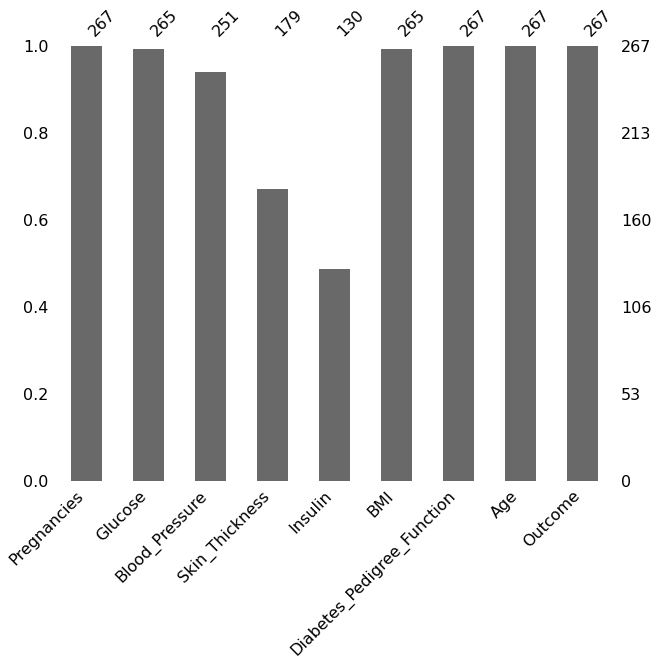

In [53]:
import missingno as msno #imports missingno
msno.bar(df_diabetic, figsize=(10, 8)) #Creating barplot to see missing values

From above plot we can visualize the missing values 

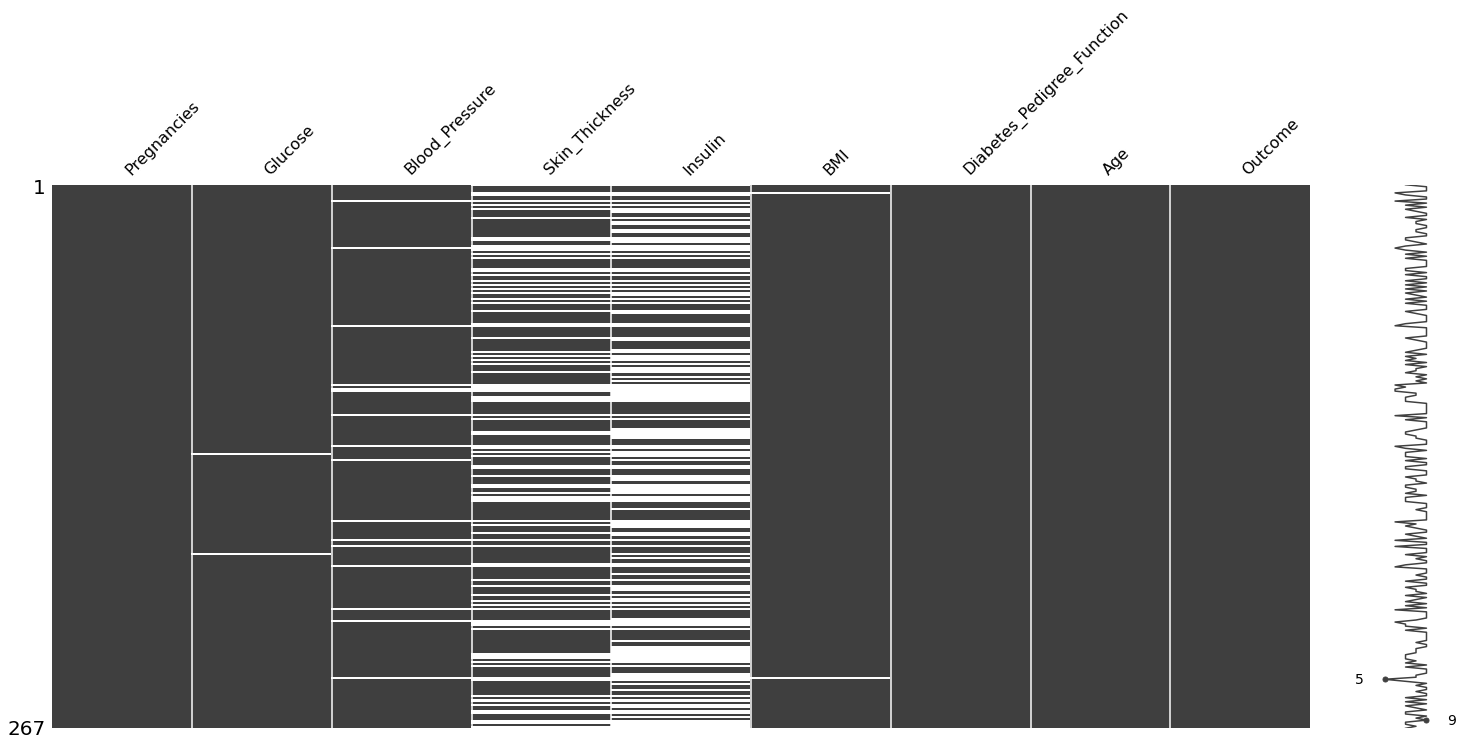

In [54]:
msno.matrix(df_diabetic) # creating matrix plot to see the pattern of missing values

From above plot we can see the missing values which are having blank space. More the spart lines, more missing values.

In [55]:
df_diabetic_impute=df_diabetic.iloc[:,:8]

In [56]:
df_diabetic_impute.head(3)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
5,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0


In [57]:
#Mean Imputation
from sklearn.impute import SimpleImputer #Imports SimpleImputer
df_diabetic_mean=df_diabetic_impute.copy(deep=True) #Makes a copy of df_diabetic_impute and assigns to df_diabetic_mean
diabetic_mean_imputer=SimpleImputer(strategy='mean') #initialize an instance of the SimpleImputer class by indicating the strategy (mean) 
df_diabetic_mean.iloc[:,:]=diabetic_mean_imputer.fit_transform(df_diabetic_mean) # performs fit and transform on the input

In [58]:
#Median Imputation
df_diabetic_median=df_diabetic_impute.copy(deep=True) #Makes a copy of df_diabetic_impute and assigns to df_diabetic_median
diabetic_median_imputer=SimpleImputer(strategy='median') #initialize an instance of the SimpleImputer class by indicating the strategy (median) 
df_diabetic_median.iloc[:,:]=diabetic_median_imputer.fit_transform(df_diabetic_median) # performs fit and transform on the input

In [59]:
#Mode Imputation
df_diabetic_mode=df_diabetic_impute.copy(deep=True) #Makes a copy of df_diabetic_impute and assigns to df_diabetic_mode
diabetic_mode_imputer=SimpleImputer(strategy='most_frequent') #initialize an instance of the SimpleImputer class by indicating the strategy (most_frequent) 
df_diabetic_mode.iloc[:,:]=diabetic_mode_imputer.fit_transform(df_diabetic_mode) # performs fit and transform on the input

In [60]:
#Constant Imputation
df_diabetic_constant=df_diabetic_impute.copy(deep=True) #Makes a copy of df_diabetic_impute and assigns to df_diabetic_constant
diabetic_constant_imputer=SimpleImputer(strategy='constant',fill_value=0) #initialize an instance of the SimpleImputer class by indicating the strategy (constant) 
df_diabetic_constant.iloc[:,:]=diabetic_constant_imputer.fit_transform(df_diabetic_constant) # performs fit and transform on the input

In [61]:
pip install fancyimpute #Install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 8.2 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=7e56e3683862e2391f00a528abb2dfe4de72e12c0ad848dc9c8a3dddf0e44c5d
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=2dcadd97c4768ef085f5aa9e547fefc85fe0a426bdd9f6e44cbc1d91ce0fde8a
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [62]:
from fancyimpute import KNN

In [63]:
knn_imputer=KNN()

In [64]:
df_diabetic_knn=df_diabetic_impute.copy(deep=True)

In [65]:
df_diabetic_knn.iloc[:,:]=knn_imputer.fit_transform(df_diabetic_knn)

Imputing row 1/267 with 2 missing, elapsed time: 0.029
Imputing row 101/267 with 3 missing, elapsed time: 0.034
Imputing row 201/267 with 0 missing, elapsed time: 0.043


In [66]:
df_diabetic_knn.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
1,8.0,183.0,64.0,30.299367,214.556774,23.300000,0.672,32.0
3,0.0,137.0,40.0,35.000000,168.000000,43.100000,2.288,33.0
5,3.0,78.0,50.0,32.000000,88.000000,31.000000,0.248,26.0
7,2.0,197.0,70.0,45.000000,543.000000,30.500000,0.158,53.0
8,8.0,125.0,96.0,31.290119,180.724292,38.497047,0.232,54.0


In [67]:
#Multiple Imputation by Chained Equation
from fancyimpute import IterativeImputer #Imports IterativeImputer
MICE_imputer=IterativeImputer() #Invoke IterativeImputer
df_diabetic_MICE=df_diabetic_impute.copy(deep=True) #Makes a copy of df_diabetic_impute and assigns to df_diabetic_MICE
df_diabetic_MICE.iloc[:,:]=MICE_imputer.fit_transform(df_diabetic_MICE) # performs fit and transform on the input
df_diabetic_MICE.head(2) #Gives first 2 records

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
1,8.0,183.0,64.0,24.536157,264.620267,23.3,0.672,32.0
3,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


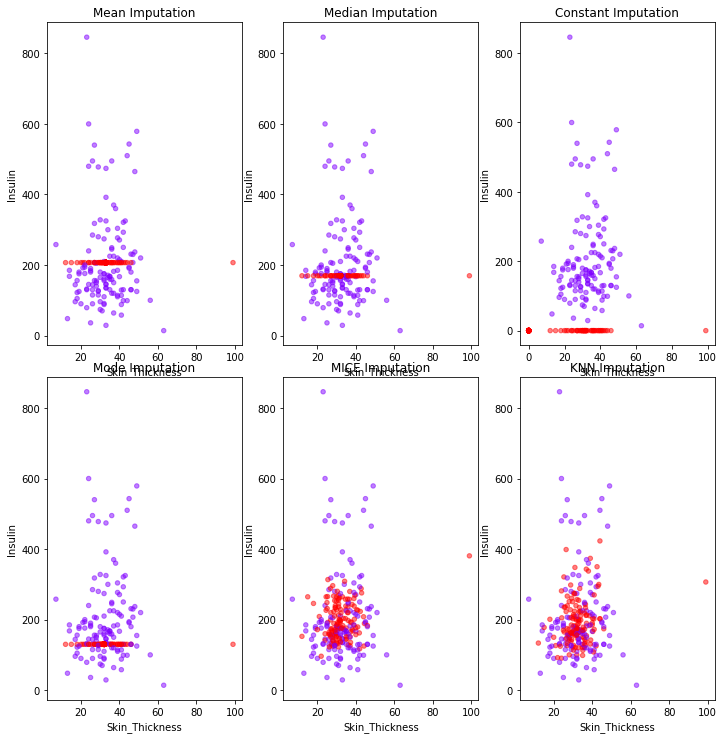

In [68]:
#Visualizing Imputation
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,10))#sets a group of subplots in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
nullity=df_diabetic_impute['Skin_Thickness'].isnull()+df_diabetic_impute['Insulin'].isnull() #Missing values in columns
#Dictionary of different imputations
imputations={'Mean Imputation':df_diabetic_mean,'Median Imputation':df_diabetic_median,'Constant Imputation':df_diabetic_constant,'Mode Imputation':df_diabetic_mode,'MICE Imputation':df_diabetic_MICE,'KNN Imputation':df_diabetic_knn}
#Iterates through the imputations 
for ax,df_key in zip(axes.flatten(),imputations):
  imputations[df_key].plot(x='Skin_Thickness',y='Insulin',kind='scatter',alpha=0.5,c=nullity,cmap='rainbow',ax=ax,colorbar=False,title=df_key)

Above plots help us to visualise which imputation is better. As KNN imputation shows patterns in above 2 plots for Skin_Thickness and Insulin variables which are having more missing values, KNN imputed data is used for further analysis.

### Handling Missing Values for df_non_diabetic

In [69]:
df_non_diabetic.head(3)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,non-diabetic
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,non-diabetic
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,non-diabetic


In [70]:
Glucose_nond_unique=df_non_diabetic.Glucose.unique() #Returns all unique values in Glucose column and value is assigned to Glucose_nond_unique
Glucose_nond_unique

array([ 85.,  89., 116., 115., 110., 139., 103., 126.,  99.,  97., 145.,
       117., 109.,  88.,  92., 122., 138., 180., 133., 106., 159., 146.,
        71., 105., 101., 150.,  73., 100.,  84.,  44., 141.,  95., 129.,
        79.,   0.,  62., 112., 113.,  74.,  83., 107.,  80., 123.,  81.,
       142., 144.,  93., 151., 125.,  96.,  76.,  78., 111., 132., 120.,
       118., 128., 108., 154., 102.,  57., 147.,  90., 136., 114., 153.,
       148.,  87.,  75., 143., 119., 179., 197., 104.,  91., 165., 124.,
        86., 193., 191., 155., 161.,  77., 137., 157., 130.,  61., 158.,
        98., 131., 127.,  82.,  72.,  94., 135., 140., 134., 173., 194.,
       166.,  68., 164., 189., 121.,  67., 152., 183., 162.,  56., 175.,
        65.])

From above output we can find the unique values.

In [71]:
(df_non_diabetic['Glucose'] == 0.0).sum() #Find number of zeros in Glucose column

3

From above output we can see there are 3 'zero' values. There are chances this value was entered wrongly and are therefore missing values.


In [72]:
#replaces 0 with nan value in Glucose column
df_non_diabetic['Glucose'] = df_non_diabetic['Glucose'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
(df_non_diabetic['Glucose'] == 0.0).sum() #Find number of zeros in Glucose column


0

In [74]:
Blood_Pressure_nond_unique=df_non_diabetic.Blood_Pressure.unique() #Returns all unique values in Blood_Pressure column and value is assigned to Blood_Pressure_unique
Blood_Pressure_nond_unique

array([ 66.,  74.,   0.,  92.,  80.,  30.,  88.,  84.,  82.,  75.,  58.,
        78.,  60.,  76.,  64.,  56.,  70.,  50.,  62.,  85.,  86.,  48.,
        72.,  44.,  65.,  68.,  55.,  96., 122.,  52.,  90.,  95.,  46.,
       108.,  54., 100.,  61.,  94.,  98., 110.,  24.,  38., 106.])

From above output we can find the unique values.


In [75]:
(df_non_diabetic['Blood_Pressure'] == 0.0).sum() #Find number of zeros in Blood_Pressure column

19

From above output we can see there are 19 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [76]:
#replaces 0 with nan value in Glucose column
df_non_diabetic['Blood_Pressure'] = df_non_diabetic['Blood_Pressure'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
(df_non_diabetic['Blood_Pressure'] == 0.0).sum() #Find number of zeros in Blood_Pressure column


0

In [78]:
Skin_Thickness_nond_unique=df_non_diabetic.Skin_Thickness.unique() #Returns all unique values in Skin_Thickness column and value is assigned to Skin_Thickness_unique
Skin_Thickness_nond_unique

array([29., 23.,  0., 38., 41., 15., 19., 26., 11., 31., 33., 25., 18.,
       27., 21., 42., 10., 60., 34., 13., 35., 20., 30., 22., 28., 54.,
       40., 39., 36., 37., 17., 50., 12., 24., 44., 16., 32., 14., 52.,
       43.,  8., 46., 45.,  7., 47., 48.])

From above output we can find the unique values.

In [79]:
(df_non_diabetic['Skin_Thickness'] == 0.0).sum() #Find number of zeros in Skin_Thickness column


139

From above output we can see there are 139 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [80]:
#replaces 0 with nan value in Skin_Thickness column
df_non_diabetic['Skin_Thickness'] = df_non_diabetic['Skin_Thickness'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
(df_non_diabetic['Skin_Thickness'] == 0.0).sum() #Find number of zeros in Skin_Thickness column

0

In [82]:
Insulin_nond_unique=df_non_diabetic.Insulin.unique() #Returns all unique values in Insulin column and value is assigned to Insulin_unique
Insulin_nond_unique


array([  0.,  94.,  83., 235., 140., 110.,  54., 192.,  70.,  82.,  36.,
        23., 342., 142., 128.,  38., 100., 270.,  71., 125., 176.,  48.,
        64., 228.,  76.,  40., 152.,  18.,  37.,  51., 135.,  49.,  50.,
        92., 325.,  63., 284., 119., 204., 485.,  53., 105., 285.,  78.,
        55.,  44., 190.,  87., 120.,  56.,  32., 744.,  45.,  88., 194.,
       680., 402., 375., 130.,  67.,  57., 116., 278., 122., 155., 545.,
        75., 215.,  42., 148.,  85., 231., 168.,  68.,  52.,  58., 255.,
        73., 108.,  74.,  43., 293.,  66.,  89., 158.,  84.,  72., 182.,
        59.,  81., 196., 415., 275., 115., 165., 310.,  61., 170., 145.,
        60.,  95., 210., 480., 265., 193.,  79.,  86., 326., 188., 106.,
        65., 166.,  77., 126., 330., 230.,  25.,  41., 272.,  15., 160.,
        90., 183.,  46., 440., 200., 132., 240., 205., 180., 335., 387.,
        22., 291., 178.,  16., 112.])

From above output we can find the unique values.

In [83]:
(df_non_diabetic['Insulin'] == 0.0).sum() #Find number of zeros in Insulin column

236

From above output we can see there are 236 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [84]:
#replaces 0 with nan value in Insulin column
df_non_diabetic['Insulin'] = df_non_diabetic['Insulin'].replace(0, np.nan)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [85]:
(df_non_diabetic['Insulin'] == 0.0).sum() #Find number of zeros in Insulin column

0

In [86]:
BMI_nond_unique=df_non_diabetic.BMI.unique() #Returns all unique values in BMI column and value is assigned to BMI_unique
BMI_nond_unique

array([26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.3, 35.4, 23.2, 22.2,
       34.1, 36. , 24.8, 19.9, 27.6, 24. , 33.2, 34. , 40.2, 22.7, 27.4,
       29.7, 28. ,  0. , 19.4, 24.2, 24.4, 34.7, 23. , 46.8, 40.5, 41.5,
       25. , 25.4, 29. , 42.7, 19.6, 28.9, 28.6, 35.1, 32. , 24.7, 32.6,
       37.7, 22.4, 29.3, 24.6, 32.4, 36.6, 38.5, 26.5, 19.1, 46.7, 33.9,
       31.6, 20.4, 28.7, 26.1, 22.5, 39.6, 29.5, 34.3, 31.2, 33.7, 28.2,
       34.2, 33.6, 26.8, 42.9, 33.3, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       32.5, 32.8, 30.5, 27.3, 37.4, 21.9, 40.6, 25.2, 37.2, 44.2, 29.6,
       31.9, 28.4, 43.5, 45. , 34.9, 27.7, 22.6, 33.1, 24.3, 31. , 40.1,
       23.9, 42.8, 30. , 28.8, 23.6, 34.6, 35.7, 36.7, 45.2, 35. , 18.4,
       29.2, 38.2, 52.3, 30.1, 35.8, 25.9, 30.9, 32.1, 40. , 25.1, 27.8,
       24.9, 25.3, 35.9, 26. , 38.7, 20.8, 36.1, 35.5, 30.7, 21. , 39.7,
       26.2, 39.4, 19.3, 38.1, 27.5, 23.1, 32.7, 47.9, 36.8, 23.5, 21.8,
       42.2, 34.4, 27.2, 29.8, 39.2, 36.2, 43.4, 20

From above output we can find the unique values.

In [87]:
(df_non_diabetic['BMI'] == 0.0).sum() #Find number of zeros in BMI column

9

From above output we can see there are 9 'zero' values. There are chances this value was entered wrongly and are therefore missing values.

In [88]:
#replaces 0 with nan value in BMI column
df_non_diabetic['BMI'] = df_non_diabetic['BMI'].replace(0, np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
(df_non_diabetic['BMI'] == 0.0).sum() #Find number of zeros in BMI column

0

In [90]:
Diabetes_Pedigree_Function_nond_unique=df_non_diabetic.Diabetes_Pedigree_Function.unique() #Returns all unique values in Diabetes_Pedigree_Function column and value is assigned to Diabetes_Pedigree_Function_unique
Diabetes_Pedigree_Function_nond_unique


array([0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.183, 0.704, 0.388,
       0.487, 0.245, 0.337, 0.546, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.271, 0.696, 0.235, 0.294, 0.564, 0.586, 0.305, 0.491, 0.526,
       0.342, 0.718, 0.248, 0.962, 1.781, 0.173, 0.304, 0.587, 0.699,
       0.203, 0.845, 0.334, 0.189, 0.411, 0.231, 0.396, 0.14 , 0.391,
       0.37 , 0.307, 0.102, 0.767, 0.237, 0.698, 0.178, 0.324, 0.165,
       0.258, 0.443, 0.261, 0.761, 0.255, 0.13 , 0.323, 0.356, 0.179,
       0.262, 0.283, 0.93 , 0.801, 0.207, 0.287, 0.336, 0.192, 0.654,
       0.223, 0.26 , 0.404, 0.186, 0.452, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703, 0.159, 0.268, 0.286, 0.318, 0.572, 0.096, 1.4  ,
       0.218, 0.085, 0.399, 0.432, 0.687, 0.637, 0.833, 0.229, 0.204,
       0.368, 0.256, 0.709, 0.471, 0.495, 0.773, 0.678, 0.382, 0.19 ,
       0.084, 0.725, 0.299, 0.244, 0.142, 0.374, 0.136, 0.187, 0.874,
       0.236, 0.787, 0.407, 0.289, 0.29 , 0.375, 0.164, 0.464, 0.209,
       0.666, 0.101,

From above output we can find the unique values.

In [91]:
(df_non_diabetic['Diabetes_Pedigree_Function'] == 0.0).sum() #Find number of zeros in Diabetes_Pedigree_Function column

0

From above output there are no missing values in Diabetes_Pedigree_Function

In [92]:
Age_nond_unique=df_non_diabetic.Age.unique() #Returns all unique values in Age column and value is assigned to Age_unique
Age_nond_unique

array([31., 21., 30., 29., 57., 33., 27., 50., 22., 38., 60., 28., 45.,
       35., 26., 37., 48., 40., 24., 42., 44., 36., 32., 54., 25., 23.,
       41., 34., 69., 39., 55., 65., 47., 61., 63., 43., 52., 51., 58.,
       46., 49., 72., 62., 81., 59., 67., 66., 64., 68., 56., 53.])


From above output we can find the unique values.

In [93]:
(df_non_diabetic['Age'] == 0.0).sum() #Find number of zeros in Age column

0

From above output we can see that there are no 0 values in Age.


In [94]:
df_non_diabetic.info() #Gives information about df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Pregnancies                 500 non-null    float64 
 1   Glucose                     497 non-null    float64 
 2   Blood_Pressure              481 non-null    float64 
 3   Skin_Thickness              361 non-null    float64 
 4   Insulin                     264 non-null    float64 
 5   BMI                         491 non-null    float64 
 6   Diabetes_Pedigree_Function  500 non-null    float64 
 7   Age                         500 non-null    float64 
 8   Outcome                     500 non-null    category
dtypes: category(1), float64(8)
memory usage: 35.8 KB


From above output we can see the missing values in Glucose, Blood_Pressure, Skin_Thickness, Insulin and BMI columns

In [95]:
df_non_diabetic_missing=df_non_diabetic.isnull() #detects missing values and is assigned to df_non_diabetic_missing


In [96]:
df_non_diabetic_missing #missing values

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,False
6,False,False,True,True,True,False,False,False,False
9,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
761,False,False,False,True,True,False,False,False,False
762,False,False,False,False,False,False,False,False,False
763,False,False,False,False,True,False,False,False,False
764,False,False,False,False,False,False,False,False,False



From above output True vaues are missing values

In [97]:
#Total missing values
df_non_diabetic_missing.sum()

Pregnancies                     0
Glucose                         3
Blood_Pressure                 19
Skin_Thickness                139
Insulin                       236
BMI                             9
Diabetes_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64

From above output we can see that the number of missing values in Glucose: 3, Blood_Pressure: 19, Skin_Thickness: 139, Insulin: 236 and BMI: 9.

In [98]:
#Percentage of missing values
df_non_diabetic_missing.mean()*100

Pregnancies                    0.0
Glucose                        0.6
Blood_Pressure                 3.8
Skin_Thickness                27.8
Insulin                       47.2
BMI                            1.8
Diabetes_Pedigree_Function     0.0
Age                            0.0
Outcome                        0.0
dtype: float64

From above output we can see the percentage of missing values. Insulin and Skin_Thickness are having higher percentage of missing values.

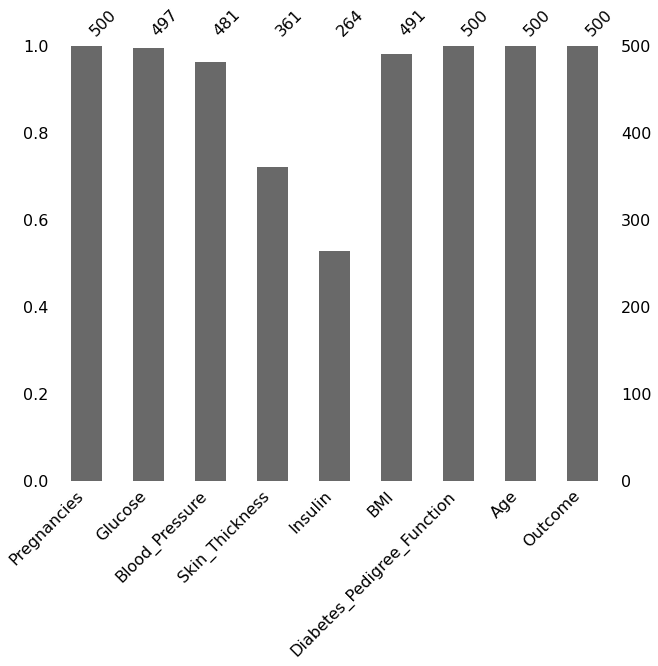

In [99]:
import missingno as msno #imports missingno
msno.bar(df_non_diabetic, figsize=(10, 8)) #Creating barplot to see missing values

From above plot we can visualize the missing values


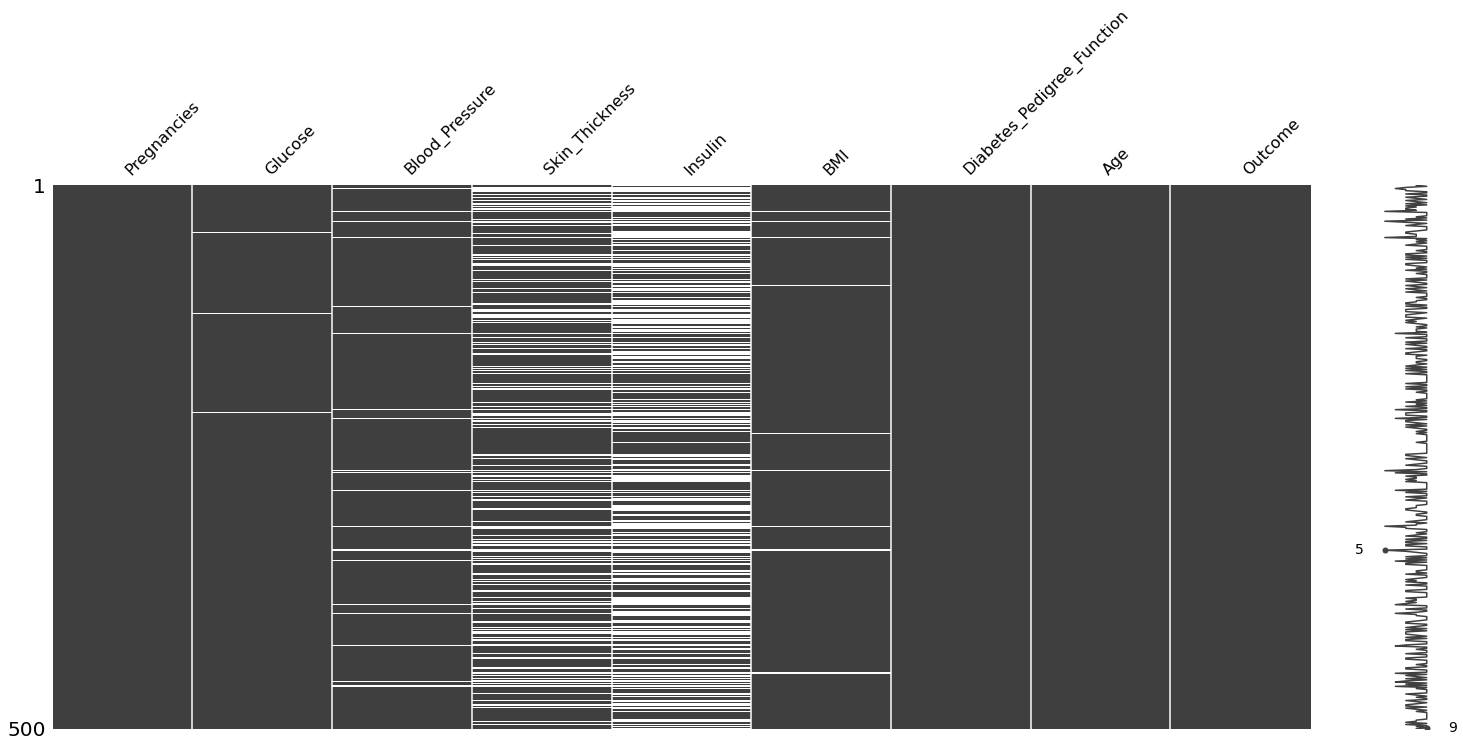

In [100]:
msno.matrix(df_non_diabetic) # creating matrix plot to see the pattern of missing values

From above plot we can see the missing values which are having blank space. More the spart lines, more missing values.


In [101]:
df_non_diabetic_impute=df_non_diabetic.iloc[:,:8]

In [102]:
df_non_diabetic_impute.head(3)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0


In [103]:
#Mean Imputation
from sklearn.impute import SimpleImputer #Imports SimpleImputer
df_non_diabetic_mean=df_non_diabetic_impute.copy(deep=True) #Makes a copy of df_diabetic_impute and assigns to df_non_diabetic_mean
non_diabetic_mean_imputer=SimpleImputer(strategy='mean') #initialize an instance of the SimpleImputer class by indicating the strategy (mean) 
df_non_diabetic_mean.iloc[:,:]=non_diabetic_mean_imputer.fit_transform(df_non_diabetic_mean) # performs fit and transform on the input

In [104]:
#Median Imputation
df_non_diabetic_median=df_non_diabetic_impute.copy(deep=True) #Makes a copy of df_non_diabetic_impute and assigns to df_non_diabetic_median
non_diabetic_median_imputer=SimpleImputer(strategy='median') #initialize an instance of the SimpleImputer class by indicating the strategy (median) 
df_non_diabetic_median.iloc[:,:]=non_diabetic_median_imputer.fit_transform(df_non_diabetic_median) # performs fit and transform on the input

In [105]:
#Mode Imputation
df_non_diabetic_mode=df_non_diabetic_impute.copy(deep=True) #Makes a copy of df_non_diabetic_impute and assigns to df_non_diabetic_mode
non_diabetic_mode_imputer=SimpleImputer(strategy='most_frequent') #initialize an instance of the SimpleImputer class by indicating the strategy (most_frequent) 
df_non_diabetic_mode.iloc[:,:]=non_diabetic_mode_imputer.fit_transform(df_non_diabetic_mode) # performs fit and transform on the input

In [106]:
#Constant Imputation
df_non_diabetic_constant=df_non_diabetic_impute.copy(deep=True) #Makes a copy of df_non_diabetic_impute and assigns to df_non_diabetic_constant
non_diabetic_constant_imputer=SimpleImputer(strategy='constant',fill_value=0) #initialize an instance of the SimpleImputer class by indicating the strategy (constant) 
df_non_diabetic_constant.iloc[:,:]=non_diabetic_constant_imputer.fit_transform(df_non_diabetic_constant) # performs fit and transform on the input

In [107]:
knn_imputer=KNN()
df_non_diabetic_knn=df_non_diabetic_impute.copy(deep=True)

In [108]:
df_non_diabetic_knn.iloc[:,:]=knn_imputer.fit_transform(df_non_diabetic_knn)


Imputing row 1/500 with 1 missing, elapsed time: 0.062
Imputing row 101/500 with 0 missing, elapsed time: 0.067
Imputing row 201/500 with 0 missing, elapsed time: 0.071
Imputing row 301/500 with 0 missing, elapsed time: 0.076
Imputing row 401/500 with 1 missing, elapsed time: 0.083


In [109]:
df_non_diabetic_knn.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,1.0,85.0,66.000000,29.000000,62.914766,26.6,0.351,31.0
2,1.0,89.0,66.000000,23.000000,94.000000,28.1,0.167,21.0
4,5.0,116.0,74.000000,19.939566,106.227529,25.6,0.201,30.0
6,10.0,115.0,75.945789,34.321252,120.243952,35.3,0.134,29.0
9,4.0,110.0,92.000000,30.492275,133.218109,37.6,0.191,30.0


In [110]:
#Multiple Imputation by Chained Equation
from fancyimpute import IterativeImputer #Imports IterativeImputer
MICE_imputer=IterativeImputer() #Invoke IterativeImputer
df_non_diabetic_MICE=df_non_diabetic_impute.copy(deep=True) #Makes a copy of df_non_diabetic_impute and assigns to df_non_diabetic_MICE
df_non_diabetic_MICE.iloc[:,:]=MICE_imputer.fit_transform(df_non_diabetic_MICE) # performs fit and transform on the input
df_non_diabetic_MICE.head(2) #Gives first 2 records

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,1.0,85.0,66.0,29.0,50.626169,26.6,0.351,31.0
2,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0


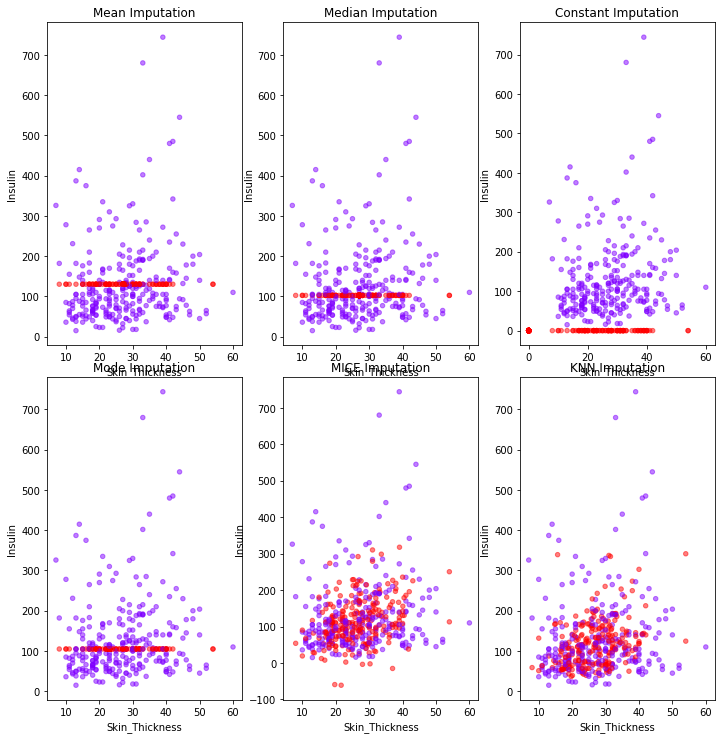

In [111]:
#Visualizing Imputation
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,10))#sets a group of subplots in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
nullity=df_non_diabetic_impute['Skin_Thickness'].isnull()+df_non_diabetic_impute['Insulin'].isnull() #Missing values in columns
#Dictionary of different imputations
imputations={'Mean Imputation':df_non_diabetic_mean,'Median Imputation':df_non_diabetic_median,'Constant Imputation':df_non_diabetic_constant,'Mode Imputation':df_non_diabetic_mode,'MICE Imputation':df_non_diabetic_MICE,'KNN Imputation':df_non_diabetic_knn}
#Iterates through the imputations 
for ax,df_key in zip(axes.flatten(),imputations):
  imputations[df_key].plot(x='Skin_Thickness',y='Insulin',kind='scatter',alpha=0.5,c=nullity,cmap='rainbow',ax=ax,colorbar=False,title=df_key)

Above plots help us to visualise which imputation is better. As KNN imputation shows patterns in above 2 plots for Skin_Thickness and Insulin variables which are having more missing values, KNN imputed data is used for further analysis.

### Dealing with Outliers in df_diabetic

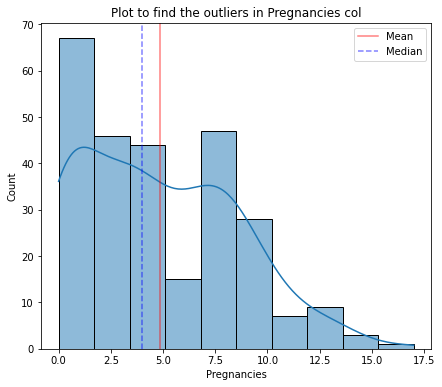

In [112]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Pregnancies
sns.histplot(data=df_diabetic_knn['Pregnancies'],kde=True) 
plt.axvline(x=df_diabetic_knn.Pregnancies.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_knn.Pregnancies.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Pregnancies col') #Title of the plot
plt.show() #Displays the plot

Above plot shows distribution is right skewed and there are outliers

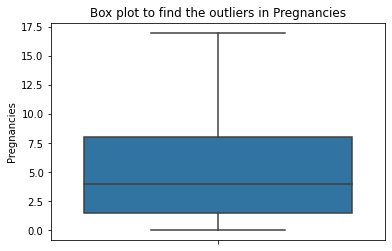

In [113]:
sns.boxplot(y=df_diabetic_knn['Pregnancies']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Pregnancies")
plt.show() #Displays the plot

From above plot there are outliers above the upper whisker

In [114]:
from scipy import stats #Imports stats from scipy library
z=np.abs(stats.zscore(df_diabetic_knn['Pregnancies'])) #Finds Z score
print(z)

1      0.839059
3      1.299640
5      0.497628
7      0.764965
8      0.839059
         ...   
754    1.032303
756    1.299640
758    0.304384
760    1.106396
765    1.032303
Name: Pregnancies, Length: 267, dtype: float64


In [115]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([55]),)


From above output there are outliers in the mentioned index values

In [116]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


There are no outliers below the lower threshold

In [117]:
df_diabetic_new=df_diabetic_knn.copy(deep=True) #Making a copy of df_diabetic_knn to preserve the original dataframe

In [118]:
df_diabetic_new.head(2) #Gives first 2 records

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
1,8.0,183.0,64.0,30.299367,214.556774,23.3,0.672,32.0
3,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [119]:
df_diabetic_new['Pregnancies_median']=np.where(z>3,df_diabetic_new['Pregnancies'].median(),df_diabetic_new['Pregnancies']) #Replacing the outliers with median and create column Pregnancies_median

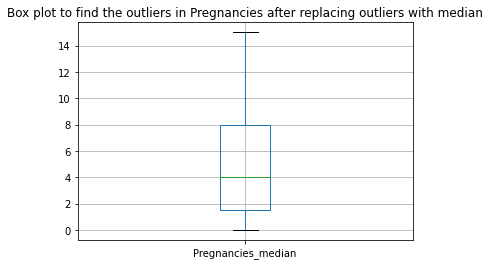

In [120]:
df_diabetic_new.boxplot('Pregnancies_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Pregnancies after replacing outliers with median")
plt.show() #Displays the plot

From above plot we can see that the number of outliers have been reduced in Pregnancies_median

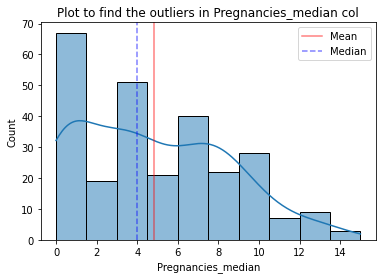

In [121]:
#Finding the frequency with the median replace Pregnancies column
sns.histplot(data=df_diabetic_new['Pregnancies_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Pregnancies_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Pregnancies_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend()
plt.title('Plot to find the outliers in Pregnancies_median col') #Title of the plot
plt.show() #Displays the plot

The distribution of Pregnancies_median is right skewed.

In [122]:
Q1=np.percentile(df_diabetic_new['Pregnancies'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_diabetic_new['Pregnancies'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_diabetic_new['Pregnancies'],75,interpolation='midpoint') #Third Quartile

In [123]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_diabetic_new['Pregnancies']: #iterates through Pregnancies column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Pregnancies column is ',outlier)

Interquartile range is  6.5
low_limit is  -8.25
up_limit is  17.75
outlier in the Pregnancies column is  []


Thus there are no outliers in Pregnancies column

From above plots and observations we can see that Pregnancies_median treated outliers and thus can be used in futher analysis.

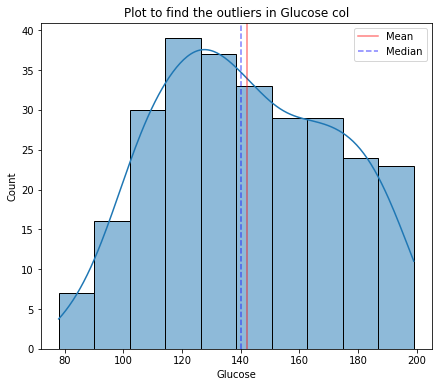

In [124]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Glucose
sns.histplot(data=df_diabetic_new['Glucose'],kde=True) 
plt.axvline(x=df_diabetic_new.Glucose.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Glucose.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Glucose col') #Title of the plot
plt.show() #Displays the plot

The above shows the frequency distribution of Glucose. As mean>median it is right skewed.

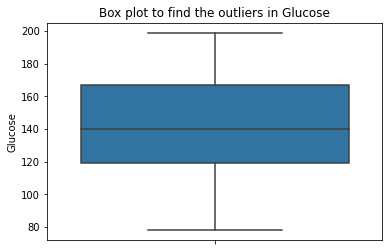

In [125]:
sns.boxplot(y=df_diabetic_new['Glucose']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Glucose")
plt.show() #Displays the plot

From above plot it is clear that there are no outliers in Glucose

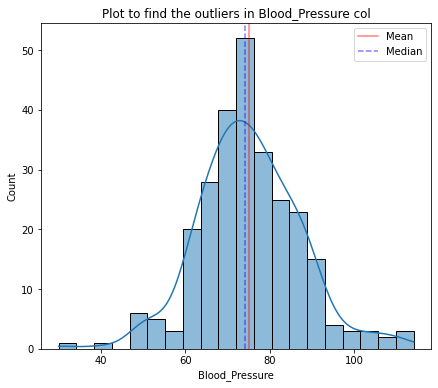

In [126]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Blood_Pressure
sns.histplot(data=df_diabetic_new['Blood_Pressure'],kde=True) 
plt.axvline(x=df_diabetic_new.Blood_Pressure.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Blood_Pressure.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Blood_Pressure col') #Title of the plot
plt.show() #Displays the plot

Blood_Pressure is normally distributed.

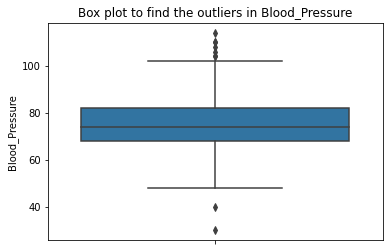

In [127]:
sns.boxplot(y=df_diabetic_new['Blood_Pressure']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Blood_Pressure")
plt.show() #Displays the plot

Above boxplot shows that there are outliers in Blood_Pressure.

In [128]:
z=np.abs(stats.zscore(df_diabetic_new['Blood_Pressure'])) #Finds Z score
print(z)

1      0.910836
3      2.892616
5      2.066875
7      0.415391
8      1.731537
         ...   
754    1.070944
756    0.250243
758    1.401240
760    0.085095
765    1.241133
Name: Blood_Pressure, Length: 267, dtype: float64


In [129]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([ 45, 236]),)


Above indices are having outliers greater than upper threshold

In [130]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [131]:
df_diabetic_new['Blood_Pressure_median']=np.where(z>3,df_diabetic_new['Blood_Pressure'].median(),df_diabetic_new['Blood_Pressure']) #Replacing the outliers with median and create column Blood_Pressure_median

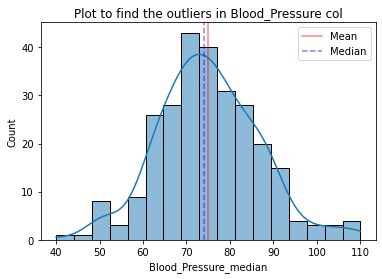

In [132]:
#Finding the frequency distribution of Blood_Pressure_median column
sns.histplot(data=df_diabetic_new['Blood_Pressure_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Blood_Pressure_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Blood_Pressure_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Blood_Pressure col') #Title of the plot
plt.show() #Displays the plot

Above plot shows the frequency distribution of Blood_Pressure_median which is normal.

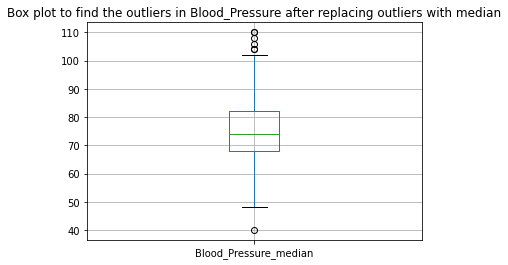

In [133]:
df_diabetic_new.boxplot('Blood_Pressure_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Blood_Pressure after replacing outliers with median")
plt.show() #Displays the plot

From above boxplot we can see that outliers are handled well in Blood_Pressure_median.

In [134]:
Q1=np.percentile(df_diabetic_new['Blood_Pressure'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_diabetic_new['Blood_Pressure'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_diabetic_new['Blood_Pressure'],75,interpolation='midpoint') #Third Quartile

In [135]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_diabetic_new['Blood_Pressure']: #iterates through Blood_Pressure column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Blood_Pressure column is ',outlier)

Interquartile range is  14.0
low_limit is  47.0
up_limit is  103.0
outlier in the Blood_Pressure column is  [40.0, 110.0, 108.0, 30.0, 110.0, 104.0, 104.0, 106.0, 114.0]


There are outliers both above up_limit and below low_limit.

In [136]:
df_diabetic_new['Blood_Pressure_iqr']=np.where(df_diabetic_new['Blood_Pressure']>up_lim,up_lim,df_diabetic_new['Blood_Pressure']) #Replace the outliers with upper limit 

In [137]:
df_diabetic_new['Blood_Pressure_iqr']=np.where(df_diabetic_new['Blood_Pressure']<low_lim,low_lim,df_diabetic_new['Blood_Pressure']) #Replace the outliers with lower limit 

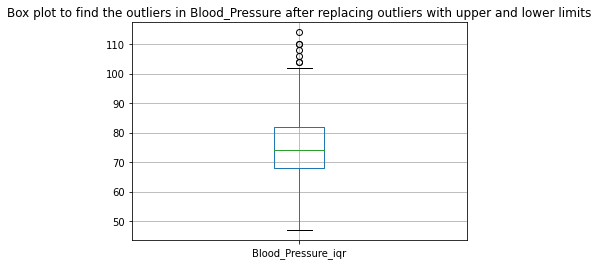

In [138]:
df_diabetic_new.boxplot('Blood_Pressure_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Blood_Pressure after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

Above plot shows that the outliers are not treated well in Blood_Pressure_iqr.

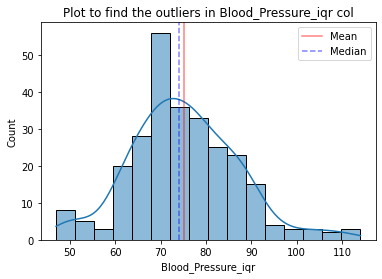

In [139]:
#Finding the frequency distribution of Blood_Pressure_iqr column
sns.histplot(data=df_diabetic_new['Blood_Pressure_iqr'],kde=True) 
plt.axvline(x=df_diabetic_new.Blood_Pressure_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Blood_Pressure_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Blood_Pressure_iqr col') #Title of the plot
plt.show() #Displays the plot

Above plot ahows Blood_Pressure_iqr is normally distributed.

In [140]:
df_diabetic_new.Blood_Pressure_median.skew()

0.22489914689234172

In [141]:
df_diabetic_new.Blood_Pressure_iqr.skew()

0.3207755206181034

From above plots and observations we can see that Blood_Pressure_median treated outliers in a better way and thus can be used in futher analysis.

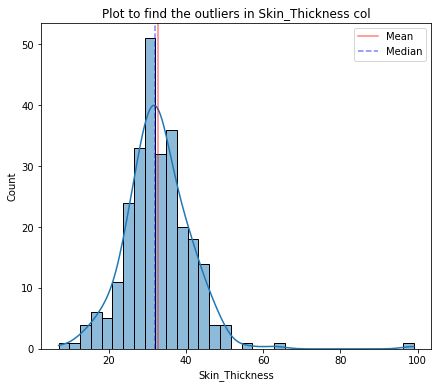

In [142]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Skin_Thickness
sns.histplot(data=df_diabetic_new['Skin_Thickness'],kde=True) 
plt.axvline(x=df_diabetic_new.Skin_Thickness.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Skin_Thickness.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Skin_Thickness col') #Title of the plot
plt.show() #Displays the plot

Above plot shows that Skin_Thickness is normally distributed.

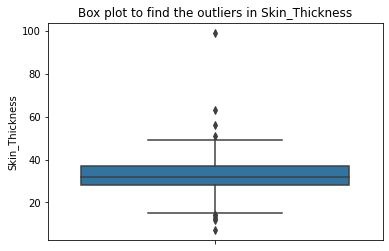

In [143]:
sns.boxplot(y=df_diabetic_new['Skin_Thickness']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Skin_Thickness")
plt.show() #Displays the plot

Above boxplot shows the outliers in Skin_Thickness.

In [144]:
z=np.abs(stats.zscore(df_diabetic_new['Skin_Thickness'])) #Finds Z score
print(z)

1      0.284888
3      0.245553
5      0.092981
7      1.373998
8      0.173087
         ...   
754    0.696931
756    0.083966
758    0.773418
760    0.205826
765    0.417891
Name: Skin_Thickness, Length: 267, dtype: float64


In [145]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([169, 198]),)


Above indices are having outliers greater than upper threshold

In [146]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [147]:
df_diabetic_new['Skin_Thickness_median']=np.where(z>3,df_diabetic_new['Skin_Thickness'].median(),df_diabetic_new['Skin_Thickness']) #Replacing the outliers with median and create column Skin_Thickness_median

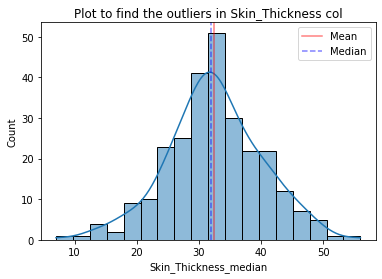

In [148]:
#Finding the frequency distribution of Skin_Thickness_median column
sns.histplot(data=df_diabetic_new['Skin_Thickness_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Skin_Thickness_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Skin_Thickness_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Skin_Thickness col') #Title of the plot
plt.show() #Displays the plot

Frequency distribution of Skin_Thickness_median.

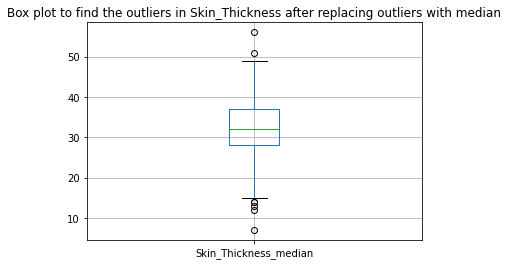

In [149]:
df_diabetic_new.boxplot('Skin_Thickness_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Skin_Thickness after replacing outliers with median")
plt.show() #Displays the plot

Above plot shows that there are outliers in Skin_Thickness_median.

In [150]:
Q1=np.percentile(df_diabetic_new['Skin_Thickness'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_diabetic_new['Skin_Thickness'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_diabetic_new['Skin_Thickness'],75,interpolation='midpoint') #Third Quartile

In [151]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_diabetic_new['Skin_Thickness']: #iterates through Skin_Thickness column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Skin_Thickness column is ',outlier)

Interquartile range is  9.0
low_limit is  14.5
up_limit is  50.5
outlier in the Skin_Thickness column is  [51.0, 56.0, 14.0, 13.0, 7.0, 12.0, 63.0, 99.0, 14.0]


In [152]:
df_diabetic_new['Skin_Thickness_iqr']=np.where(df_diabetic_new['Skin_Thickness']<low_lim,low_lim,df_diabetic_new['Skin_Thickness']) #Replace the outliers with lower limit 

In [153]:
df_diabetic_new['Skin_Thickness_iqr']=np.where(df_diabetic_new['Skin_Thickness']>up_lim,up_lim,df_diabetic_new['Skin_Thickness']) #Replace the outliers with upper limit 

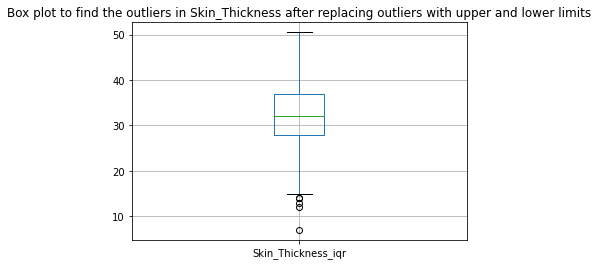

In [154]:
df_diabetic_new.boxplot('Skin_Thickness_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Skin_Thickness after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

From above plots and observations we can see that Skin_Thickness_iqr treated outliers in a better way and thus can be used in futher analysis.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


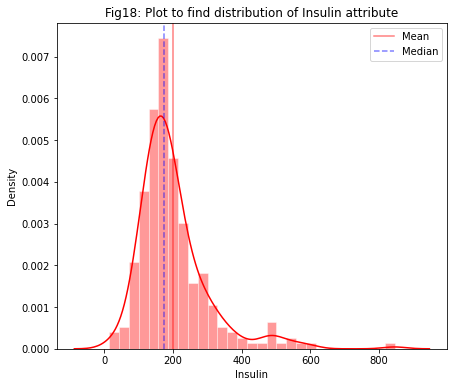

In [155]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Insulin column
sns.distplot(a=df_diabetic_new.Insulin, color='red', hist_kws={"edgecolor": 'white'}) 
plt.axvline(x=df_diabetic_new.Insulin.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Insulin.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Fig18: Plot to find distribution of Insulin attribute') #Title of the plot
plt.show() #Displays the plot

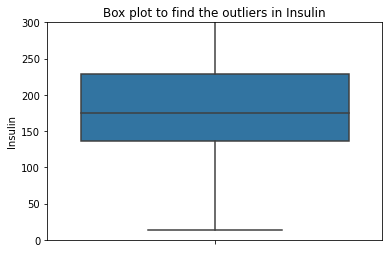

In [156]:
sns.boxplot(y=df_diabetic_new['Insulin']) #Boxplot to find the outliers
plt.ylim(0, 300)
plt.title("Box plot to find the outliers in Insulin")
plt.show() #Displays the plot

Above plot shows the outliers in Insulin.

In [157]:
z=np.abs(stats.zscore(df_diabetic_new['Insulin'])) #Finds Z score
print(z)

1      0.138338
3      0.312665
5      1.087640
7      3.320027
8      0.189403
         ...   
754    0.874522
756    0.548380
758    0.341860
760    0.084629
765    0.150659
Name: Insulin, Length: 267, dtype: float64


In [158]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([  3,   6, 156, 200, 222, 260]),)


Above indices are having outliers greater than upper threshold.

In [159]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [160]:
df_diabetic_new['Insulin_median']=np.where(z>3,df_diabetic_new['Insulin'].median(),df_diabetic_new['Insulin']) #Replacing the outliers with median and create column Insulin_median

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


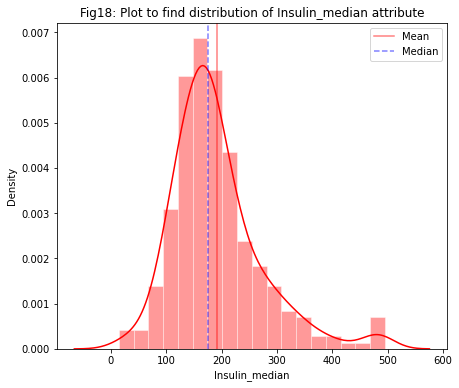

In [161]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Insulin column
sns.distplot(a=df_diabetic_new.Insulin_median, color='red', hist_kws={"edgecolor": 'white'}) 
plt.axvline(x=df_diabetic_new.Insulin_median.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Insulin_median.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Fig18: Plot to find distribution of Insulin_median attribute') #Title of the plot
plt.show() #Displays the plot

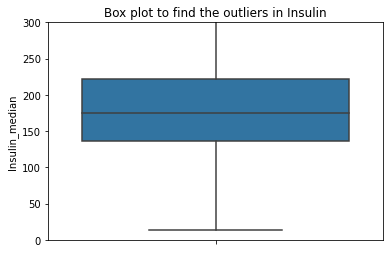

In [162]:
sns.boxplot(y=df_diabetic_new['Insulin_median']) #Boxplot to find the outliers
plt.ylim(0, 300)
plt.title("Box plot to find the outliers in Insulin")
plt.show() #Displays the plot

Above plot shows outliers in Insulin_median.

In [163]:
Q1=np.percentile(df_diabetic_new['Insulin'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_diabetic_new['Insulin'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_diabetic_new['Insulin'],75,interpolation='midpoint') #Third Quartile

In [164]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_diabetic_new['Insulin']: #iterates through Insulin column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Insulin column is ',outlier)

Interquartile range is  92.48121731471545
low_limit is  -2.248584279110645
up_limit is  367.6762849797512
outlier in the Insulin column is  [543.0, 846.0, 373.7473861094453, 495.0, 495.0, 478.0, 370.0, 423.07905477716315, 465.0, 579.0, 474.0, 398.6642762616166, 600.0, 540.0, 480.0, 392.0, 510.0]


In [165]:
df_diabetic_new['Insulin_iqr']=np.where(df_diabetic_new['Insulin']>up_lim,up_lim,df_diabetic_new['Insulin']) #Replace the outliers with upper limit 

In [166]:
df_diabetic_new['Insulin_iqr']=np.where(df_diabetic_new['Insulin']<low_lim,low_lim,df_diabetic_new['Insulin']) #Replace the outliers with lower limit 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


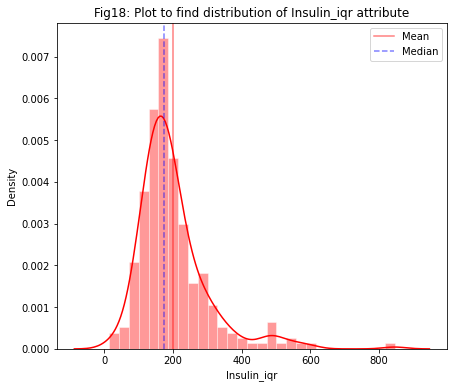

In [167]:
#Finding the frequency distribution of Insulin_iqr column
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
sns.distplot(a=df_diabetic_new.Insulin_iqr, color='red', hist_kws={"edgecolor": 'white'}) 
plt.axvline(x=df_diabetic_new.Insulin_iqr.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Insulin_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Fig18: Plot to find distribution of Insulin_iqr attribute') #Title of the plot
plt.show() #Displays the plot

Above plot shows the distribution of Insulin_iqr.

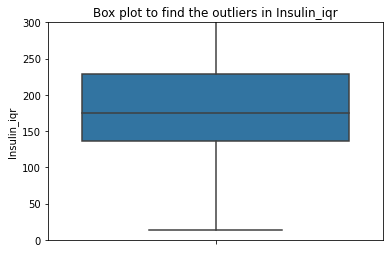

In [168]:
sns.boxplot(y=df_diabetic_new['Insulin_iqr']) #Boxplot to find the outliers
plt.ylim(0, 300)
plt.title("Box plot to find the outliers in Insulin_iqr")
plt.show() #Displays the plot

In [169]:
df_diabetic_new.Insulin_median.skew()

1.3068108009987505

In [170]:
df_diabetic_new.Insulin_iqr.skew()

2.1686202952483904

From above plots and observations we can see that Insulin_median treated outliers in a better way and thus can be used in futher analysis.

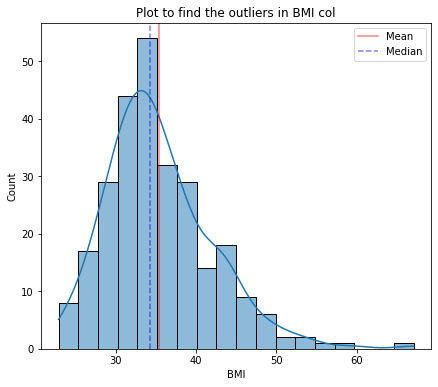

In [171]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for BMI
sns.histplot(data=df_diabetic_new['BMI'],kde=True) 
plt.axvline(x=df_diabetic_new.BMI.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.BMI.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in BMI col') #Title of the plot
plt.show() #Displays the plot

Above plot shows BMI is right skewed.

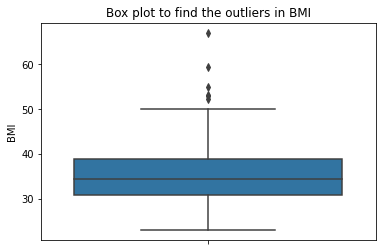

In [172]:
sns.boxplot(y=df_diabetic_new['BMI']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in BMI")
plt.show() #Displays the plot

Above boxplot shows the outliers in BMI.

In [173]:
z=np.abs(stats.zscore(df_diabetic_new['BMI'])) #Finds Z score
print(z)

1      1.837788
3      1.165277
5      0.669929
7      0.745764
8      0.467148
         ...   
754    0.164255
756    0.133921
758    0.012585
760    1.301780
765    0.806432
Name: BMI, Length: 267, dtype: float64


In [174]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([ 61, 169]),)


Above indices are having outliers greater than upper threshold.

In [175]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [176]:
df_diabetic_new['BMI_median']=np.where(z>3,df_diabetic_new['BMI'].median(),df_diabetic_new['BMI']) #Replacing the outliers with median and create column BMI_median

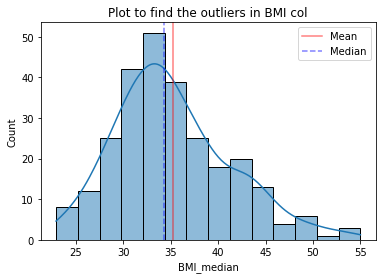

In [177]:
#Finding the frequency distribution of BMI_median column
sns.histplot(data=df_diabetic_new['BMI_median'],kde=True) 
plt.axvline(x=df_diabetic_new.BMI_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.BMI_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in BMI col') #Title of the plot
plt.show() #Displays the plot

Distribution plot of BMI_median

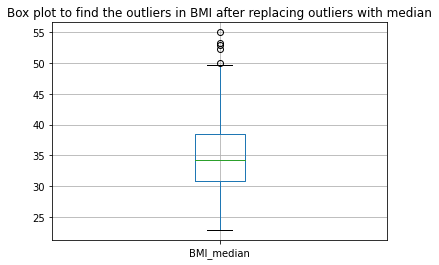

In [178]:
df_diabetic_new.boxplot('BMI_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in BMI after replacing outliers with median")
plt.show() #Displays the plot

From above box plot we can see that number of outliers are reduced in BMI_median.

In [179]:
Q1=np.percentile(df_diabetic_new['BMI'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_diabetic_new['BMI'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_diabetic_new['BMI'],75,interpolation='midpoint') #Third Quartile

In [180]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_diabetic_new['BMI']: #iterates through BMI column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the BMI column is ',outlier)

Interquartile range is  7.950000000000003
low_limit is  18.974999999999994
up_limit is  50.775000000000006
outlier in the BMI column is  [53.2, 55.0, 67.1, 52.3, 52.9, 59.4]


In [181]:
df_diabetic_new['BMI_iqr']=np.where(df_diabetic_new['BMI']>up_lim,up_lim,df_diabetic_new['BMI']) #Replace the outliers with upper limit 

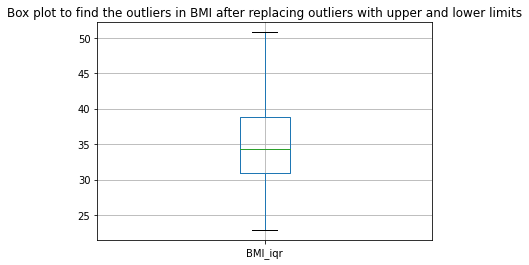

In [182]:
df_diabetic_new.boxplot('BMI_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in BMI after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

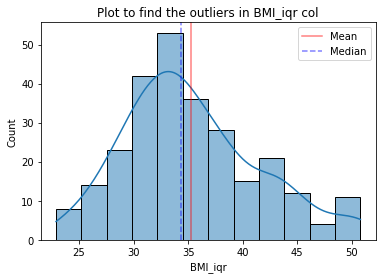

In [183]:
#Finding the frequency distribution of BMI_iqr column
sns.histplot(data=df_diabetic_new['BMI_iqr'],kde=True) 
plt.axvline(x=df_diabetic_new.BMI_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.BMI_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in BMI_iqr col') #Title of the plot
plt.show() #Displays the plot

In [184]:
df_diabetic_new.BMI_median.skew()

0.6269236303020985

In [185]:
df_diabetic_new.BMI_iqr.skew()

0.5497626619255932

From above boxplot we can see that the outliers have been handled completely in BMI_median thus can be used for further analysis.

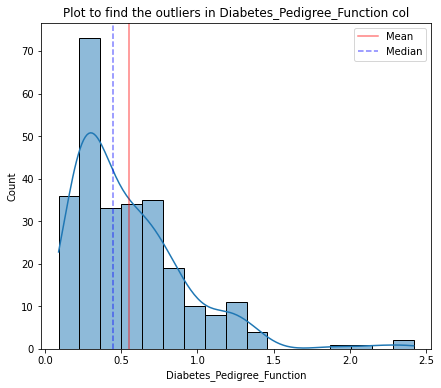

In [186]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Diabetes_Pedigree_Function
sns.histplot(data=df_diabetic_new['Diabetes_Pedigree_Function'],kde=True) 
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Diabetes_Pedigree_Function col') #Title of the plot
plt.show() #Displays the plot

The long tail indicates that Diabetes_Pedigree_Function is right skewed.

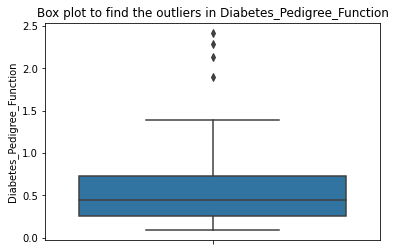

In [187]:
sns.boxplot(y=df_diabetic_new['Diabetes_Pedigree_Function']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Diabetes_Pedigree_Function")
plt.show() #Displays the plot

Above boxplot shows the outliers in Diabetes_Pedigree_Function.

In [188]:
z=np.abs(stats.zscore(df_diabetic_new['Diabetes_Pedigree_Function'])) #Finds Z score
print(z)

1      0.327097
3      4.667392
5      0.811693
7      1.053417
8      0.854666
         ...   
754    1.361140
756    0.784835
758    0.731118
760    0.395390
765    0.540424
Name: Diabetes_Pedigree_Function, Length: 267, dtype: float64


In [189]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper thresho

(array([  1,  22, 141, 169]),)


Above indices are having outliers greater than upper threshold

In [190]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [191]:
df_diabetic_new['Diabetes_Pedigree_Function_median']=np.where(z>3,df_diabetic_new['Diabetes_Pedigree_Function'].median(),df_diabetic_new['Diabetes_Pedigree_Function']) #Replacing the outliers with median and create column Diabetes_Pedigree_Function_median

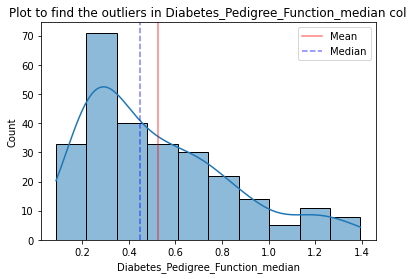

In [192]:
#Finding the frequency distribution of Diabetes_Pedigree_Function_median column
sns.histplot(data=df_diabetic_new['Diabetes_Pedigree_Function_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Diabetes_Pedigree_Function_median col') #Title of the plot
plt.show() #Displays the plot


The above plot shows the distribution of Diabetes_Pedigree_Function_median.

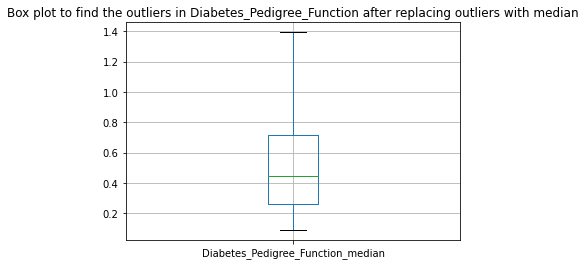

In [193]:
df_diabetic_new.boxplot('Diabetes_Pedigree_Function_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Diabetes_Pedigree_Function after replacing outliers with median")
plt.show() #Displays the plot

Above Box plot shows the outliers in Diabetes_Pedigree_Function after replacing outliers with median.

In [194]:
Q1=np.percentile(df_diabetic_new['Diabetes_Pedigree_Function'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_diabetic_new['Diabetes_Pedigree_Function'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_diabetic_new['Diabetes_Pedigree_Function'],75,interpolation='midpoint') #Third Quartile

In [195]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_diabetic_new['Diabetes_Pedigree_Function']: #iterates through 'Diabetes_Pedigree_Function column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Diabetes_Pedigree_Function column is ',outlier)

Interquartile range is  0.46699999999999997
low_limit is  -0.4384999999999999
up_limit is  1.4295
outlier in the Diabetes_Pedigree_Function column is  [2.288, 1.893, 2.137, 2.42]


In [196]:
df_diabetic_new['Diabetes_Pedigree_Function_iqr']=np.where(df_diabetic_new['Diabetes_Pedigree_Function']>up_lim,up_lim,df_diabetic_new['Diabetes_Pedigree_Function']) #Replace the outliers with upper limit 

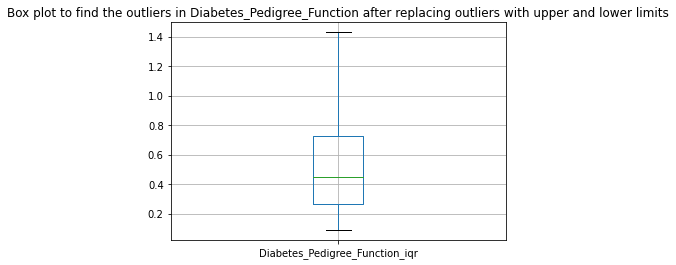

In [197]:
df_diabetic_new.boxplot('Diabetes_Pedigree_Function_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Diabetes_Pedigree_Function after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

Above boxplot shows that outliers are handled successfully in Diabetes_Pedigree_Function_iqr.

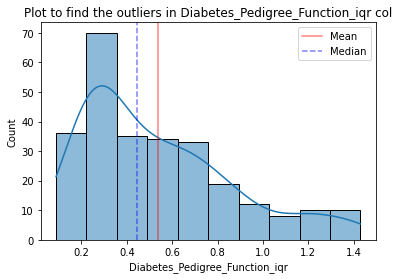

In [198]:
#Finding the frequency distribution of Diabetes_Pedigree_Function_iqr column
sns.histplot(data=df_diabetic_new['Diabetes_Pedigree_Function_iqr'],kde=True) 
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Diabetes_Pedigree_Function_iqr col') #Title of the plot
plt.show() #Displays the plot

In [199]:
df_diabetic_new.Diabetes_Pedigree_Function_median.skew()

0.9186800245125076

In [200]:
df_diabetic_new.Diabetes_Pedigree_Function_iqr.skew()

0.9466431427345878

From above plots and observations we can see that Diabetes_Pedigree_Function_median treated outliers in a better way and thus can be used in futher analysis.

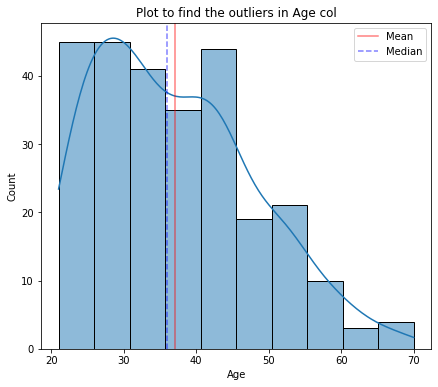

In [201]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Age
sns.histplot(data=df_diabetic_new['Age'],kde=True) 
plt.axvline(x=df_diabetic_new.Age.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Age.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Age col') #Title of the plot
plt.show() #Displays the plot

Above plot shows that the distribution of Age is right skewed.

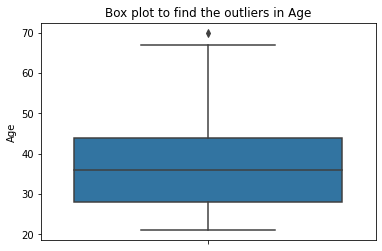

In [202]:
sns.boxplot(y=df_diabetic_new['Age']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age")
plt.show() #Displays the plot

From above boxplot we can find the outliers in Age.

In [203]:
z=np.abs(stats.zscore(df_diabetic_new['Age'])) #Finds Z score
print(z)

1      0.458769
3      0.367357
5      1.007237
7      1.460871
8      1.552282
         ...   
754    0.001712
756    1.369459
758    2.649219
760    0.546757
765    0.912402
Name: Age, Length: 267, dtype: float64


In [204]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([228]),)


Above indices are having outliers greater than upper threshold.

In [205]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [206]:
df_diabetic_new['Age_median']=np.where(z>3,df_diabetic_new['Age'].median(),df_diabetic_new['Age']) #Replacing the outliers with median and create column Age_median

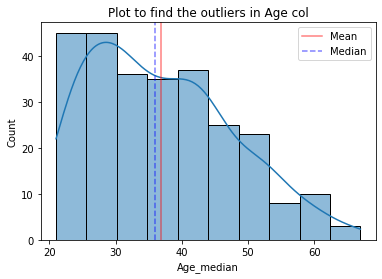

In [207]:
#Finding the frequency distribution of Blood_Pressure_median column
sns.histplot(data=df_diabetic_new['Age_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Age_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Age_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Age col') #Title of the plot
plt.show() #Displays the plot

Above plot shows the frequency distribution of Age_median.

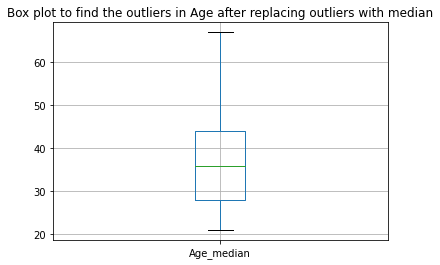

In [208]:
df_diabetic_new.boxplot('Age_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age after replacing outliers with median")
plt.show() #Displays the plot

From above plot we can see that outliers are handled in Age_median.

In [209]:
Q1=np.percentile(df_diabetic_new['Age'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_diabetic_new['Age'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_diabetic_new['Age'],75,interpolation='midpoint') #Third Quartile

In [210]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_diabetic_new['Age']: #iterates through Age column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Age column is ',outlier)

Interquartile range is  16.0
low_limit is  4.0
up_limit is  68.0
outlier in the Age column is  [70.0]


In [211]:
df_diabetic_new['Age_iqr']=np.where(df_diabetic_new['Age']>up_lim,up_lim,df_diabetic_new['Age']) #Replace the outliers with upper limit 

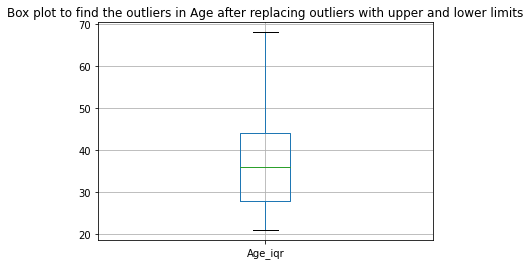

In [212]:
df_diabetic_new.boxplot('Age_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

Above boxplot shows that the outliers have been completely handled in Age_iqr.

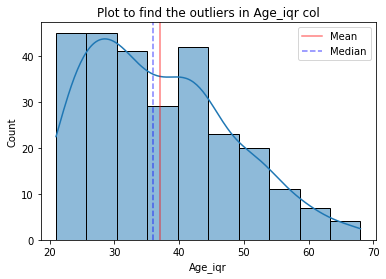

In [213]:
#Finding the frequency distribution of Blood_Pressure_iqr column
sns.histplot(data=df_diabetic_new['Age_iqr'],kde=True) 
plt.axvline(x=df_diabetic_new.Age_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Age_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Age_iqr col') #Title of the plot
plt.show() #Displays the plot

In [214]:
df_diabetic_new.Age_median.skew()

0.550969566308604

In [215]:
df_diabetic_new.Age_iqr.skew()

0.5801659127779532

From above plots and observations we can see that Age_median treated outliers in a better way and thus can be used in futher analysis.


### Dealing with Outliers in df_non_diabetic


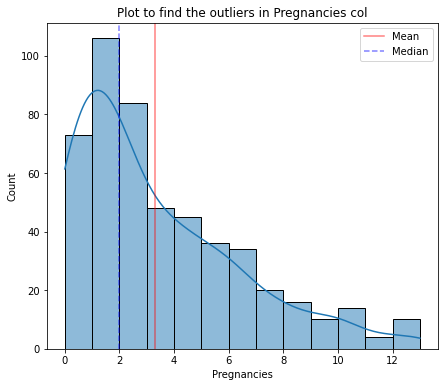

In [216]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Pregnancies
sns.histplot(data=df_non_diabetic_knn['Pregnancies'],kde=True) 
plt.axvline(x=df_non_diabetic_knn.Pregnancies.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_knn.Pregnancies.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Pregnancies col') #Title of the plot
plt.show() #Displays the plot

Above plot shows distribution is right skewed and there are outliers

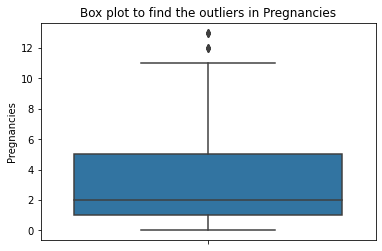

In [217]:
sns.boxplot(y=df_non_diabetic_knn['Pregnancies']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Pregnancies")
plt.show() #Displays the plot

From above plot there are outliers above the upper whisker

In [218]:
from scipy import stats #Imports stats from scipy library
z=np.abs(stats.zscore(df_non_diabetic_knn['Pregnancies'])) #Finds Z score
print(z)

0      0.762400
2      0.762400
4      0.564667
6      2.223501
9      0.232900
         ...   
761    1.891734
762    2.223501
763    0.430633
764    0.564667
766    0.762400
Name: Pregnancies, Length: 500, dtype: float64


In [219]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([ 10,  52, 170, 331, 487]),)


From above output there are outliers in the mentioned index values

In [220]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [221]:
df_non_diabetic_new=df_non_diabetic_knn.copy(deep=True) #Making a copy of df_non_diabetic_knn to preserve the original dataframe

In [222]:
df_non_diabetic_new.head(2) #Gives first 2 records

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
0,1.0,85.0,66.0,29.0,62.914766,26.6,0.351,31.0
2,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0


In [223]:
df_non_diabetic_new['Pregnancies_median']=np.where(z>3,df_non_diabetic_new['Pregnancies'].median(),df_non_diabetic_new['Pregnancies']) #Replacing the outliers with median and create column Pregnancies_median


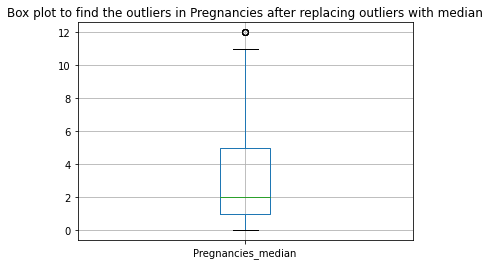

In [224]:
df_non_diabetic_new.boxplot('Pregnancies_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Pregnancies after replacing outliers with median")
plt.show() #Displays the plot

From above plot we can see that the number of outliers have been reduced in Pregnancies_median


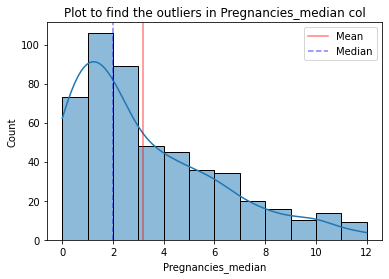

In [225]:
#Finding the frequency with the median replace Pregnancies column
sns.histplot(data=df_non_diabetic_new['Pregnancies_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Pregnancies_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Pregnancies_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend()
plt.title('Plot to find the outliers in Pregnancies_median col') #Title of the plot
plt.show() #Displays the plot

The distribution of Pregnancies_median is right skewed.

In [226]:
Q1=np.percentile(df_non_diabetic_new['Pregnancies'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['Pregnancies'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['Pregnancies'],75,interpolation='midpoint') #Third Quartile

In [227]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['Pregnancies']: #iterates through Pregnancies column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Pregnancies column is ',outlier)

Interquartile range is  4.0
low_limit is  -5.0
up_limit is  11.0
outlier in the Pregnancies column is  [13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 13.0, 12.0, 13.0, 12.0]


In [228]:
df_non_diabetic_new['Pregnancies_iqr']=np.where(df_non_diabetic_new['Pregnancies']>up_lim,up_lim,df_non_diabetic_new['Pregnancies']) #Replace the outliers with upper limit 

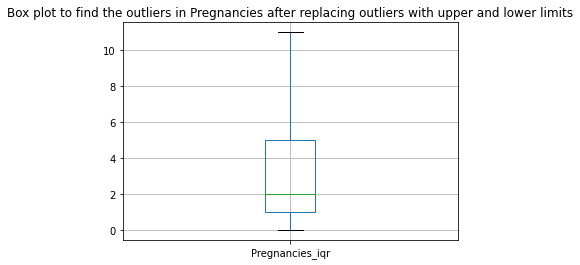

In [229]:
df_non_diabetic_new.boxplot('Pregnancies_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Pregnancies after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

Above plot shows that the outliers have been handled in Pregnancies_iqr

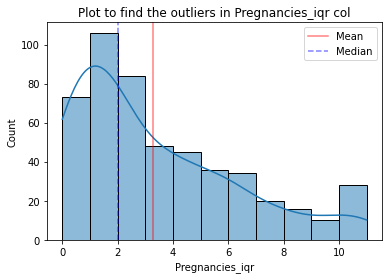

In [230]:
#Finding the frequency with the median replace Pregnancies column
sns.histplot(data=df_non_diabetic_new['Pregnancies_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Pregnancies_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Pregnancies_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend()
plt.title('Plot to find the outliers in Pregnancies_iqr col') #Title of the plot
plt.show() #Displays the plot

Above plot shows that the outliers are not treated well in Pregnancies_iqr and thus will be used for further analysis

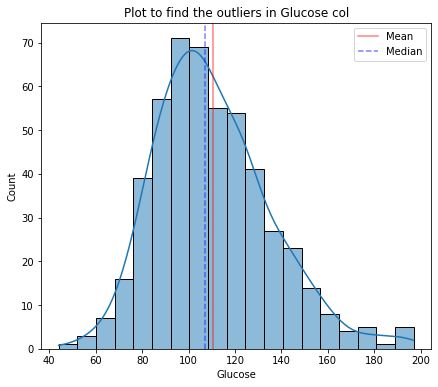

In [231]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Glucose
sns.histplot(data=df_non_diabetic_new['Glucose'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Glucose.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Glucose.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Glucose col') #Title of the plot
plt.show() #Displays the plot

The above shows the frequency distribution of Glucose. As mean>median it is right skewed.

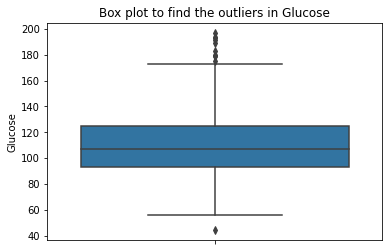

In [232]:
sns.boxplot(y=df_non_diabetic_new['Glucose']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Glucose")
plt.show() #Displays the plot

In [233]:
z=np.abs(stats.zscore(df_non_diabetic_new['Glucose'])) #Finds Z score
print(z)

0      1.029526
2      0.867965
4      0.222577
6      0.182187
9      0.019766
         ...   
761    0.867965
762    0.383279
763    0.464920
764    0.424529
766    0.706403
Name: Glucose, Length: 500, dtype: float64


In [234]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold


(array([141, 160, 161, 309, 354]),)


Above indices are having outliers greater than upper threshold

In [235]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [236]:
df_non_diabetic_new['Glucose_median']=np.where(z>3,df_non_diabetic_new['Glucose'].median(),df_non_diabetic_new['Glucose']) #Replacing the outliers with median and create column Glucose_median

In [237]:
df_non_diabetic_new['Glucose_median']=np.where(z<-3,df_non_diabetic_new['Glucose'].median(),df_non_diabetic_new['Glucose']) #Replacing the outliers with median and create column Glucose_median

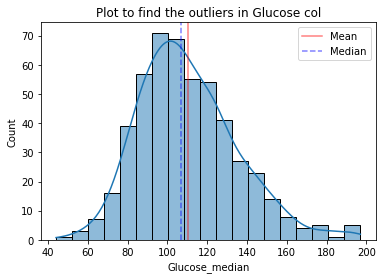

In [238]:
#Finding the frequency distribution of Glucose_median column
sns.histplot(data=df_non_diabetic_new['Glucose_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Glucose_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Glucose_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Glucose col') #Title of the plot
plt.show() #Displays the plot


Above plot shows the frequency distribution of Glucose_median which is normal.

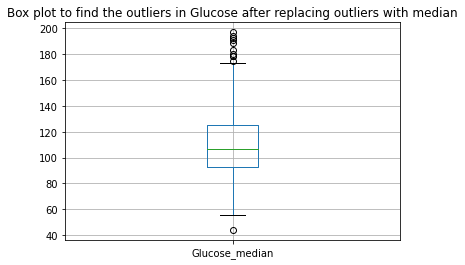

In [239]:
df_non_diabetic_new.boxplot('Glucose_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Glucose after replacing outliers with median")
plt.show() #Displays the plot

From above boxplot we can see that outliers are handled well in Glucose_median.

In [240]:
Q1=np.percentile(df_non_diabetic_new['Glucose'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['Glucose'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['Glucose'],75,interpolation='midpoint') #Third Quartile


In [241]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['Glucose']: #iterates through Glucose column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Glucose column is ',outlier)

Interquartile range is  32.0
low_limit is  45.0
up_limit is  173.0
outlier in the Glucose column is  [180.0, 44.0, 179.0, 197.0, 193.0, 191.0, 179.0, 194.0, 189.0, 183.0, 175.0]


There are outliers both above up_limit and below low_limit.

In [242]:
df_non_diabetic_new['Glucose_iqr']=np.where(df_non_diabetic_new['Glucose']>up_lim,up_lim,df_non_diabetic_new['Glucose']) #Replace the outliers with upper limit

In [243]:
df_non_diabetic_new['Glucose_iqr']=np.where(df_non_diabetic_new['Glucose']<low_lim,low_lim,df_non_diabetic_new['Glucose']) #Replace the outliers with lower limit 


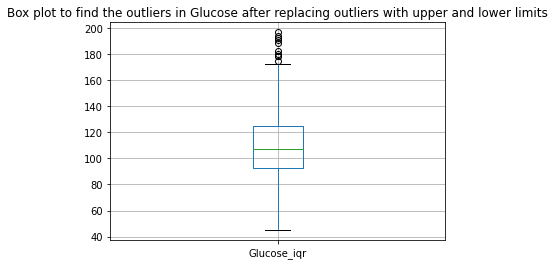

In [244]:
df_non_diabetic_new.boxplot('Glucose_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Glucose after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

Above plot shows that the outliers are not treated well in Glucose_iqr.


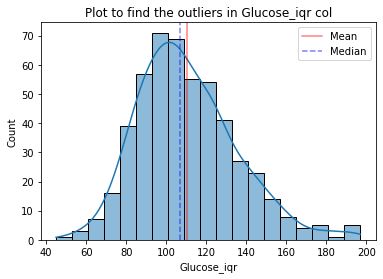

In [245]:
#Finding the frequency distribution of Glucose_iqr column
sns.histplot(data=df_non_diabetic_new['Glucose_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Glucose_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Glucose_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Glucose_iqr col') #Title of the plot
plt.show() #Displays the plot

Above plot ahows Glucose_iqr is normally distributed.

In [246]:
df_non_diabetic_new.Glucose_median.skew()

0.662317323871778

In [247]:
df_non_diabetic_new.Glucose_iqr.skew()

0.6642301869019396

Glucose_iqr has treated outliers in a better way. Thus will be used for further analysis.

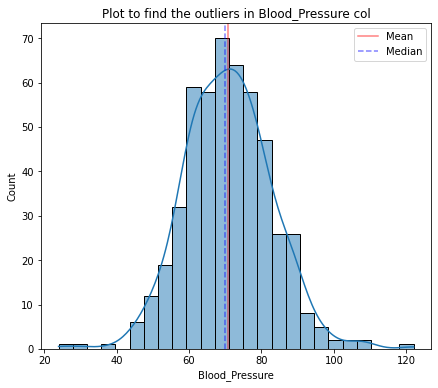

In [248]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Blood_Pressure
sns.histplot(data=df_non_diabetic_new['Blood_Pressure'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Blood_Pressure.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Blood_Pressure.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Blood_Pressure col') #Title of the plot
plt.show() #Displays the plot

Blood_Pressure is normally distributed.

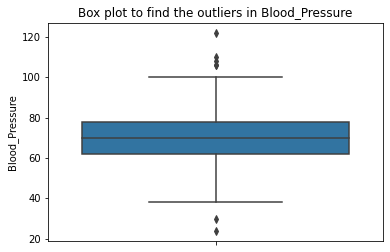

In [249]:
sns.boxplot(y=df_non_diabetic_new['Blood_Pressure']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Blood_Pressure")
plt.show() #Displays the plot

Above boxplot shows that there are outliers in Blood_Pressure.

In [250]:
z=np.abs(stats.zscore(df_non_diabetic_new['Blood_Pressure'])) #Finds Z score
print(z)

0      0.400533
2      0.400533
4      0.263958
6      0.425578
9      1.759064
         ...   
761    0.732779
762    0.430081
763    0.068288
764    0.097835
766    0.068288
Name: Blood_Pressure, Length: 500, dtype: float64


In [251]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([  6,  68, 223, 354, 390]),)


Above indices are having outliers greater than upper threshold

In [252]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [253]:
df_non_diabetic_new['Blood_Pressure_median']=np.where(z>3,df_non_diabetic_new['Blood_Pressure'].median(),df_non_diabetic_new['Blood_Pressure']) #Replacing the outliers with median and create column Blood_Pressure_median

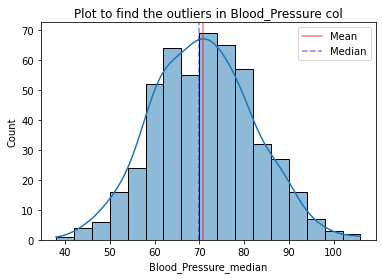

In [254]:
#Finding the frequency distribution of Blood_Pressure_median column
sns.histplot(data=df_non_diabetic_new['Blood_Pressure_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Blood_Pressure_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Blood_Pressure_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Blood_Pressure col') #Title of the plot
plt.show() #Displays the plot

Above plot shows the frequency distribution of Blood_Pressure_median which is normal.

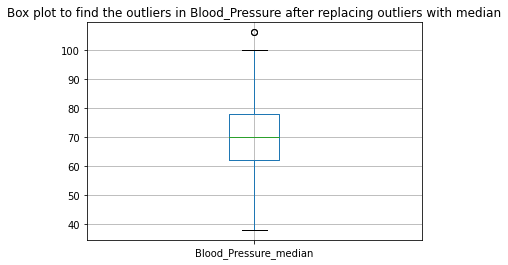

In [255]:
df_non_diabetic_new.boxplot('Blood_Pressure_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Blood_Pressure after replacing outliers with median")
plt.show() #Displays the plot

From above boxplot we can see that outliers are handled well in Blood_Pressure_median.

In [256]:
Q1=np.percentile(df_non_diabetic_new['Blood_Pressure'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['Blood_Pressure'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['Blood_Pressure'],75,interpolation='midpoint') #Third Quartile

In [257]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['Blood_Pressure']: #iterates through Blood_Pressure column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Blood_Pressure column is ',outlier)

Interquartile range is  16.0
low_limit is  38.0
up_limit is  102.0
outlier in the Blood_Pressure column is  [30.0, 122.0, 108.0, 110.0, 24.0, 106.0, 106.0]


There are outliers both above up_limit and below low_limit.

In [258]:
df_non_diabetic_new['Blood_Pressure_iqr']=np.where(df_non_diabetic_new['Blood_Pressure']>up_lim,up_lim,df_non_diabetic_new['Blood_Pressure']) #Replace the outliers with upper limit 


In [259]:
df_non_diabetic_new['Blood_Pressure_iqr']=np.where(df_non_diabetic_new['Blood_Pressure']<low_lim,low_lim,df_non_diabetic_new['Blood_Pressure']) #Replace the outliers with lower limit 


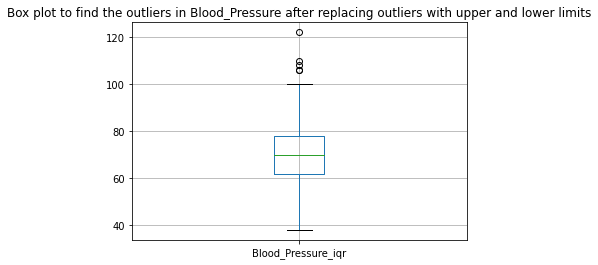

In [260]:
df_non_diabetic_new.boxplot('Blood_Pressure_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Blood_Pressure after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

From above plot we can see that Blood_Pressure_median handled the outliers well so will be used for further analysis.

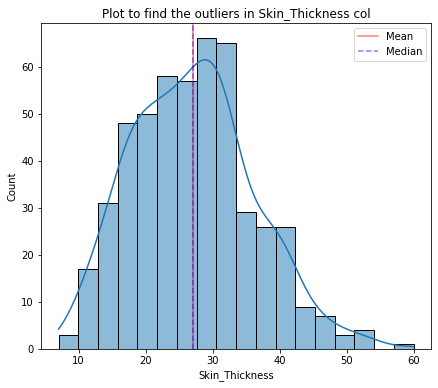

In [261]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Skin_Thickness
sns.histplot(data=df_non_diabetic_new['Skin_Thickness'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Skin_Thickness.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Skin_Thickness.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Skin_Thickness col') #Title of the plot
plt.show() #Displays the plot

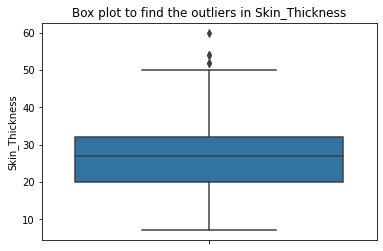

In [262]:
sns.boxplot(y=df_non_diabetic_new['Skin_Thickness']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Skin_Thickness")
plt.show() #Displays the plot

From above plot it is clear that there are outliers above the upper threshold

In [263]:
z=np.abs(stats.zscore(df_non_diabetic_new['Skin_Thickness'])) #Finds Z score
print(z)

0      0.215184
2      0.443499
4      0.779475
6      0.799354
9      0.379007
         ...   
761    0.762517
762    2.301015
763    0.004377
764    0.443499
766    0.434745
Name: Skin_Thickness, Length: 500, dtype: float64


In [264]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([30]),)


In [265]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [266]:
df_non_diabetic_new['Skin_Thickness_median']=np.where(z>3,df_non_diabetic_new['Skin_Thickness'].median(),df_non_diabetic_new['Skin_Thickness']) #Replacing the outliers with median and create column Skin_Thickness_median


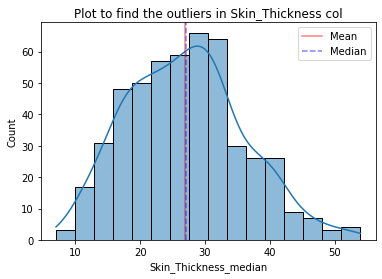

In [267]:
#Finding the frequency distribution of Skin_Thickness_median column
sns.histplot(data=df_non_diabetic_new['Skin_Thickness_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Skin_Thickness_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Skin_Thickness_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Skin_Thickness col') #Title of the plot
plt.show() #Displays the plot

Frequency distribution of Skin_Thickness_median.

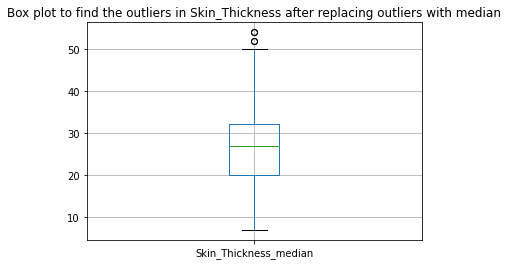

In [268]:
df_non_diabetic_new.boxplot('Skin_Thickness_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Skin_Thickness after replacing outliers with median")
plt.show() #Displays the plot

Above plot shows that there are outliers in Skin_Thickness_median.

In [269]:
Q1=np.percentile(df_non_diabetic_new['Skin_Thickness'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['Skin_Thickness'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['Skin_Thickness'],75,interpolation='midpoint') #Third Quartile

In [270]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['Skin_Thickness']: #iterates through Skin_Thickness column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Skin_Thickness column is ',outlier)

Interquartile range is  12.139810632112884
low_limit is  1.7902840518306746
up_limit is  50.34952658028221
outlier in the Skin_Thickness column is  [60.0, 54.0, 54.0, 52.0, 52.0]


In [271]:
df_non_diabetic_new['Skin_Thickness_iqr']=np.where(df_non_diabetic_new['Skin_Thickness']>up_lim,up_lim,df_non_diabetic_new['Skin_Thickness']) #Replace the outliers with upper limit 


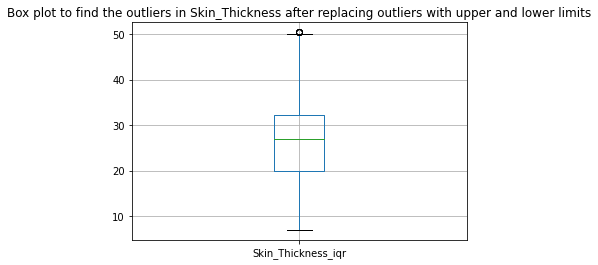

In [272]:
df_non_diabetic_new.boxplot('Skin_Thickness_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Skin_Thickness after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

From above plots and observations we can see that Skin_Thickness_iqr treated outliers in a better way and thus can be used in futher analysis.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


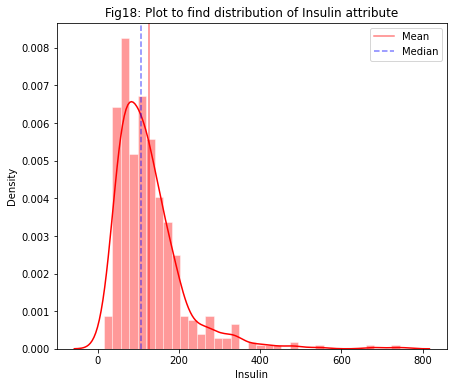

In [273]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Insulin column
sns.distplot(a=df_non_diabetic_new.Insulin, color='red', hist_kws={"edgecolor": 'white'}) 
plt.axvline(x=df_non_diabetic_new.Insulin.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Insulin.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Fig18: Plot to find distribution of Insulin attribute') #Title of the plot
plt.show() #Displays the plot

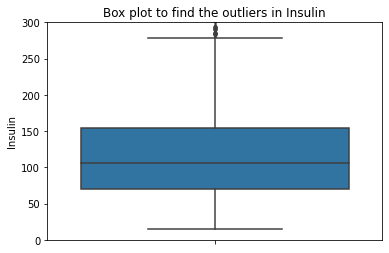

In [274]:
sns.boxplot(y=df_non_diabetic_new['Insulin']) #Boxplot to find the outliers
plt.ylim(0, 300)
plt.title("Box plot to find the outliers in Insulin")
plt.show() #Displays the plot

From above plots we can see that there are outliers which have to be handled

In [275]:
z=np.abs(stats.zscore(df_non_diabetic_new['Insulin'])) #Finds Z score
print(z)

0      0.738930
2      0.369956
4      0.224818
6      0.058447
9      0.095553
         ...   
761    1.020010
762    0.650842
763    0.326511
764    0.156301
766    0.623352
Name: Insulin, Length: 500, dtype: float64


In [276]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([ 99, 141, 151, 152, 178, 243, 306, 425, 464]),)


Above indices are having outliers greater than upper threshold.

In [277]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [278]:
df_non_diabetic_new['Insulin_median']=np.where(z>3,df_non_diabetic_new['Insulin'].median(),df_non_diabetic_new['Insulin']) #Replacing the outliers with median and create column Insulin_median


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


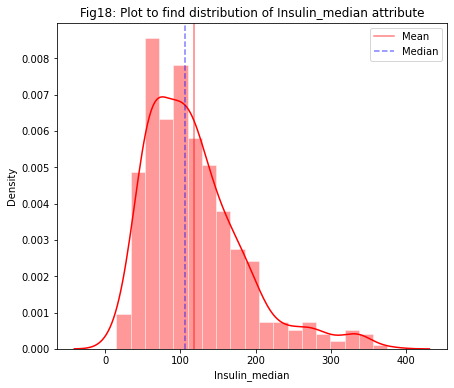

In [279]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Insulin column
sns.distplot(a=df_non_diabetic_new.Insulin_median, color='red', hist_kws={"edgecolor": 'white'}) 
plt.axvline(x=df_non_diabetic_new.Insulin_median.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Insulin_median.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Fig18: Plot to find distribution of Insulin_median attribute') #Title of the plot
plt.show() #Displays the plot

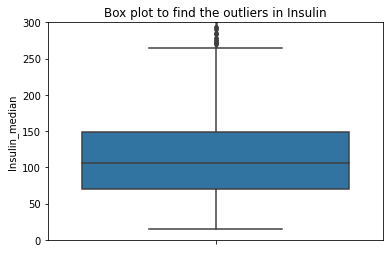

In [280]:
sns.boxplot(y=df_non_diabetic_new['Insulin_median']) #Boxplot to find the outliers
plt.ylim(0, 300)
plt.title("Box plot to find the outliers in Insulin")
plt.show() #Displays the plot

Above plot shows that there are outliers in Insulin column

In [281]:
Q1=np.percentile(df_non_diabetic_new['Insulin'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['Insulin'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['Insulin'],75,interpolation='midpoint') #Third Quartile

In [282]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['Insulin']: #iterates through Insulin column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Insulin column is ',outlier)

Interquartile range is  84.57965053525902
low_limit is  -56.86947580288853
up_limit is  281.44912633814755
outlier in the Insulin column is  [342.0, 325.0, 284.0, 485.0, 285.0, 341.549525556983, 744.0, 680.0, 402.0, 375.0, 545.0, 293.0, 415.0, 310.0, 302.87287105788, 480.0, 326.0, 337.4624367490028, 330.0, 334.8653205350543, 440.0, 339.30430511655675, 335.0, 387.0, 291.0]


In [283]:
df_non_diabetic_new['Insulin_iqr']=np.where(df_non_diabetic_new['Insulin']>up_lim,up_lim,df_non_diabetic_new['Insulin']) #Replace the outliers with upper limit 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


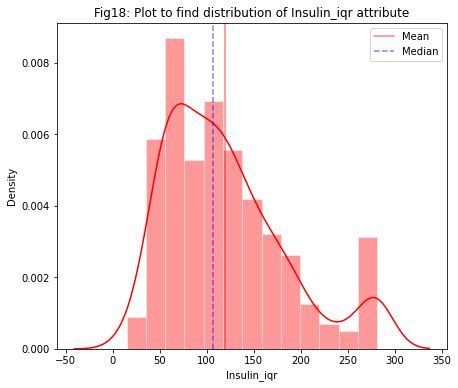

In [284]:
#Finding the frequency distribution of Insulin_iqr column
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
sns.distplot(a=df_non_diabetic_new.Insulin_iqr, color='red', hist_kws={"edgecolor": 'white'}) 
plt.axvline(x=df_non_diabetic_new.Insulin_iqr.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Insulin_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Fig18: Plot to find distribution of Insulin_iqr attribute') #Title of the plot
plt.show() #Displays the plot


Above plot shows the distribution of Insulin_iqr.


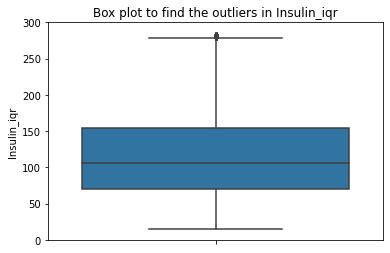

In [285]:
sns.boxplot(y=df_non_diabetic_new['Insulin_iqr']) #Boxplot to find the outliers
plt.ylim(0, 300)
plt.title("Box plot to find the outliers in Insulin_iqr")
plt.show() #Displays the plot

From above plot we can see that insulin_iqr handled the outliers well so will be used for further analysis.

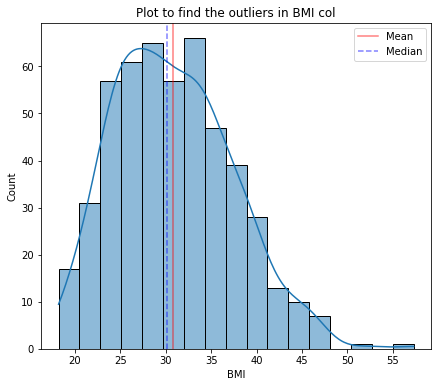

In [286]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for BMI
sns.histplot(data=df_non_diabetic_new['BMI'],kde=True) 
plt.axvline(x=df_non_diabetic_new.BMI.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.BMI.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in BMI col') #Title of the plot
plt.show() #Displays the plot

Above plot shows BMI is right skewed.

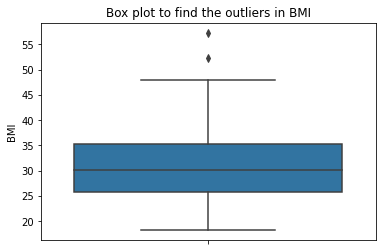

In [287]:
sns.boxplot(y=df_non_diabetic_new['BMI']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in BMI")
plt.show() #Displays the plot

Above boxplot shows the outliers in BMI.

In [288]:
z=np.abs(stats.zscore(df_non_diabetic_new['BMI'])) #Finds Z score
print(z)

0      0.651375
2      0.420671
4      0.805178
6      0.686708
9      1.040454
         ...   
761    1.281966
762    0.317582
763    0.917412
764    0.712896
766    0.066925
Name: BMI, Length: 500, dtype: float64


In [289]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([151, 442]),)


Above indices are having outliers greater than upper threshold.

In [290]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [291]:
df_non_diabetic_new['BMI_median']=np.where(z>3,df_non_diabetic_new['BMI'].median(),df_non_diabetic_new['BMI']) #Replacing the outliers with median and create column BMI_median


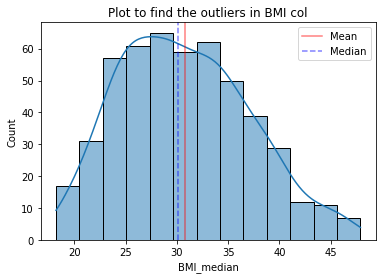

In [292]:
#Finding the frequency distribution of BMI_median column
sns.histplot(data=df_non_diabetic_new['BMI_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.BMI_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.BMI_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in BMI col') #Title of the plot
plt.show() #Displays the plot

Distribution plot of BMI_median

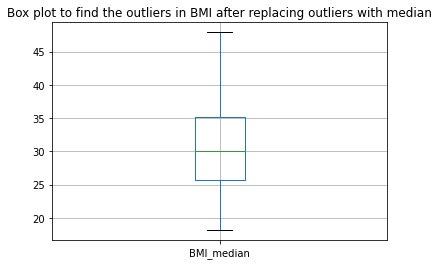

In [293]:
df_non_diabetic_new.boxplot('BMI_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in BMI after replacing outliers with median")
plt.show() #Displays the plot

Above plot shows there are no outliers in BMI_median

In [294]:
Q1=np.percentile(df_non_diabetic_new['BMI'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['BMI'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['BMI'],75,interpolation='midpoint') #Third Quartile


In [295]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['BMI']: #iterates through BMI column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the BMI column is ',outlier)

Interquartile range is  9.599999999999994
low_limit is  11.300000000000011
up_limit is  49.69999999999999
outlier in the BMI column is  [52.3, 57.3]


In [296]:
df_non_diabetic_new['BMI_iqr']=np.where(df_non_diabetic_new['BMI']>up_lim,up_lim,df_non_diabetic_new['BMI']) #Replace the outliers with upper limit 

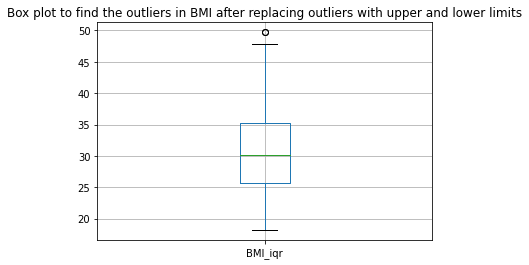

In [297]:
df_non_diabetic_new.boxplot('BMI_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in BMI after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

From above plots it is clear that BMI_median has completely dealt with outliers and so will be used for further analysis.

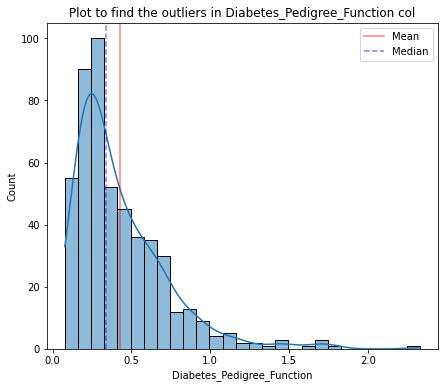

In [298]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Diabetes_Pedigree_Function
sns.histplot(data=df_non_diabetic_new['Diabetes_Pedigree_Function'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Diabetes_Pedigree_Function.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Diabetes_Pedigree_Function.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Diabetes_Pedigree_Function col') #Title of the plot
plt.show() #Displays the plot

The long tail indicates that Diabetes_Pedigree_Function is right skewed.

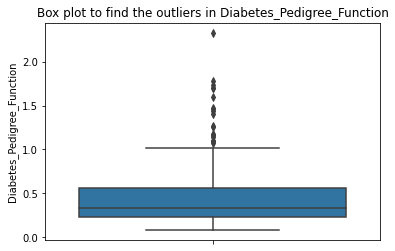

In [299]:
sns.boxplot(y=df_non_diabetic_new['Diabetes_Pedigree_Function']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Diabetes_Pedigree_Function")
plt.show() #Displays the plot


Above boxplot shows the outliers in Diabetes_Pedigree_Function.

In [300]:
z=np.abs(stats.zscore(df_non_diabetic_new['Diabetes_Pedigree_Function'])) #Finds Z score
print(z)

0      0.263513
2      0.879338
4      0.765544
6      0.989785
9      0.799013
         ...   
761    0.963010
762    0.865951
763    0.300329
764    0.618282
766    0.384000
Name: Diabetes_Pedigree_Function, Length: 500, dtype: float64


In [301]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper thresho

(array([  5,  31,  94, 141, 201, 228, 245, 387, 405, 406]),)


Above indices are having outliers greater than upper threshold

In [302]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [303]:
df_non_diabetic_new['Diabetes_Pedigree_Function_median']=np.where(z>3,df_non_diabetic_new['Diabetes_Pedigree_Function'].median(),df_non_diabetic_new['Diabetes_Pedigree_Function']) #Replacing the outliers with median and create column Diabetes_Pedigree_Function_median


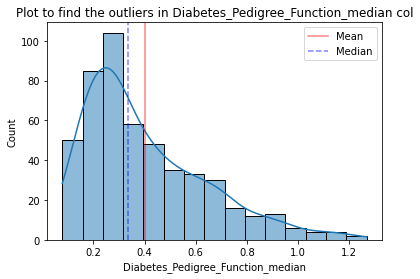

In [304]:
#Finding the frequency distribution of Diabetes_Pedigree_Function_median column
sns.histplot(data=df_non_diabetic_new['Diabetes_Pedigree_Function_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Diabetes_Pedigree_Function_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Diabetes_Pedigree_Function_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Diabetes_Pedigree_Function_median col') #Title of the plot
plt.show() #Displays the plot

The above plot shows the distribution of Diabetes_Pedigree_Function_median.

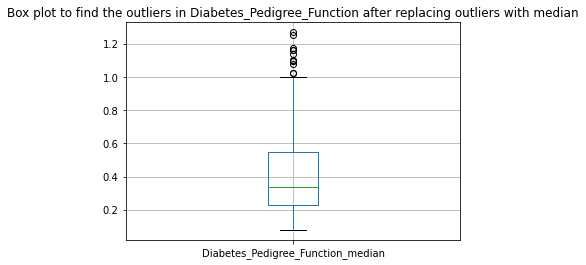

In [305]:
df_non_diabetic_new.boxplot('Diabetes_Pedigree_Function_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Diabetes_Pedigree_Function after replacing outliers with median")
plt.show() #Displays the plot

Above Box plot shows the outliers in Diabetes_Pedigree_Function after replacing outliers with median.

In [306]:
Q1=np.percentile(df_non_diabetic_new['Diabetes_Pedigree_Function'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['Diabetes_Pedigree_Function'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['Diabetes_Pedigree_Function'],75,interpolation='midpoint') #Third Quartile

In [307]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['Diabetes_Pedigree_Function']: #iterates through 'Diabetes_Pedigree_Function column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Diabetes_Pedigree_Function column is ',outlier)

Interquartile range is  0.33299999999999996
low_limit is  -0.2699999999999999
up_limit is  1.0619999999999998
outlier in the Diabetes_Pedigree_Function column is  [1.441, 1.781, 1.4, 2.329, 1.101, 1.476, 1.731, 1.268, 1.6, 1.076, 1.095, 1.138, 1.159, 1.251, 1.699, 1.698, 1.461, 1.162, 1.174, 1.096]


In [308]:
df_non_diabetic_new['Diabetes_Pedigree_Function_iqr']=np.where(df_non_diabetic_new['Diabetes_Pedigree_Function']>up_lim,up_lim,df_non_diabetic_new['Diabetes_Pedigree_Function']) #Replace the outliers with upper limit

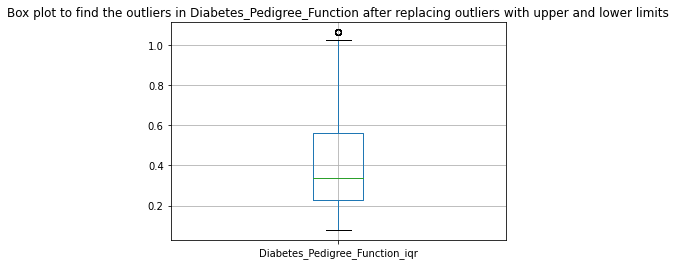

In [309]:
df_non_diabetic_new.boxplot('Diabetes_Pedigree_Function_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Diabetes_Pedigree_Function after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

From above plots it is clear that Diabetes_Pedigree_Function_iqr handled the outliers well and thus will be used for further analysis.

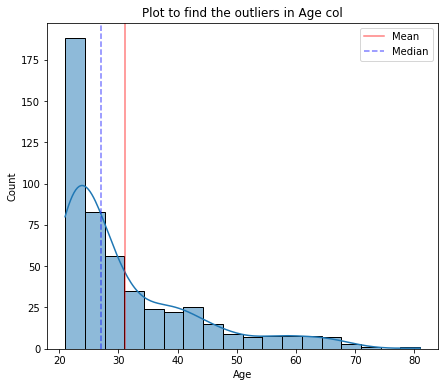

In [310]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Age
sns.histplot(data=df_non_diabetic_new['Age'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Age.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Age.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Age col') #Title of the plot
plt.show() #Displays the plot


Above plot shows that the distribution of Age is right skewed.

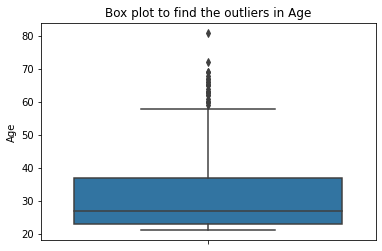

In [311]:
sns.boxplot(y=df_non_diabetic_new['Age']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age")
plt.show() #Displays the plot

From above boxplot we can find the outliers in Age.

In [312]:
z=np.abs(stats.zscore(df_non_diabetic_new['Age'])) #Finds Z score
print(z)

0      0.016301
2      0.874229
4      0.102094
6      0.187886
9      0.102094
         ...   
761    0.155285
762    2.729071
763    0.359472
764    0.102094
766    0.702644
Name: Age, Length: 500, dtype: float64


In [313]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold


(array([ 78, 280, 284, 309, 348, 443, 448]),)



Above indices are having outliers greater than upper threshold

In [314]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


In [315]:
df_non_diabetic_new['Age_median']=np.where(z>3,df_non_diabetic_new['Age'].median(),df_non_diabetic_new['Age']) #Replacing the outliers with median and create column Age_median

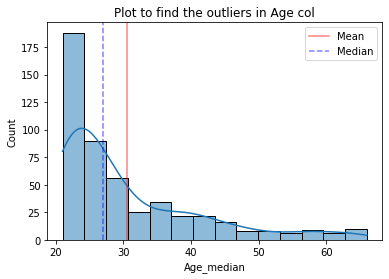

In [316]:
#Finding the frequency distribution of Blood_Pressure_median column
sns.histplot(data=df_non_diabetic_new['Age_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Age_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Age_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Age col') #Title of the plot
plt.show() #Displays the plot

Above plot shows the frequency distribution of Age_median.

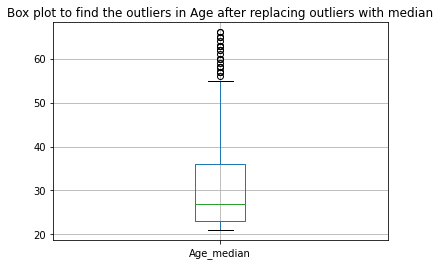

In [317]:
df_non_diabetic_new.boxplot('Age_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age after replacing outliers with median")
plt.show() #Displays the plot

In [318]:
Q1=np.percentile(df_non_diabetic_new['Age'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_non_diabetic_new['Age'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_non_diabetic_new['Age'],75,interpolation='midpoint') #Third Quartile

In [319]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_non_diabetic_new['Age']: #iterates through Age column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the Age column is ',outlier)

Interquartile range is  14.0
low_limit is  2.0
up_limit is  58.0
outlier in the Age column is  [60.0, 69.0, 65.0, 60.0, 61.0, 63.0, 65.0, 63.0, 65.0, 72.0, 62.0, 81.0, 59.0, 63.0, 67.0, 66.0, 64.0, 60.0, 67.0, 66.0, 62.0, 68.0, 69.0, 63.0]


In [320]:
df_non_diabetic_new['Age_iqr']=np.where(df_non_diabetic_new['Age']>up_lim,up_lim,df_non_diabetic_new['Age']) #Replace the outliers with upper limit 

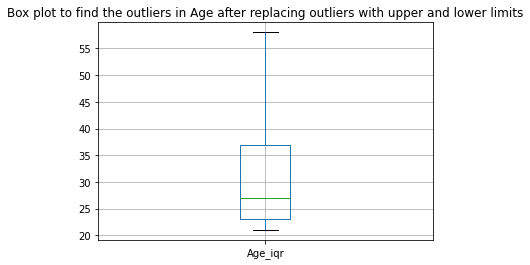

In [321]:
df_non_diabetic_new.boxplot('Age_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age after replacing outliers with upper and lower limits")
plt.show() #Displays the plot

From above plot we can see that Age_iqr has completely handled the outliers, thus will be used for further analysis.

### Skewness for df_diabetic

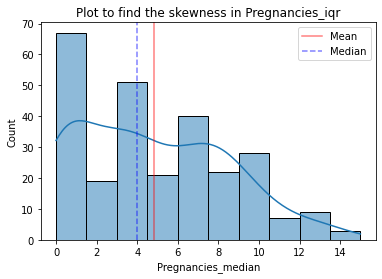

In [322]:
#Finding the frequency distribution of Pregnancies_median column
sns.histplot(data=df_diabetic_new['Pregnancies_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Pregnancies_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Pregnancies_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Pregnancies_iqr') #Title of the plot
plt.show() #Displays the plot

Pregnancies_median is right skewed as shown in above plot.

In [323]:
np.seterr(divide = 'ignore')  
df_diabetic_new['Pregnancies_log']=np.where(df_diabetic_new['Pregnancies_median']>0,np.log(df_diabetic_new['Pregnancies_median']),0) #Log transformation of Pregnancies_median

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


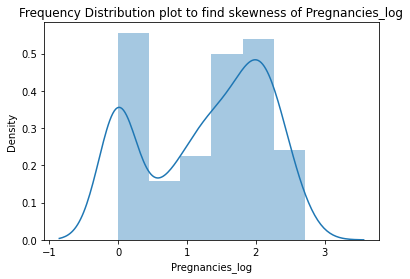

In [324]:
sns.distplot(df_diabetic_new['Pregnancies_log']) #Distribution plot to find skewness of Pregnancies_log
plt.title("Frequency Distribution plot to find skewness of Pregnancies_log")
plt.show() #Displays the plot

The distribution of Pregnancies seems to be better after log transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


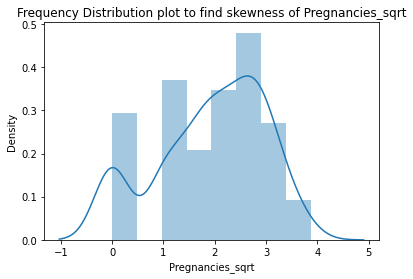

In [325]:
df_diabetic_new['Pregnancies_sqrt']=np.sqrt(df_diabetic_new['Pregnancies_median']) #Squareroot transformation
sns.distplot(df_diabetic_new['Pregnancies_sqrt']) #Distribution plot to find skewness of Pregnancies_sqrt
plt.title("Frequency Distribution plot to find skewness of Pregnancies_sqrt")
plt.show() #Displays the plot

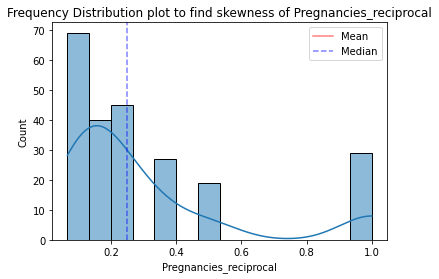

In [326]:
df_diabetic_new['Pregnancies_reciprocal'] = 1/df_diabetic_new['Pregnancies_median'] #Reciprocal transformation
sns.histplot(data=df_diabetic_new['Pregnancies_reciprocal'],kde=True) #Distribution plot to find skewness of pregnancies_reciprocal
plt.axvline(x=df_diabetic_new.Pregnancies_reciprocal.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Pregnancies_reciprocal.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Pregnancies_reciprocal")
plt.show() #Displays the plot

In [327]:
df_diabetic_new.Pregnancies_log.skew() #Measures the skewness

-0.35297604851697384

In [328]:
df_diabetic_new.Pregnancies_sqrt.skew() #Measures the skewness

-0.5031227541274929

In [329]:
df_diabetic_new.Pregnancies_reciprocal.skew()

nan

If data is normally distributed, skewness value ranges between -0.5 and 0.5. The above output shows  -0.3529 skewness for Pregnancies_log and -0.503 skewness for Pregnancies_sqrt. As Pregnancies_log has better skewness value, it will be used for further analysis.

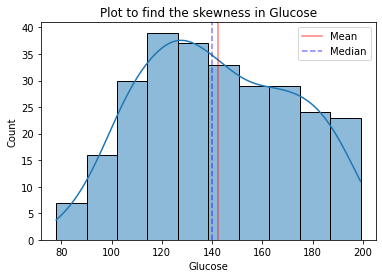

In [330]:
#Finding the frequency distribution of Glucose column
sns.histplot(data=df_diabetic_new['Glucose'],kde=True) 
plt.axvline(x=df_diabetic_new.Glucose.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Glucose.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Glucose') #Title of the plot
plt.show() #Displays the plot

From above plot we can see that Glucose is right skewed.

In [331]:
df_diabetic_new['Glucose_log']=np.log(df_diabetic_new['Glucose']) #Log transformation of Glucose

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


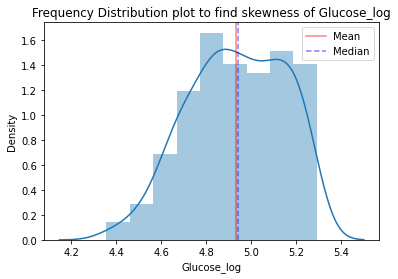

In [332]:
sns.distplot(df_diabetic_new['Glucose_log']) #Distribution plot to find skewness of Glucose_log
plt.axvline(x=df_diabetic_new.Glucose_log.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Glucose_log.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Glucose_log")
plt.show() #Displays the plot

The distribution is normal after log transformation to Glucose.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


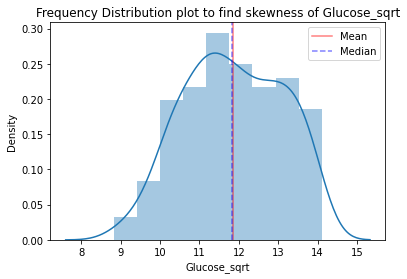

In [333]:
df_diabetic_new['Glucose_sqrt']=np.sqrt(df_diabetic_new['Glucose']) #Squareroot transformation
sns.distplot(df_diabetic_new['Glucose_sqrt']) #Distribution plot to find skewness of Glucose_sqrt
plt.axvline(x=df_diabetic_new.Glucose_sqrt.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Glucose_sqrt.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Glucose_sqrt")
plt.show() #Displays the plot

The above plot is normally distributed

In [334]:
df_diabetic_new.Glucose_log.skew() #Measures the skewness

-0.26892894944925316

In [335]:
df_diabetic_new.Glucose_sqrt.skew() #Measures the skewness

-0.08070324096827418

If data is normally distributed, skewness value ranges between -0.5 and 0.5. The above output shows -0.0621 skewness for Glucose_log and -0.080 skewness for Glucose_sqrt. Both are normally distributed. Let's consider Glucose_sqrt for further analysis as it has better skewness value as well as mean is equal to median.

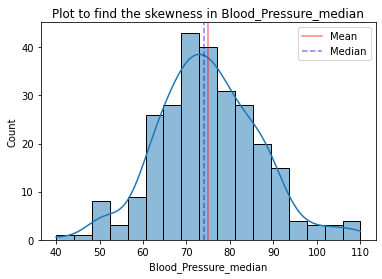

In [336]:
#Finding the frequency distribution of Blood_Pressure_median column
sns.histplot(data=df_diabetic_new['Blood_Pressure_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Blood_Pressure_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Blood_Pressure_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Blood_Pressure_median') #Title of the plot
plt.show() #Displays the plot

From above plot we can see that Blood_Pressure_median is normally distributed.

In [337]:
df_diabetic_new.Blood_Pressure_median.skew() #Measures the skewness

0.22489914689234172

If data is normally distributed, skewness value ranges between -0.5 and 0.5. Blood_Pressure_median is having skewness of 0.224 and so it is normally distributed and there is no need of any transformation.

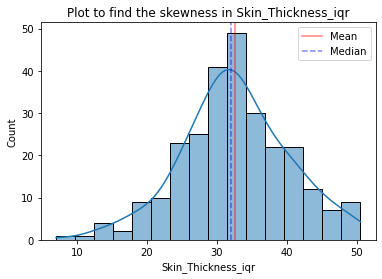

In [338]:
#Finding the frequency distribution of Skin_Thickness_iqr column
sns.histplot(data=df_diabetic_new['Skin_Thickness_iqr'],kde=True) 
plt.axvline(x=df_diabetic_new.Skin_Thickness_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Skin_Thickness_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Skin_Thickness_iqr') #Title of the plot
plt.show() #Displays the plot

From above plot we can see that Skin_Thickness_iqr is normally distributed.

In [339]:
df_diabetic_new.Skin_Thickness_iqr.skew() #Measures the skewness

-0.08863624223601071

If data is normally distributed, skewness value ranges between -0.5 and 0.5. Skin_Thickness_iqr is having skewness of -0.088 and so it is normally distributed and there is no need of any transformation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


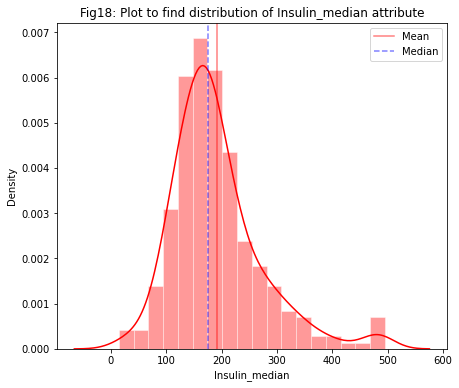

In [340]:
#Finding the frequency distribution of Insulin_median column
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
sns.distplot(a=df_diabetic_new.Insulin_median, color='red', hist_kws={"edgecolor": 'white'}) 
plt.axvline(x=df_diabetic_new.Insulin_median.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Insulin_median.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Fig18: Plot to find distribution of Insulin_median attribute') #Title of the plot
plt.show() #Displays the plot

The frequency distribution of Insulin_median is right skewed.

In [341]:
df_diabetic_new['Insulin_log']=np.log(df_diabetic_new['Insulin_median']) #Log transformation of Insulin_median

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


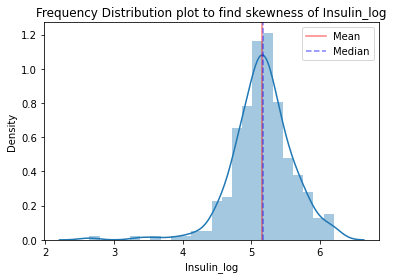

In [342]:
sns.distplot(df_diabetic_new['Insulin_log']) #Distribution plot to find skewness of Insulin_log
plt.title("Frequency Distribution plot to find skewness of Insulin_log")
plt.axvline(x=df_diabetic_new.Insulin_log.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Insulin_log.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.show() #Displays the plot

The distribution seems to be better after log transformation of Insulin.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


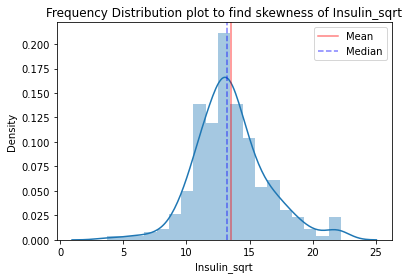

In [343]:
df_diabetic_new['Insulin_sqrt']=np.sqrt(df_diabetic_new['Insulin_median']) #Squareroot transformation
sns.distplot(df_diabetic_new['Insulin_sqrt']) #Distribution plot to find skewness of Insulin_sqrt
plt.title("Frequency Distribution plot to find skewness of Insulin_sqrt")
plt.axvline(x=df_diabetic_new.Insulin_sqrt.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.Insulin_sqrt.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.show() #Displays the plot

From above plot we can see that Insulin_sqrt is normally distributed

In [344]:
df_diabetic_new.Insulin_log.skew() #Measures the skewness

-0.9623305449025459

In [345]:
df_diabetic_new.Insulin_sqrt.skew() #Measures the skewness

0.42720210579549556

If data is normally distributed, skewness value ranges between -0.5 and 0.5. The above output shows -0.96 skewness for Insulin_log and 0.42 skewness for Insulin_sqrt. As Insulin_sqrt is normally distributed, it will be used for further analysis.

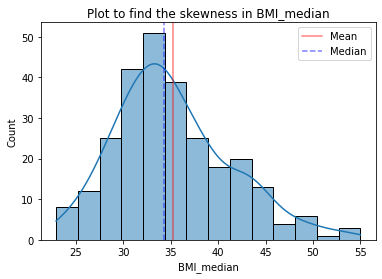

In [346]:
#Finding the frequency distribution of BMI_median column
sns.histplot(data=df_diabetic_new['BMI_median'],kde=True) 
plt.axvline(x=df_diabetic_new.BMI_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.BMI_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in BMI_median') #Title of the plot
plt.show() #Displays the plot

From above plot we can see that BMI_median is right skewed.

In [347]:
df_diabetic_new['BMI_log']=np.log(df_diabetic_new['BMI_median']) #Log transformation of BMI_median

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


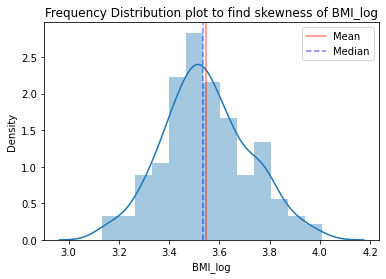

In [348]:
sns.distplot(df_diabetic_new['BMI_log']) #Distribution plot to find skewness of BMI_log
plt.title("Frequency Distribution plot to find skewness of BMI_log")
plt.axvline(x=df_diabetic_new.BMI_log.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.BMI_log.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.show() #Displays the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


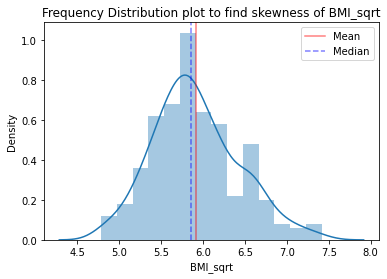

In [349]:
df_diabetic_new['BMI_sqrt']=np.sqrt(df_diabetic_new['BMI_median']) #Squareroot transformation
sns.distplot(df_diabetic_new['BMI_sqrt']) #Distribution plot to find skewness of BMI_sqrt
plt.title("Frequency Distribution plot to find skewness of BMI_sqrt")
plt.axvline(x=df_diabetic_new.BMI_sqrt.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df_diabetic_new.BMI_sqrt.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.show() #Displays the plot

In [350]:
df_diabetic_new.BMI_log.skew() #Measures the skewness

0.16376525915657433

In [351]:
df_diabetic_new.BMI_sqrt.skew() #Measures the skewness

0.3957790906711007

If data is normally distributed, skewness value ranges between -0.5 and 0.5. Both are normally distributed. BMI_log has better skewness value thus will be used for further analysis.

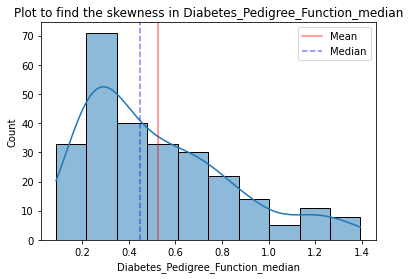

In [352]:
#Finding the frequency distribution of Diabetes_Pedigree_Function_median column
sns.histplot(data=df_diabetic_new['Diabetes_Pedigree_Function_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Diabetes_Pedigree_Function_median') #Title of the plot
plt.show() #Displays the plot

From above plot we can see that Diabetes_Pedigree_Function_median is right skewed.

In [353]:
df_diabetic_new['Diabetes_Pedigree_Function_log']=np.log(df_diabetic_new['Diabetes_Pedigree_Function_median']) #Log transformation of Diabetes_Pedigree_Function_median

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


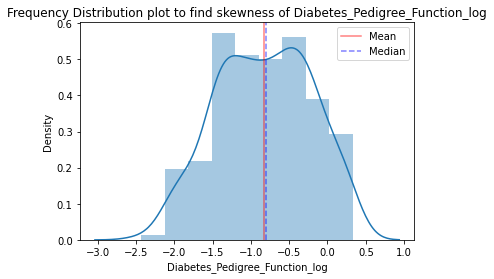

In [354]:
sns.distplot(df_diabetic_new['Diabetes_Pedigree_Function_log']) #Distribution plot to find skewness of Diabetes_Pedigree_Function_log
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_log.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_log.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Diabetes_Pedigree_Function_log")
plt.show() #Displays the plot

From above plot we can see that Diabetes_Pedigree_Function_log is normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


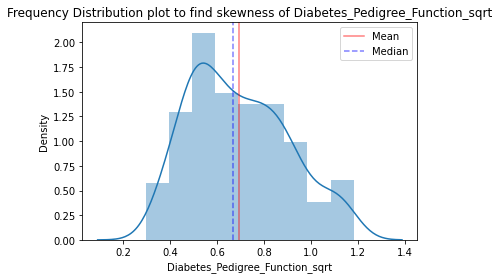

In [355]:
df_diabetic_new['Diabetes_Pedigree_Function_sqrt']=np.sqrt(df_diabetic_new['Diabetes_Pedigree_Function_median']) #Squareroot transformation
sns.distplot(df_diabetic_new['Diabetes_Pedigree_Function_sqrt']) #Distribution plot to find skewness of Diabetes_Pedigree_Function_sqrt
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_sqrt.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Diabetes_Pedigree_Function_sqrt.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Diabetes_Pedigree_Function_sqrt")
plt.show() #Displays the plot

From above plot we can see that compared to Diabetes_Pedigree_Function_sqrt, Diabetes_Pedigree_Function_log is normally distributed and it's mean is equal to median. So Diabetes_Pedigree_Function_log will be used for further data analysis.

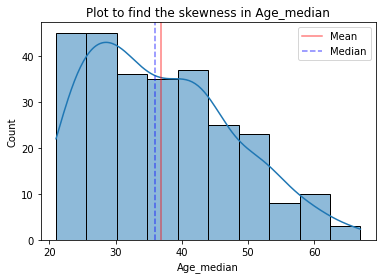

In [356]:
#Finding the frequency distribution of Age_median column
sns.histplot(data=df_diabetic_new['Age_median'],kde=True) 
plt.axvline(x=df_diabetic_new.Age_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Age_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Age_median') #Title of the plot
plt.show() #Displays the plot

The above plot shows that Age_median is right skewed.

In [357]:
df_diabetic_new['Age_log']=np.log(df_diabetic_new['Age_median']) #Log transformation of Age_median

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


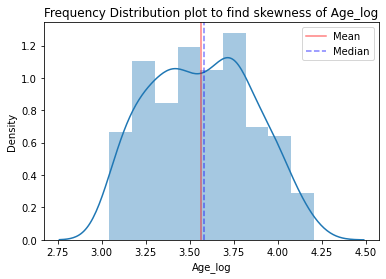

In [358]:
sns.distplot(df_diabetic_new['Age_log']) #Distribution plot to find skewness of Age_log
plt.axvline(x=df_diabetic_new.Age_log.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Age_log.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Age_log")
plt.show() #Displays the plot

Age_log has better distribution compared to Age.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


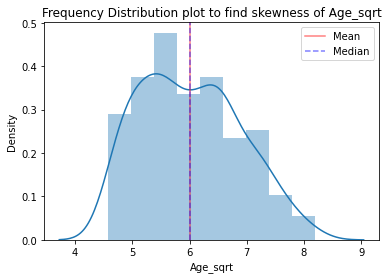

In [359]:
df_diabetic_new['Age_sqrt']=np.sqrt(df_diabetic_new['Age_median']) #Squareroot transformation
sns.distplot(df_diabetic_new['Age_sqrt']) #Distribution plot to find skewness of Age_sqrt
plt.axvline(x=df_diabetic_new.Age_sqrt.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_diabetic_new.Age_sqrt.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Age_sqrt")
plt.show() #Displays the plot

Age_sqrt is still right skewed.

In [360]:
df_diabetic_new.Age_log.skew() #Measures the skewness

0.06878676779835385

In [361]:
df_diabetic_new.Age_sqrt.skew() #Measures the skewness

0.30433390747599626

If data is normally distributed, skewness value ranges between -0.5 and 0.5. Right skew values range between 0.5 to 1.Both are in normal skewness range. Age_log will be used for further analysis.

### Skewness for non_diabetic

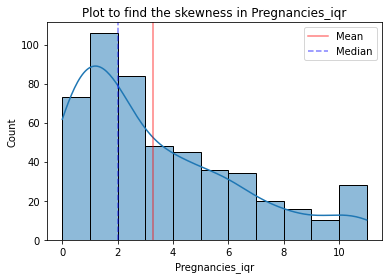

In [362]:
#Finding the frequency distribution of Pregnancies_iqr column
sns.histplot(data=df_non_diabetic_new['Pregnancies_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Pregnancies_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Pregnancies_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Pregnancies_iqr') #Title of the plot
plt.show() #Displays the plot

Pregnancies_iqr is right skewed as shown in above plot.

In [363]:
np.seterr(divide = 'ignore')  
df_non_diabetic_new['Pregnancies_log']=np.where(df_non_diabetic_new['Pregnancies_iqr']>0,np.log(df_non_diabetic_new['Pregnancies_iqr']),0) #Log transformation of Pregnancies_iqr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


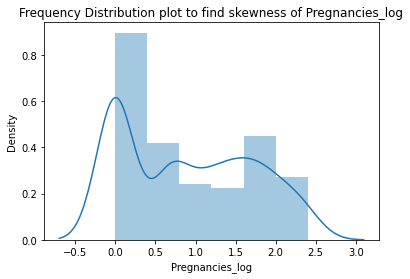

In [364]:
sns.distplot(df_non_diabetic_new['Pregnancies_log']) #Distribution plot to find skewness of Pregnancies_log
plt.title("Frequency Distribution plot to find skewness of Pregnancies_log")
plt.show() #Displays the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


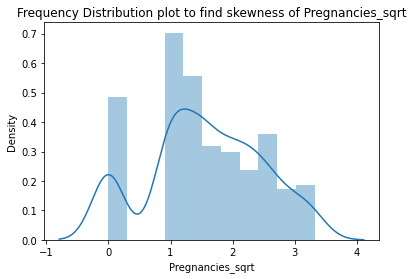

In [365]:
df_non_diabetic_new['Pregnancies_sqrt']=np.sqrt(df_non_diabetic_new['Pregnancies_iqr']) #Squareroot transformation
sns.distplot(df_non_diabetic_new['Pregnancies_sqrt']) #Distribution plot to find skewness of Pregnancies_sqrt
plt.title("Frequency Distribution plot to find skewness of Pregnancies_sqrt")
plt.show() #Displays the plot

In [366]:
df_non_diabetic_new.Pregnancies_log.skew()

0.24244526678538744

In [367]:
df_non_diabetic_new.Pregnancies_sqrt.skew()

-0.09739801704851503

As Pregnancies_sqrt has better skewness value, it will be used for further analysis.

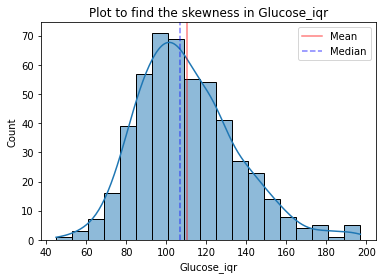

In [368]:
#Finding the frequency distribution of Glucose_iqr column
sns.histplot(data=df_non_diabetic_new['Glucose_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Glucose_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Glucose_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Glucose_iqr') #Title of the plot
plt.show() #Displays the plot

In [369]:
df_non_diabetic_new['Glucose_log']=np.log(df_non_diabetic_new['Glucose_iqr']) #Log transformation of Glucose_iqr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


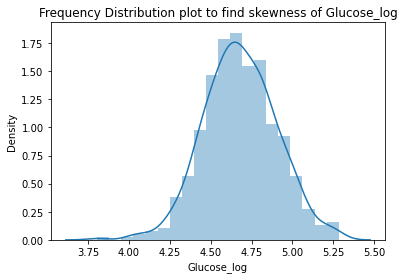

In [370]:
sns.distplot(df_non_diabetic_new['Glucose_log']) #Distribution plot to find skewness of Glucose_log
plt.title("Frequency Distribution plot to find skewness of Glucose_log")
plt.show() #Displays the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


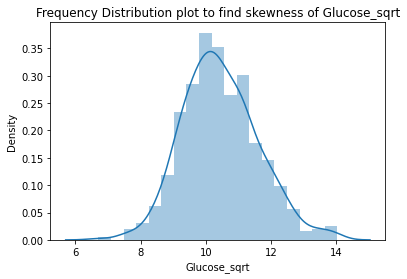

In [371]:
df_non_diabetic_new['Glucose_sqrt']=np.sqrt(df_non_diabetic_new['Glucose_iqr']) #Squareroot transformation
sns.distplot(df_non_diabetic_new['Glucose_sqrt']) #Distribution plot to find skewness of Glucose_sqrt
plt.title("Frequency Distribution plot to find skewness of Glucose_sqrt")
plt.show() #Displays the plot

In [372]:
df_non_diabetic_new.Glucose_log.skew()

-0.06100832525753018

In [373]:
df_non_diabetic_new.Glucose_sqrt.skew()

0.3111202898449348

As Glucose_log has better skewness value, it will be used for further analysis.

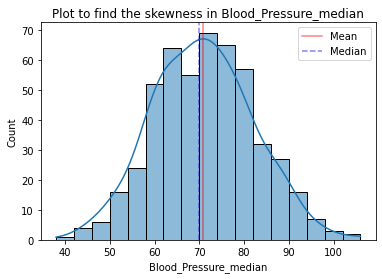

In [374]:
#Finding the frequency distribution of Blood_Pressure_median column
sns.histplot(data=df_non_diabetic_new['Blood_Pressure_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Blood_Pressure_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Blood_Pressure_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Blood_Pressure_median') #Title of the plot
plt.show() #Displays the plot

In [375]:
df_non_diabetic_new.Blood_Pressure_median.skew()

0.12878657481778677

From above plot it is clear that Blood_Pressure_median is normally distributed.

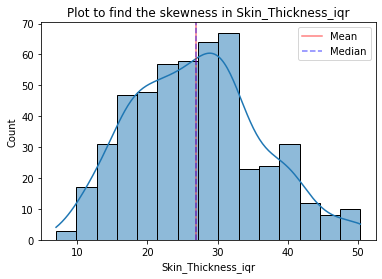

In [376]:
#Finding the frequency distribution of Skin_Thickness_iqr column
sns.histplot(data=df_non_diabetic_new['Skin_Thickness_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Skin_Thickness_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Skin_Thickness_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Skin_Thickness_iqr') #Title of the plot
plt.show() #Displays the plot

In [377]:
df_non_diabetic_new.Skin_Thickness_iqr.skew()

0.29363628381312384

From above plot it is clear that Skin_Thickness_iqr is normally distributed.

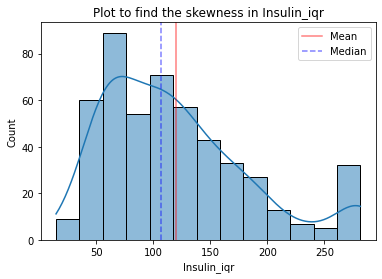

In [378]:
#Finding the frequency distribution of insulin_iqr column
sns.histplot(data=df_non_diabetic_new['Insulin_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Insulin_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Insulin_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Insulin_iqr') #Title of the plot
plt.show() #Displays the plot

Insulin_iqr is right skewed as shown in above plot.

In [379]:
df_non_diabetic_new['Insulin_log']=np.log(df_non_diabetic_new['Insulin_iqr']) #Log transformation of Insulin_iqr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


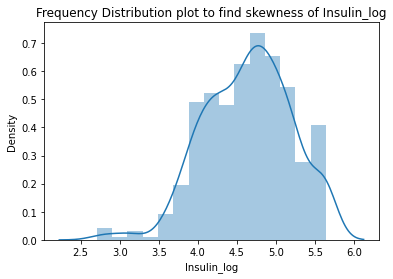

In [380]:
sns.distplot(df_non_diabetic_new['Insulin_log']) #Distribution plot to find skewness of Insulin_log
plt.title("Frequency Distribution plot to find skewness of Insulin_log")
plt.show() #Displays the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


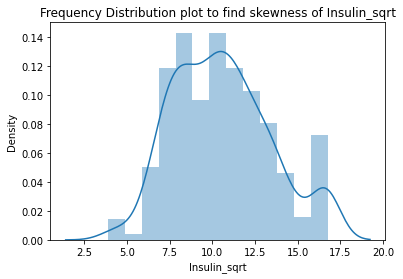

In [381]:
df_non_diabetic_new['Insulin_sqrt']=np.sqrt(df_non_diabetic_new['Insulin_iqr']) #Squareroot transformation
sns.distplot(df_non_diabetic_new['Insulin_sqrt']) #Distribution plot to find skewness of Insulin_sqrt
plt.title("Frequency Distribution plot to find skewness of Insulin_sqrt")
plt.show() #Displays the plot

In [382]:
df_non_diabetic_new.Insulin_log.skew()

-0.30968664161969794

In [383]:
df_non_diabetic_new.Insulin_sqrt.skew()

0.3893137686008022

As Insulin_log has better skewness value, it will be considered for further analysis.

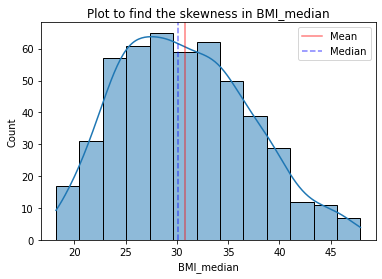

In [384]:
#Finding the frequency distribution of BMI_median column
sns.histplot(data=df_non_diabetic_new['BMI_median'],kde=True) 
plt.axvline(x=df_non_diabetic_new.BMI_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.BMI_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in BMI_median') #Title of the plot
plt.show() #Displays the plot

In [385]:
df_non_diabetic_new['BMI_log']=np.log(df_non_diabetic_new['BMI_median']) #Log transformation of BMI_median

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


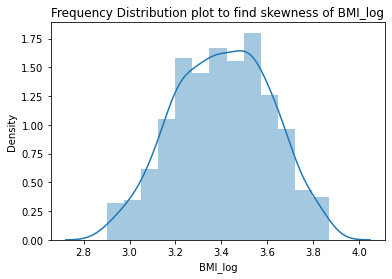

In [386]:
sns.distplot(df_non_diabetic_new['BMI_log']) #Distribution plot to find skewness of BMI_log
plt.title("Frequency Distribution plot to find skewness of BMI_log")
plt.show() #Displays the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


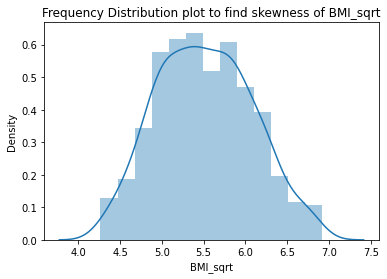

In [387]:
df_non_diabetic_new['BMI_sqrt']=np.sqrt(df_non_diabetic_new['BMI_median']) #Squareroot transformation
sns.distplot(df_non_diabetic_new['BMI_sqrt']) #Distribution plot to find skewness of BMI_median
plt.title("Frequency Distribution plot to find skewness of BMI_sqrt")
plt.show() #Displays the plot

In [388]:
df_non_diabetic_new.BMI_log.skew()

-0.08236026376359526

In [389]:
df_non_diabetic_new.BMI_sqrt.skew()

0.13310919432529816

As BMI_log has better skewness value, it will be used for further analysis.

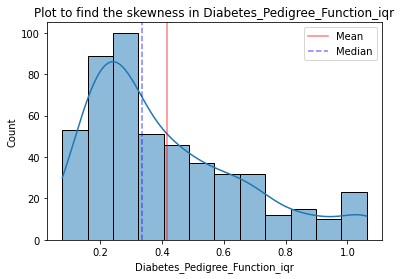

In [390]:
#Finding the frequency distribution of Diabetes_Pedigree_Function_iqr column
sns.histplot(data=df_non_diabetic_new['Diabetes_Pedigree_Function_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Diabetes_Pedigree_Function_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Diabetes_Pedigree_Function_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Diabetes_Pedigree_Function_iqr') #Title of the plot
plt.show() #Displays the plot

Diabetes_Pedigree_Function_iqr is right skewed as shown in above plot.

In [391]:
df_non_diabetic_new['Diabetes_Pedigree_Function_log']=np.log(df_non_diabetic_new['Diabetes_Pedigree_Function_iqr']) #Log transformation of Diabetes_Pedigree_Function_iqr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


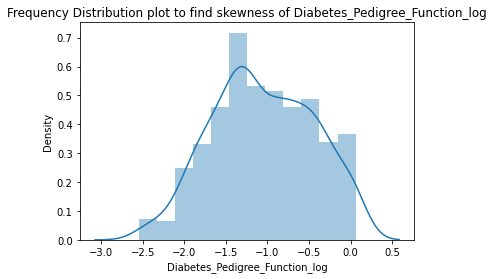

In [392]:
sns.distplot(df_non_diabetic_new['Diabetes_Pedigree_Function_log']) #Distribution plot to find skewness of Diabetes_Pedigree_Function_log
plt.title("Frequency Distribution plot to find skewness of Diabetes_Pedigree_Function_log")
plt.show() #Displays the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


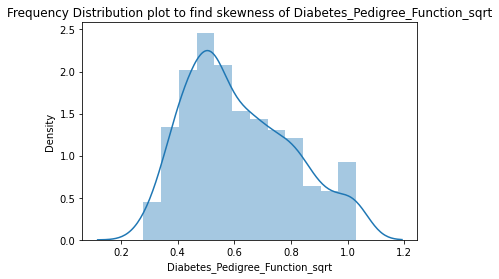

In [393]:
df_non_diabetic_new['Diabetes_Pedigree_Function_sqrt']=np.sqrt(df_non_diabetic_new['Diabetes_Pedigree_Function_iqr']) #Squareroot transformation
sns.distplot(df_non_diabetic_new['Diabetes_Pedigree_Function_sqrt']) #Distribution plot to find skewness of Diabetes_Pedigree_Function_iqr
plt.title("Frequency Distribution plot to find skewness of Diabetes_Pedigree_Function_sqrt")
plt.show() #Displays the plot

In [394]:
df_non_diabetic_new.Diabetes_Pedigree_Function_log.skew()

-0.0269390645960005

In [395]:
df_non_diabetic_new.Diabetes_Pedigree_Function_sqrt.skew()

0.509994980234643

As Diabetes_Pedigree_Function_log is normally distributed, we will be using it for further analysis.

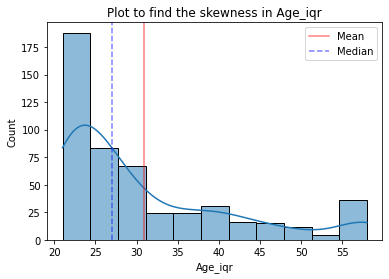

In [396]:
#Finding the frequency distribution of Age_iqr column
sns.histplot(data=df_non_diabetic_new['Age_iqr'],kde=True) 
plt.axvline(x=df_non_diabetic_new.Age_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Age_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Age_iqr') #Title of the plot
plt.show() #Displays the plot


Age_iqr is right skewed as shown in above plot.

In [397]:
df_non_diabetic_new['Age_log']=np.log(df_non_diabetic_new['Age_iqr']) #Log transformation of Age_iqr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


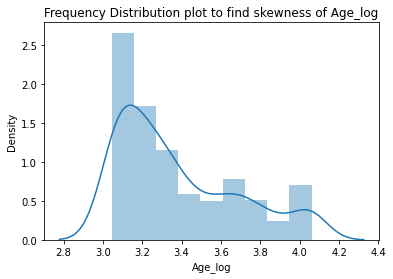

In [398]:
sns.distplot(df_non_diabetic_new['Age_log']) #Distribution plot to find skewness of Age_log
plt.title("Frequency Distribution plot to find skewness of Age_log")
plt.show() #Displays the plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


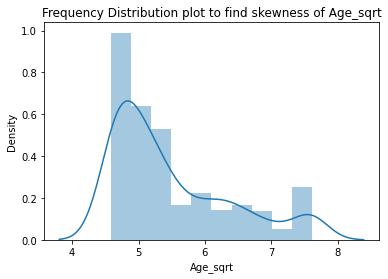

In [399]:
df_non_diabetic_new['Age_sqrt']=np.sqrt(df_non_diabetic_new['Age_iqr']) #Squareroot transformation
sns.distplot(df_non_diabetic_new['Age_sqrt']) #Distribution plot to find skewness of Age_iqr
plt.title("Frequency Distribution plot to find skewness of Age_sqrt")
plt.show() #Displays the plot

In [400]:
df_non_diabetic_new['Age_exponential']=df_non_diabetic_new.Age_iqr**(1/1.2)

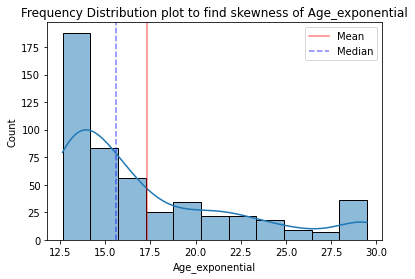

In [401]:
sns.histplot(data=df_non_diabetic_new['Age_exponential'],kde=True) #Distribution plot to find skewness of age_exponential
plt.axvline(x=df_non_diabetic_new.Age_exponential.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_non_diabetic_new.Age_exponential.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title("Frequency Distribution plot to find skewness of Age_exponential")
plt.show() #Displays the plot

In [402]:
df_non_diabetic_new.Age_iqr.skew()

1.274484675957231

In [403]:
df_non_diabetic_new.Age_log.skew()

0.8630804457017616

In [404]:
df_non_diabetic_new.Age_sqrt.skew()

1.0656396890709245

In [405]:
df_non_diabetic_new.Age_exponential.skew()

1.204451921041152

From above observations we can see that Age is skewed. As Age_log has better skewness value compared to others, it will be used for further analysis.

### Preparing the final dataframe

In [406]:
df_diabetic_new.head(3)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Pregnancies_median,Blood_Pressure_median,...,Glucose_log,Glucose_sqrt,Insulin_log,Insulin_sqrt,BMI_log,BMI_sqrt,Diabetes_Pedigree_Function_log,Diabetes_Pedigree_Function_sqrt,Age_log,Age_sqrt
1,8.0,183.0,64.0,30.299367,214.556774,23.3,0.672,32.0,8.0,64.0,...,5.209486,13.527749,5.368574,14.647757,3.148453,4.827007,-0.397497,0.819756,3.465736,5.656854
3,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,0.0,40.0,...,4.919981,11.704700,5.123964,12.961481,3.763523,6.565059,-0.805197,0.668581,3.496508,5.744563
5,3.0,78.0,50.0,32.000000,88.000000,31.0,0.248,26.0,3.0,50.0,...,4.356709,8.831761,4.477337,9.380832,3.433987,5.567764,-1.394327,0.497996,3.258097,5.099020


Above output shows all the added columns which were used for outlier and skewness handling.

In [407]:
df_diabetic_new.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Pregnancies_median',
       'Blood_Pressure_median', 'Blood_Pressure_iqr', 'Skin_Thickness_median',
       'Skin_Thickness_iqr', 'Insulin_median', 'Insulin_iqr', 'BMI_median',
       'BMI_iqr', 'Diabetes_Pedigree_Function_median',
       'Diabetes_Pedigree_Function_iqr', 'Age_median', 'Age_iqr',
       'Pregnancies_log', 'Pregnancies_sqrt', 'Pregnancies_reciprocal',
       'Glucose_log', 'Glucose_sqrt', 'Insulin_log', 'Insulin_sqrt', 'BMI_log',
       'BMI_sqrt', 'Diabetes_Pedigree_Function_log',
       'Diabetes_Pedigree_Function_sqrt', 'Age_log', 'Age_sqrt'],
      dtype='object')

Above output shows all the added columns which were used for outlier and skewness handling.

In [408]:
#Final dataframe after handling missing values, outliers and skewness.
df_diabetic_final=df_diabetic_new[['Pregnancies_log','Glucose_sqrt', 'Blood_Pressure_median', 'Skin_Thickness_iqr', 'Insulin_sqrt', 'BMI_log' , 'Diabetes_Pedigree_Function_log', 'Age_log']].copy()

In [409]:
df_diabetic_final.head(3)

,Pregnancies_log,Glucose_sqrt,Blood_Pressure_median,Skin_Thickness_iqr,Insulin_sqrt,BMI_log,Diabetes_Pedigree_Function_log,Age_log
1,2.079442,13.527749,64.0,30.299367,14.647757,3.148453,-0.397497,3.465736
3,0.000000,11.704700,40.0,35.000000,12.961481,3.763523,-0.805197,3.496508
5,1.098612,8.831761,50.0,32.000000,9.380832,3.433987,-1.394327,3.258097


In [410]:
df_diabetic_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1 to 765
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Pregnancies_log                 267 non-null    float64
 1   Glucose_sqrt                    267 non-null    float64
 2   Blood_Pressure_median           267 non-null    float64
 3   Skin_Thickness_iqr              267 non-null    float64
 4   Insulin_sqrt                    267 non-null    float64
 5   BMI_log                         267 non-null    float64
 6   Diabetes_Pedigree_Function_log  267 non-null    float64
 7   Age_log                         267 non-null    float64
dtypes: float64(8)
memory usage: 18.8 KB


In [411]:
df_non_diabetic_new.head(3)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Pregnancies_median,Pregnancies_iqr,...,Glucose_sqrt,Insulin_log,Insulin_sqrt,BMI_log,BMI_sqrt,Diabetes_Pedigree_Function_log,Diabetes_Pedigree_Function_sqrt,Age_log,Age_sqrt,Age_exponential
0,1.0,85.0,66.0,29.000000,62.914766,26.6,0.351,31.0,1.0,1.0,...,9.219544,4.141781,7.931883,3.280911,5.157519,-1.046969,0.592453,3.433987,5.567764,17.490467
2,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,1.0,1.0,...,9.433981,4.543295,9.695360,3.335770,5.300943,-1.789761,0.408656,3.044522,4.582576,12.642979
4,5.0,116.0,74.0,19.939566,106.227529,25.6,0.201,30.0,5.0,5.0,...,10.770330,4.665583,10.306674,3.242592,5.059644,-1.604450,0.448330,3.401197,5.477226,17.019013


In [412]:
df_non_diabetic_new.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Pregnancies_median',
       'Pregnancies_iqr', 'Glucose_median', 'Glucose_iqr',
       'Blood_Pressure_median', 'Blood_Pressure_iqr', 'Skin_Thickness_median',
       'Skin_Thickness_iqr', 'Insulin_median', 'Insulin_iqr', 'BMI_median',
       'BMI_iqr', 'Diabetes_Pedigree_Function_median',
       'Diabetes_Pedigree_Function_iqr', 'Age_median', 'Age_iqr',
       'Pregnancies_log', 'Pregnancies_sqrt', 'Glucose_log', 'Glucose_sqrt',
       'Insulin_log', 'Insulin_sqrt', 'BMI_log', 'BMI_sqrt',
       'Diabetes_Pedigree_Function_log', 'Diabetes_Pedigree_Function_sqrt',
       'Age_log', 'Age_sqrt', 'Age_exponential'],
      dtype='object')

In [413]:
#Final dataframe after handling missing values, outliers and skewness.
df_non_diabetic_final=df_non_diabetic_new[['Pregnancies_sqrt','Glucose_log', 'Blood_Pressure_median', 'Skin_Thickness_iqr', 'Insulin_log', 'BMI_log' , 'Diabetes_Pedigree_Function_log', 'Age_log']].copy()

In [414]:
df_non_diabetic_final.head(3) #Gives first 3 columns

,Pregnancies_sqrt,Glucose_log,Blood_Pressure_median,Skin_Thickness_iqr,Insulin_log,BMI_log,Diabetes_Pedigree_Function_log,Age_log
0,1.000000,4.442651,66.0,29.000000,4.141781,3.280911,-1.046969,3.433987
2,1.000000,4.488636,66.0,23.000000,4.543295,3.335770,-1.789761,3.044522
4,2.236068,4.753590,74.0,19.939566,4.665583,3.242592,-1.604450,3.401197


In [415]:
df_non_diabetic_final.info() #Gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 766
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Pregnancies_sqrt                500 non-null    float64
 1   Glucose_log                     500 non-null    float64
 2   Blood_Pressure_median           500 non-null    float64
 3   Skin_Thickness_iqr              500 non-null    float64
 4   Insulin_log                     500 non-null    float64
 5   BMI_log                         500 non-null    float64
 6   Diabetes_Pedigree_Function_log  500 non-null    float64
 7   Age_log                         500 non-null    float64
dtypes: float64(8)
memory usage: 35.2 KB


### Exploratory Data Analysis

**Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


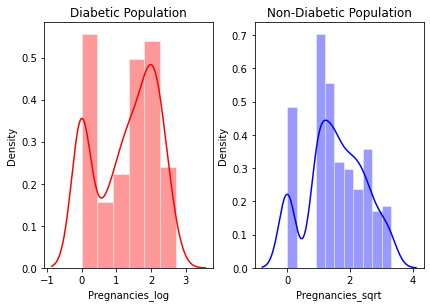

In [416]:
fig, ax =plt.subplots(1,2) #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.distplot(a=df_diabetic_final.Pregnancies_log, color='red', hist_kws={"edgecolor": 'white'}, ax=ax[0]) #Distribution plot for diabetic 
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.distplot(a=df_non_diabetic_final.Pregnancies_sqrt, color='blue', hist_kws={"edgecolor": 'white'}, ax=ax[1]) #Distribution plot for non diabetic
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

Above plot is used to compare the frequency distribution of Pregnancies in diabetic and non-diabetic population seperately. Number of pregnancies in diabetic dataset corresponds to gestational diabetes which is diagnosed during the time of Pregnancy. Those who develop gestational diabetes are at higher risk of developing type 2 diabetes later in life.

In [417]:
df_diabetic_final.Pregnancies_log.mean() #Gives mean value

1.2782215251415914

In [418]:
df_non_diabetic_final.Pregnancies_sqrt.mean() #Gives mean value

1.5611759419436608

The above output calculated mean of Pregnancies for diabetic and non-diabetic population. 

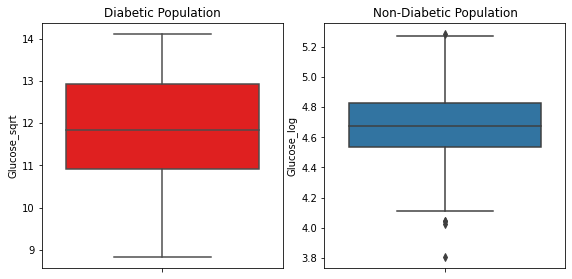

In [419]:
fig, ax =plt.subplots(1,2,figsize=(8, 4))  #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.boxplot( y = 'Glucose_sqrt', data = df_diabetic_final,color='red',ax=ax[0]) #Boxplot
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.boxplot( y = 'Glucose_log', data = df_non_diabetic_final,ax=ax[1]) #Boxplot
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

From above plot we can see that Glucose levels are more in Diabetic population.

In [420]:
df_diabetic_final.Glucose_sqrt.mean()

11.863730303455814

In [421]:
df_non_diabetic_final.Glucose_log.mean()

4.680359103385477

Above observation clearly shows that the mean of Glucose is more for diabetic population.

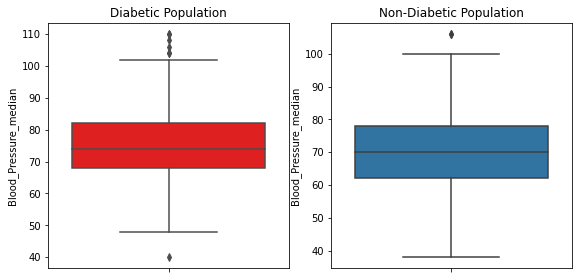

In [422]:
fig, ax =plt.subplots(1,2,figsize=(8, 4))  #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.boxplot( y = 'Blood_Pressure_median', data = df_diabetic_final,color='red',ax=ax[0]) #Boxplot
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.boxplot( y = 'Blood_Pressure_median', data = df_non_diabetic_final,ax=ax[1]) #Boxplot
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

In [423]:
df_diabetic_final.Blood_Pressure_median.mean()

75.04550454388351

In [424]:
df_non_diabetic_final.Blood_Pressure_median.mean()

70.7341342797449

From above plot we can see that diabetic population are having more Blood Pressure compared to non-diabetic population. High blood pressure is more likely to strike a person with diabetes than a person without diabetes.

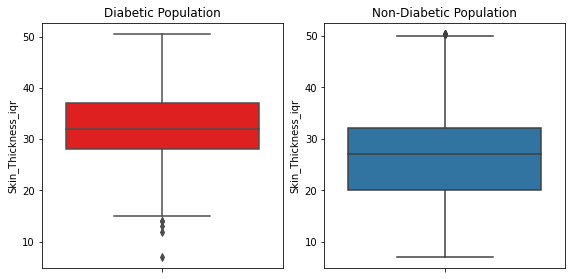

In [425]:
fig, ax =plt.subplots(1,2,figsize=(8, 4))  #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.boxplot( y = 'Skin_Thickness_iqr', data = df_diabetic_final,color='red',ax=ax[0]) #Boxplot
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.boxplot( y = 'Skin_Thickness_iqr', data = df_non_diabetic_final,ax=ax[1]) #Boxplot
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

The frequency of Skin Thickess is more in diabetic population compared to non-diabetic population.This is because diabetes is associated with  skin changes.Skin thickness is primarily determined by collagen
content and is increased in insulin-dependent patients.


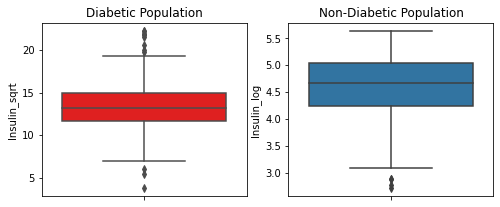

In [426]:
fig, ax =plt.subplots(1,2,figsize=(7, 3))  #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.boxplot( y = 'Insulin_sqrt', data = df_diabetic_final,color='red',ax=ax[0]) #Boxplot
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.boxplot( y = 'Insulin_log', data = df_non_diabetic_final,ax=ax[1]) #Boxplot
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

Above plot shows higher Insulin values for diabetic compared to non-diabetic population. This is because in people with diabetes, they either do not have enough insulin or there is insulin resistance leading to higher blood sugar levels.

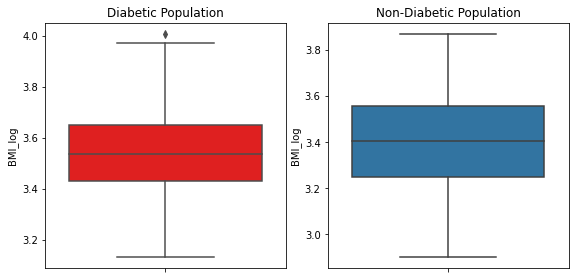

In [427]:
fig, ax =plt.subplots(1,2,figsize=(8, 4))  #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.boxplot( y = 'BMI_log', data = df_diabetic_final,color='red',ax=ax[0]) #Boxplot
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.boxplot( y = 'BMI_log', data = df_non_diabetic_final,ax=ax[1]) #Boxplot
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

In [428]:
df_diabetic_final.BMI_log.mean()

3.5463576144192572

In [429]:
df_non_diabetic_final.BMI_log.mean()

3.404241083030838

The median of BMI is high in diabetic population compared with the non-diabetic population. An increase in body fat is generally associated with an increase in risk of metabolic diseases such as type 2 diabetes mellitus and hypertension.

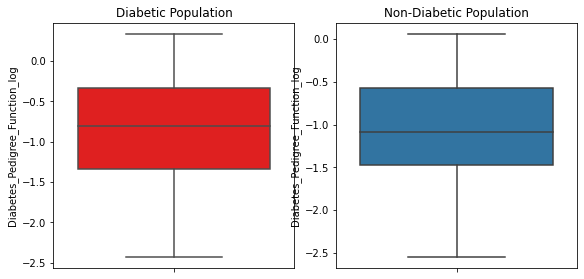

In [430]:
fig, ax =plt.subplots(1,2,figsize=(8, 4))  #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.boxplot( y = 'Diabetes_Pedigree_Function_log', data = df_diabetic_final,color='red',ax=ax[0]) #Boxplot
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.boxplot( y = 'Diabetes_Pedigree_Function_log', data = df_non_diabetic_final,ax=ax[1]) #Boxplot
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

Since diabetic population have a higher median, it is clear that the pedigree function helps to estimate the test results for diabetes. It shows that diabetes does follow genetics and it is passed from ancestors.

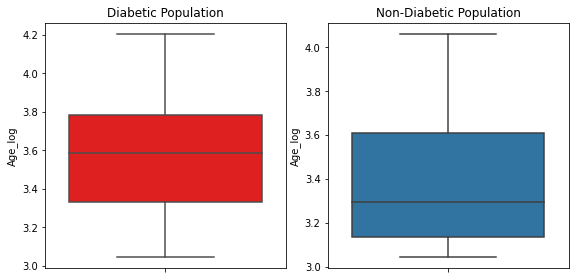

In [431]:
fig, ax =plt.subplots(1,2,figsize=(8, 4))  #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.boxplot( y = 'Age_log', data = df_diabetic_final,color='red',ax=ax[0]) #Boxplot
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.boxplot( y = 'Age_log', data = df_non_diabetic_final,ax=ax[1]) #Boxplot
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show() #Displays the plot

Above plot clearly shows the median of Age is higher for Diabetic population.Chances of having diabetes increases with advancing age. The most important factors leading to diabetes are deficiency of insulin secretion developing with age.

**Bivariate Analysis**

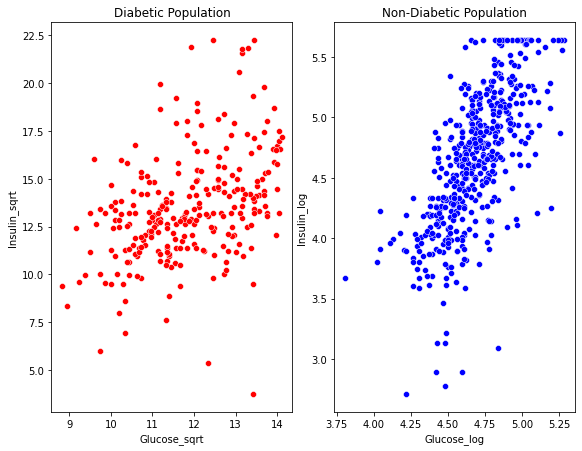

In [432]:
fig, ax =plt.subplots(1,2,figsize=(8, 6)) #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.scatterplot(x= "Glucose_sqrt", y= "Insulin_sqrt", data = df_diabetic_final,color='red',ax=ax[0]) #Scatterplot to compare Glucose and Insulin
ax[0].set_title('Diabetic Population') # Title for subplot 1
sns.scatterplot(x= "Glucose_log", y= "Insulin_log", data = df_non_diabetic_final,color='blue',ax=ax[1]) #Scatterplot to compare Glucose and Insulin
ax[1].set_title('Non-Diabetic Population') #Title for subplot2
fig.show()#Displays the plot

From above plot we can see that there are outliers when plotted between Insulin and Glucose for the diabetic population. For non-diabetic population there is a linear relationship between Insulin and Glucose. This is because Insulin helps keep the glucose in our blood to be within a normal range.

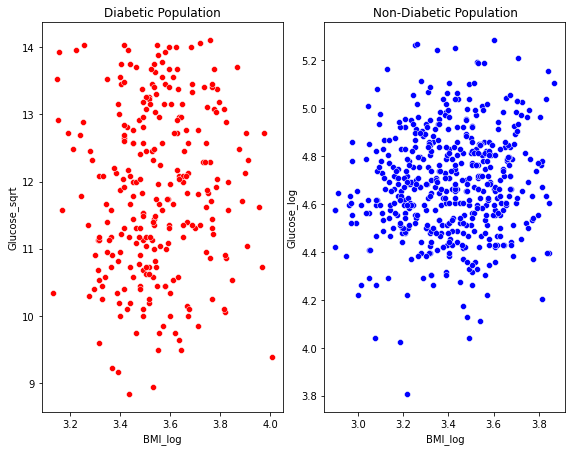

In [433]:
fig, ax =plt.subplots(1,2,figsize=(8, 6))#sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout()#controls the extra padding around the figure border and between subplots
sns.scatterplot(x= "BMI_log", y= "Glucose_sqrt", data = df_diabetic_final,color='red',ax=ax[0])#Scatterplot to compare Glucose and BMI
ax[0].set_title('Diabetic Population')# Title for subplot 1
sns.scatterplot(x= "BMI_log", y= "Glucose_log", data = df_non_diabetic_final,color='blue',ax=ax[1])#Scatterplot to compare Glucose and BMI
ax[1].set_title('Non-Diabetic Population')# Title for subplot 2
fig.show() #Displays the plot

From above plot we can see that there are higher Glucose values in diabetic population. In non diabetic population the Glucose levels are in a specific range.Higher BMI makes us more likely to develop diabetes, the condition of having too much glucose.

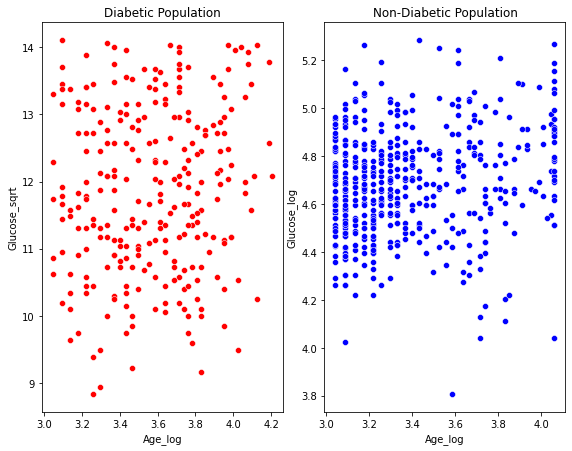

In [434]:
fig, ax =plt.subplots(1,2,figsize=(8, 6)) #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.scatterplot(x= "Age_log", y= "Glucose_sqrt", data = df_diabetic_final,color='red',ax=ax[0])#Scatterplot to compare Glucose and Age
ax[0].set_title('Diabetic Population')# Title for subplot 1 
sns.scatterplot(x= "Age_log", y= "Glucose_log", data = df_non_diabetic_final,color='blue',ax=ax[1])#Scatterplot to compare Glucose and Age
ax[1].set_title('Non-Diabetic Population')# Title for subplot 2
fig.show()#Displays the plot

From above plot we can clearly see that the Glucose values are in a proper range and not affected much with Age for non-diabetic population. For diabetic population, we can see extreme values of Glucose for change in age. For diabetics as age increases there are chances that Glucose levels fluctuate.

**MultiVariate Analysis**

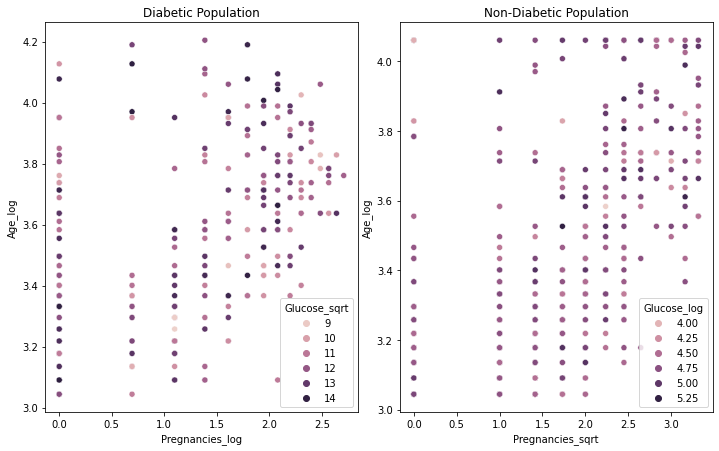

In [435]:
fig, ax =plt.subplots(1,2,figsize=(10, 6)) #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
#Scatterplot to compare Pregnancies, Age and Glucose
sns.scatterplot(x= "Pregnancies_log", y= "Age_log", hue = "Glucose_sqrt", data = df_diabetic_final,ax=ax[0])
ax[0].set_title('Diabetic Population')# Title for subplot 1
#Scatterplot to compare Pregnancies, Age and Glucose
sns.scatterplot(x= "Pregnancies_sqrt", y= "Age_log", hue = "Glucose_log", data = df_non_diabetic_final,ax=ax[1])
ax[1].set_title('Non-Diabetic Population')# Title for subplot 2
fig.show()#Displays the plot

From above plot we can see that Glucose levels are more for diabetic population and it is affected with number of Pregnancies and Age.

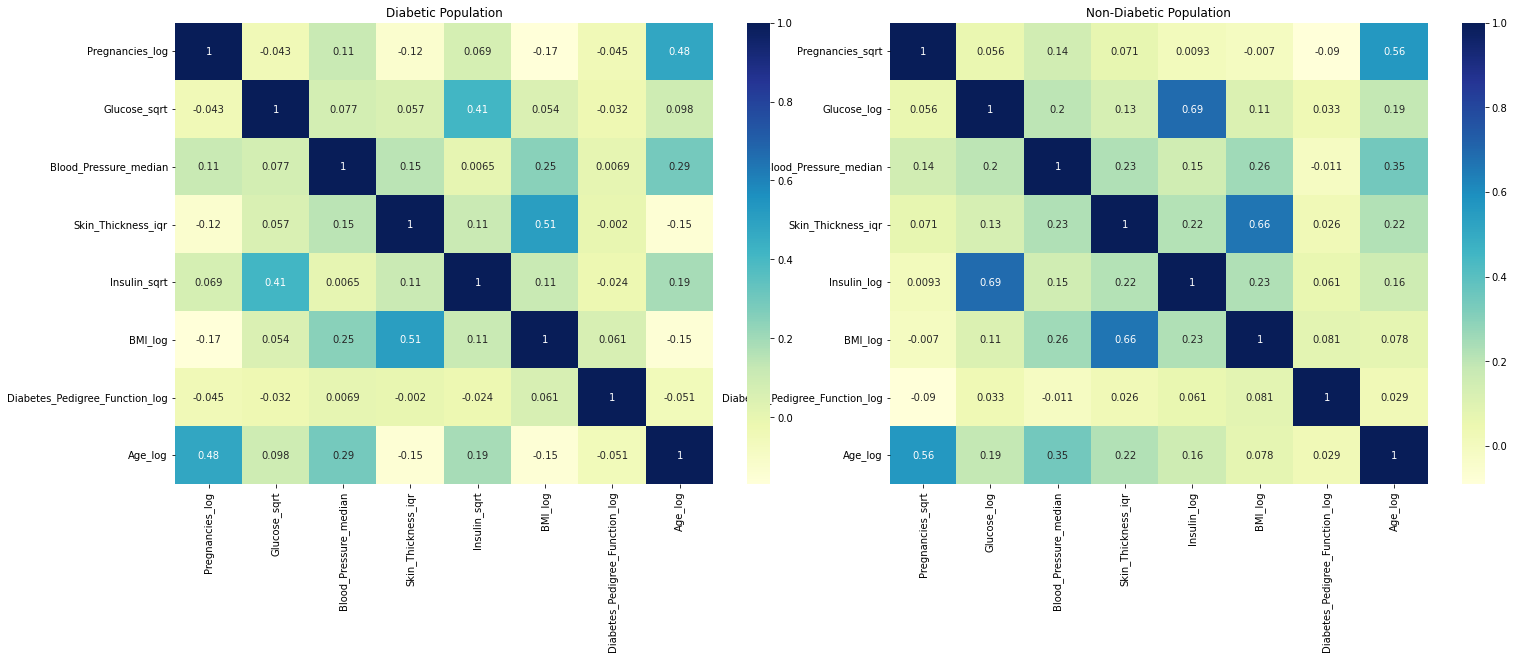

In [436]:
fig, ax =plt.subplots(1,2,figsize=(20, 7)) #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.heatmap(df_diabetic_final.corr(), cmap="YlGnBu", annot=True,ax=ax[0]) #visualize the data in 2-D colored maps making use of color variations
ax[0].set_title('Diabetic Population')# Title for subplot 1
sns.heatmap(df_non_diabetic_final.corr(), cmap="YlGnBu", annot=True,ax=ax[1]) #visualize the data in 2-D colored maps making use of color variations
ax[1].set_title('Non-Diabetic Population')# Title for subplot 2
fig.show()#Displays the plot

Above heatmap shows the correlation between different variables for diabetic and non-diabetic populations seperately. 

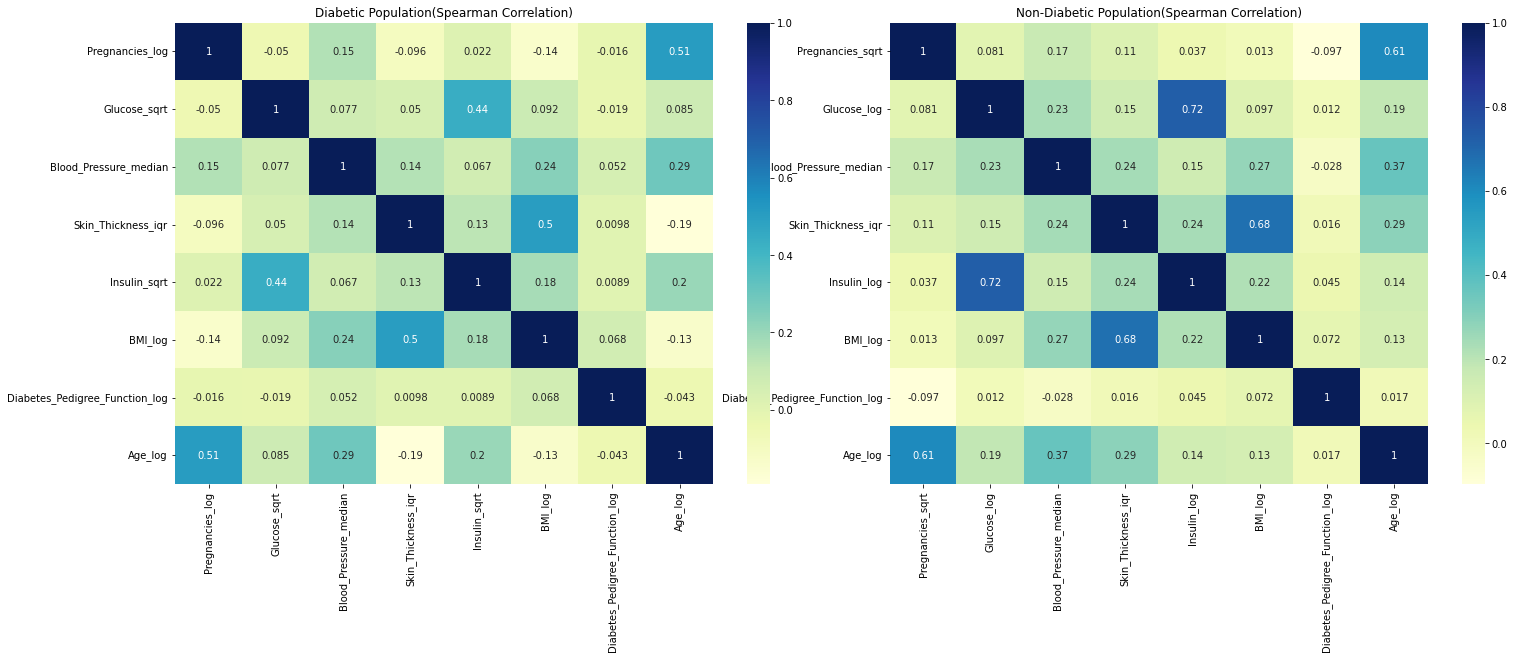

In [437]:
fig, ax =plt.subplots(1,2,figsize=(20, 7)) #sets a group of subplots with grid(1,2) in one figure object
fig.tight_layout() #controls the extra padding around the figure border and between subplots
sns.heatmap(df_diabetic_final.corr(method = "spearman"), cmap="YlGnBu", annot=True,ax=ax[0]) #visualize the data in 2-D colored maps making use of color variations
ax[0].set_title('Diabetic Population(Spearman Correlation)')# Title for subplot 1
sns.heatmap(df_non_diabetic_final.corr(method = "spearman"), cmap="YlGnBu", annot=True,ax=ax[1]) #visualize the data in 2-D colored maps making use of color variations
ax[1].set_title('Non-Diabetic Population(Spearman Correlation)')# Title for subplot 2
fig.show()#Displays the plot

Above heatmap shows the Spearman correlation between different variables for diabetic and non-diabetic populations seperately.

In [449]:
df_diabetic_final.head() #Gives first 5 records

,Pregnancies_log,Glucose_sqrt,Blood_Pressure_median,Skin_Thickness_iqr,Insulin_sqrt,BMI_log,Diabetes_Pedigree_Function_log,Age_log,Outcome
1,2.079442,13.527749,64.0,30.299367,14.647757,3.148453,-0.397497,3.465736,diabetic
3,0.000000,11.704700,40.0,35.000000,12.961481,3.763523,-0.805197,3.496508,diabetic
5,1.098612,8.831761,50.0,32.000000,9.380832,3.433987,-1.394327,3.258097,diabetic
7,0.693147,14.035669,70.0,45.000000,13.228757,3.417727,-1.845160,3.970292,diabetic
8,2.079442,11.180340,96.0,31.290119,13.443374,3.650582,-1.461018,3.988984,diabetic


In [441]:
df_diabetic_final['Outcome']=df_diabetic[['Outcome']]

In [448]:
df_diabetic_final.head()

,Pregnancies_log,Glucose_sqrt,Blood_Pressure_median,Skin_Thickness_iqr,Insulin_sqrt,BMI_log,Diabetes_Pedigree_Function_log,Age_log,Outcome
1,2.079442,13.527749,64.0,30.299367,14.647757,3.148453,-0.397497,3.465736,diabetic
3,0.000000,11.704700,40.0,35.000000,12.961481,3.763523,-0.805197,3.496508,diabetic
5,1.098612,8.831761,50.0,32.000000,9.380832,3.433987,-1.394327,3.258097,diabetic
7,0.693147,14.035669,70.0,45.000000,13.228757,3.417727,-1.845160,3.970292,diabetic
8,2.079442,11.180340,96.0,31.290119,13.443374,3.650582,-1.461018,3.988984,diabetic


In [450]:
df_diabetic_final=df_diabetic_final.rename(columns={'Pregnancies_log':'Pregnancies','Glucose_sqrt':'Glucose','Blood_Pressure_median	':'Blood_Pressure','Skin_Thickness_iqr':'Skin_Thickness','Insulin_sqrt':'Insulin','BMI_log':'BMI','Diabetes_Pedigree_Function_log':'Diabetes_Pedigree_Function','Age_log':'Age'})

In [444]:
df_non_diabetic_final.head() #Gives first 5 records

,Pregnancies_sqrt,Glucose_log,Blood_Pressure_median,Skin_Thickness_iqr,Insulin_log,BMI_log,Diabetes_Pedigree_Function_log,Age_log
0,1.000000,4.442651,66.000000,29.000000,4.141781,3.280911,-1.046969,3.433987
2,1.000000,4.488636,66.000000,23.000000,4.543295,3.335770,-1.789761,3.044522
4,2.236068,4.753590,74.000000,19.939566,4.665583,3.242592,-1.604450,3.401197
6,3.162278,4.744932,75.945789,34.321252,4.789523,3.563883,-2.009915,3.367296
9,2.000000,4.700480,92.000000,30.492275,4.891988,3.627004,-1.655482,3.401197


In [445]:
df_non_diabetic_final['Outcome']=df_non_diabetic[['Outcome']]

In [447]:
df_non_diabetic_final.head()

,Pregnancies_sqrt,Glucose_log,Blood_Pressure_median,Skin_Thickness_iqr,Insulin_log,BMI_log,Diabetes_Pedigree_Function_log,Age_log,Outcome
0,1.000000,4.442651,66.000000,29.000000,4.141781,3.280911,-1.046969,3.433987,non-diabetic
2,1.000000,4.488636,66.000000,23.000000,4.543295,3.335770,-1.789761,3.044522,non-diabetic
4,2.236068,4.753590,74.000000,19.939566,4.665583,3.242592,-1.604450,3.401197,non-diabetic
6,3.162278,4.744932,75.945789,34.321252,4.789523,3.563883,-2.009915,3.367296,non-diabetic
9,2.000000,4.700480,92.000000,30.492275,4.891988,3.627004,-1.655482,3.401197,non-diabetic


In [451]:
df_non_diabetic_final=df_non_diabetic_final.rename(columns={'Pregnancies_sqrt':'Pregnancies','Glucose_log':'Glucose','Blood_Pressure_median	':'Blood_Pressure','Skin_Thickness_iqr':'Skin_Thickness','Insulin_log':'Insulin','BMI_log':'BMI','Diabetes_Pedigree_Function_log':'Diabetes_Pedigree_Function','Age_log':'Age'})

In [454]:
df_non_diabetic_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 500 non-null    float64
 1   Glucose                     500 non-null    float64
 2   Blood_Pressure_median       500 non-null    float64
 3   Skin_Thickness              500 non-null    float64
 4   Insulin                     500 non-null    float64
 5   BMI                         500 non-null    float64
 6   Diabetes_Pedigree_Function  500 non-null    float64
 7   Age                         500 non-null    float64
 8   Outcome                     500 non-null    object 
dtypes: float64(8), object(1)
memory usage: 39.1+ KB


In [456]:
# concatenating df1 and df2 along rows
df_final = pd.concat([df_diabetic_final, df_non_diabetic_final], axis=0)

In [457]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 1 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 767 non-null    float64
 1   Glucose                     767 non-null    float64
 2   Blood_Pressure_median       767 non-null    float64
 3   Skin_Thickness              767 non-null    float64
 4   Insulin                     767 non-null    float64
 5   BMI                         767 non-null    float64
 6   Diabetes_Pedigree_Function  767 non-null    float64
 7   Age                         767 non-null    float64
 8   Outcome                     767 non-null    object 
dtypes: float64(8), object(1)
memory usage: 59.9+ KB


In [458]:
Outcome_map={'non-diabetic':0,'diabetic':1}

In [459]:
df_final['Outcome']=df_final['Outcome'].map(Outcome_map) #maps with Outcome_map

In [460]:
df_final['Outcome']=pd.to_numeric(df_final['Outcome'], errors='coerce') #typecasting Outcome to numeric to use it for Machine Learning algorithm

In [461]:
df_final.dtypes #Checking the datatype after typecasting Outcome to numeric

Pregnancies                   float64
Glucose                       float64
Blood_Pressure_median         float64
Skin_Thickness                float64
Insulin                       float64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                           float64
Outcome                         int64
dtype: object

From above output, Outcome has been typecasted to int64

In [462]:
df_final.head()

,Pregnancies,Glucose,Blood_Pressure_median,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
1,2.079442,13.527749,64.0,30.299367,14.647757,3.148453,-0.397497,3.465736,1
3,0.000000,11.704700,40.0,35.000000,12.961481,3.763523,-0.805197,3.496508,1
5,1.098612,8.831761,50.0,32.000000,9.380832,3.433987,-1.394327,3.258097,1
7,0.693147,14.035669,70.0,45.000000,13.228757,3.417727,-1.845160,3.970292,1
8,2.079442,11.180340,96.0,31.290119,13.443374,3.650582,-1.461018,3.988984,1


In [463]:
df_final.tail()

,Pregnancies,Glucose,Blood_Pressure_median,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
761,3.000000,4.488636,62.0,20.094043,3.669554,3.113515,-1.951928,3.496508,0
762,3.162278,4.615121,76.0,48.000000,5.192957,3.493473,-1.766092,4.060443,0
763,1.414214,4.804021,70.0,27.000000,5.028317,3.605498,-1.078810,3.295837,0
764,2.236068,4.795791,72.0,23.000000,4.718499,3.265759,-1.406497,3.401197,0
766,1.000000,4.532599,70.0,31.000000,4.285680,3.414443,-1.155183,3.135494,0


**Feature Extraction**

In [464]:
X=df_final.iloc[:,0:8] #Independent variables are stored in X
Y=df_final.iloc[:,8] #Dependent variable 'Outcome' is stored in Y

In [465]:
X.head(2) #Gives first 2 records

,Pregnancies,Glucose,Blood_Pressure_median,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
1,2.079442,13.527749,64.0,30.299367,14.647757,3.148453,-0.397497,3.465736
3,0.000000,11.704700,40.0,35.000000,12.961481,3.763523,-0.805197,3.496508


In [466]:
Y.head(2) #Gives first 2 records

1    1
3    1
Name: Outcome, dtype: int64

In [467]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #Standard scaler 

Performing feature scaling before running PCA  to minimize the significant difference in the scale between the features of the dataset

In [468]:
X = sc.fit_transform(X) #performs fit and transform on X at a single time and converts the data points

In [469]:
X

array([[ 0.67930503,  1.8109745 , -0.71436013, ..., -1.47924222,
         0.93492789,  0.06986361],
       [-1.61099311,  1.29079095, -2.79629327, ...,  1.50129061,
         0.27555292,  0.16805111],
       [-0.40098089,  0.47103496, -1.92882112, ..., -0.09558914,
        -0.67724992, -0.59268078],
       ...,
       [-0.05337746, -0.67822849, -0.19387684, ...,  0.73552504,
        -0.16696281, -0.47225736],
       [ 0.85181348, -0.68057696, -0.02038241, ..., -0.91079515,
        -0.6969334 , -0.13606861],
       [-0.50959252, -0.75567512, -0.19387684, ..., -0.19029925,
        -0.29048123, -0.98388541]])

In [470]:
from sklearn.decomposition import PCA #Imports PCA for Principle Component Analysis
pca=PCA()
fit=pca.fit(X)

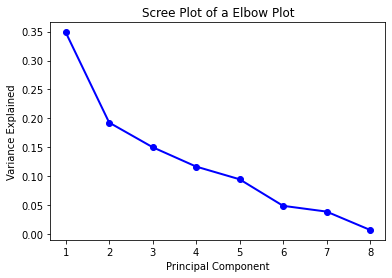

In [471]:
PC_values = np.arange(pca.n_components_) + 1 #Provides the number of components which is stored in PC_values
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue') # Plot to compare variance ratio and principle components
plt.title('Scree Plot of a Elbow Plot') #Title of the plot
plt.xlabel('Principal Component') #X label
plt.ylabel('Variance Explained') #Y label
plt.show() #Displays the plot

From above plot we can see that Principle Component has a sudden drop in Variance, which means it has the maximum information to capture. There is a kink at PC2.

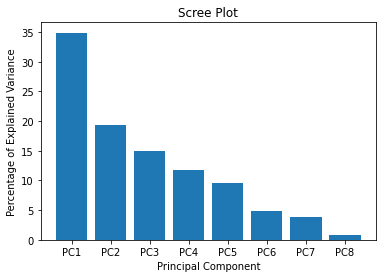

In [472]:
# Bar plot to find the principle component
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #Percentage variance
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #Provides label for x axis
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels) #Bar plot between Percentage variance and principle components
plt.ylabel('Percentage of Explained Variance') # Y label
plt.xlabel('Principal Component') # X label
plt.title('Scree Plot') #Title of the plot
plt.show() #Displays the plot

In [473]:
pca.explained_variance_ratio_ #variance ratio of principle components

array([0.34876906, 0.19289774, 0.15035674, 0.11693941, 0.09500155,
       0.04919055, 0.03923393, 0.00761103])

In [474]:
#Transforming x_train
x_data = pca.transform(X)
x_data

array([[ 1.0607392 , -0.20712184,  2.41088561, ..., -0.21136833,
        -1.37035825,  0.20711027],
       [ 1.4271089 , -2.52475535,  0.54788194, ...,  0.86287793,
         1.2726962 ,  0.1566944 ],
       [-0.29590817, -1.23767759,  0.43817786, ...,  0.22009099,
        -0.06038188,  0.10763522],
       ...,
       [-0.63337564, -0.23399294, -0.85942155, ..., -0.34951572,
         0.59180995, -0.05083728],
       [-1.46463232,  0.9633761 ,  0.17626977, ..., -0.27621125,
        -0.26258637, -0.01230963],
       [-1.10950313, -0.690743  , -0.84744453, ...,  0.06952018,
        -0.34156869, -0.01528593]])

In [475]:
#Preparing data for machine learning
import statsmodels.api as sm #Imports Statsmodel
sm.add_constant(x_data)

array([[ 1.        ,  1.0607392 , -0.20712184, ..., -0.21136833,
        -1.37035825,  0.20711027],
       [ 1.        ,  1.4271089 , -2.52475535, ...,  0.86287793,
         1.2726962 ,  0.1566944 ],
       [ 1.        , -0.29590817, -1.23767759, ...,  0.22009099,
        -0.06038188,  0.10763522],
       ...,
       [ 1.        , -0.63337564, -0.23399294, ..., -0.34951572,
         0.59180995, -0.05083728],
       [ 1.        , -1.46463232,  0.9633761 , ..., -0.27621125,
        -0.26258637, -0.01230963],
       [ 1.        , -1.10950313, -0.690743  , ...,  0.06952018,
        -0.34156869, -0.01528593]])

In [476]:
pca=PCA(n_components=2)
fit=pca.fit(X)
#Transforming x_train
x_data = pca.transform(X)
x_data

array([[ 1.0607392 , -0.20712184],
       [ 1.4271089 , -2.52475535],
       [-0.29590817, -1.23767759],
       ...,
       [-0.63337564, -0.23399294],
       [-1.46463232,  0.9633761 ],
       [-1.10950313, -0.690743  ]])

As PC2 captures the highest information, it will be used for the Machine Learning Algorithm.

### Conclusion:
The basic exploration of the dataset has been done and the data has been clean. Missing values, outliers and skewness have been dealt with.
Key insights found from the analysis are:
1.	The number of Pregnancies in the diabetic population is more compared to the non-diabetic population. This corresponds to gestational diabetes which is diagnosed during the time of Pregnancy. Those who develop gestational diabetes are at higher risk of developing type 2 diabetes later in life.
2.	Glucose levels are more in the diabetic compared to the non-diabetic population.
3.	Diabetic populations are having more Blood Pressure compared to the non-diabetic population. High blood pressure is more likely to strike a person with diabetes than a person without diabetes.
4.	The frequency of Skin Thickness is more in the diabetic population compared to the non-diabetic population. This is because diabetes is associated with skin changes. Skin thickness is primarily determined by collagen content and is increased in insulin-dependent patients.
5.	There are higher Insulin values for diabetic compared to the non-diabetic population. This is because people with diabetes, either do not have enough insulin or there is insulin resistance leading to higher blood sugar levels.
6.	An increase in BMI is generally associated with an increase in the risk of metabolic diseases such as type 2 diabetes.
7.	Diabetic pedigree function helps to estimate the test results for diabetes. It shows that diabetes does follow genetics and it is passed from ancestors.
8.	 The median age is higher for the Diabetic population. Chances of having diabetes increase with advancing age. The most important factors leading to diabetes are deficiency of insulin secretion developing with age.
9.	There are outliers when plotted between Insulin and Glucose for the diabetic population. For non-diabetic population there is a linear relationship between Insulin and Glucose. This is because Insulin helps keep the glucose in our blood to be within a normal range.
10.	There are higher Glucose values in the diabetic population. In the nondiabetic population Glucose levels are in a specific range. Higher BMI makes us more likely to develop diabetes, the condition of having too much glucose.
11.	Glucose values are in a proper range and not affected much by Age for the non-diabetic population. For the diabetic population, we can see extreme values of Glucose for change in age. For diabetics as age increases, there are chances that Glucose levels fluctuate.
12.	 Glucose levels are more for the diabetic population and it is affected by number of Pregnancies and Age.

PCA analysis has been performed to find the principal component.
